## Import Libraries

In [2]:
import numpy as np
import pandas as pd

from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

## Data

In [3]:
train_2020_2021 = pd.read_csv("/home/cyt/Senior Semester 2/Financial Computing/Group Project/data/Train_JF.csv")
train_2022 = pd.read_csv("/home/cyt/Senior Semester 2/Financial Computing/Group Project/data/Test_JF.csv")

In [4]:
train_2022 = train_2022.sort_index(axis=0,ascending=False)
train_2022

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
76,76,600143.SH,20220104,12.51,12.75,12.48,12.74,12.58,0.16,1.2719,203235.91,257068.017
75,75,600143.SH,20220105,12.72,12.91,12.61,12.67,12.74,-0.07,-0.5495,231187.15,294695.794
74,74,600143.SH,20220106,12.70,12.94,12.70,12.82,12.67,0.15,1.1839,221747.63,284397.707
73,73,600143.SH,20220107,12.92,13.28,12.83,13.05,12.82,0.23,1.7941,431736.05,565937.748
72,72,600143.SH,20220110,13.11,13.15,12.89,13.02,13.05,-0.03,-0.2299,225744.97,293749.968
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403
3,3,600143.SH,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075
2,2,600143.SH,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511
1,1,600143.SH,20220428,8.04,8.18,7.82,7.91,8.07,-0.16,-1.9827,175931.37,140145.987


In [5]:
train_2020_2021 = train_2020_2021.sort_index(axis=0,ascending=False)
train_2020_2021

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,485,600143.SH,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230
484,484,600143.SH,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193
483,483,600143.SH,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780
482,482,600143.SH,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162
481,481,600143.SH,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20211227,12.31,12.46,12.24,12.44,12.30,0.14,1.1382,147513.84,182760.320
3,3,600143.SH,20211228,12.48,13.30,12.44,12.84,12.44,0.40,3.2154,535992.92,694366.482
2,2,600143.SH,20211229,12.71,12.96,12.66,12.78,12.84,-0.06,-0.4673,225369.38,288456.413
1,1,600143.SH,20211230,12.70,12.77,12.60,12.61,12.78,-0.17,-1.3302,226973.80,287781.101


In [6]:
train = pd.concat([train_2020_2021, train_2022], axis=0)
train

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,485,600143.SH,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230
484,484,600143.SH,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193
483,483,600143.SH,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780
482,482,600143.SH,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162
481,481,600143.SH,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403
3,3,600143.SH,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075
2,2,600143.SH,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511
1,1,600143.SH,20220428,8.04,8.18,7.82,7.91,8.07,-0.16,-1.9827,175931.37,140145.987


### Constant

In [7]:
learning_rate = 6e-3

## Data Preprocessing

### Handle Nulls

In [8]:
train = train.drop("Unnamed: 0", axis=1)
train = train.drop("ts_code", axis=1)
train = train.dropna()
train.isnull().sum()
train.reset_index(inplace=True)
train = train.drop("index", axis=1)

### Add Target

In [9]:
target = train['close'][1:]
train = train[:-1]
train['target'] = list(target)
train_save = train
train

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,7.79
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,7.91
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,8.07
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,7.91


### Cross Validation Split

In [10]:
def setup_cv(df, splits=5):
    df['fold'] = -1
    # df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(df))))
    df.loc[:, "bins"] = pd.cut(
        df["target"], bins=num_bins, labels=False
    )

    kf = StratifiedKFold(n_splits=splits)
    for f, (t_, v_) in enumerate(kf.split(X=df, y=df.bins.values)):
            df.loc[v_, 'fold'] = f

    df = df.drop("bins", axis=1)
    return df

In [11]:
test = train[-100:]
train = train[:-100]

In [12]:
train = setup_cv(train)
train

/tmp/ipykernel_3051/3362751701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fold'] = -1
/tmp/ipykernel_3051/3362751701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "bins"] = pd.cut(


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target,fold
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53,0
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55,0
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67,0
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04,0
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,20211123,13.19,13.23,12.93,13.04,13.22,-0.18,-1.3616,362576.21,474241.331,12.97,4
458,20211124,12.98,13.09,12.92,12.97,13.04,-0.07,-0.5368,238659.81,309873.783,12.90,4
459,20211125,12.97,12.98,12.80,12.90,12.97,-0.07,-0.5397,260155.42,335108.958,12.86,4
460,20211126,12.86,12.96,12.73,12.86,12.90,-0.04,-0.3101,241656.83,310091.396,12.72,4


## 1dCNN Model Design

In [13]:
pip install pytorch_tabnet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pytorch_tabnet.tab_model import TabNetRegressor
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingWarmRestarts
from pytorch_tabnet.metrics import Metric

In [15]:
tabnet_params = dict(
    # cat_idxs=cat_idxs,
    # cat_dims=cat_dims,
    # cat_emb_dim=1,
#     n_d = 16,
#     n_a = 16,
#     n_steps = 2,
#     gamma = 2,
#     n_independent = 2,
#     n_shared = 2,
#     lambda_sparse = 0,
#     optimizer_fn = Adam,
#     optimizer_params = dict(lr = (2e-2)),
#     mask_type = "entmax",
#     scheduler_params = dict(T_0=200, T_mult=1, eta_min=1e-4, last_epoch=-1, verbose=False),
#     scheduler_fn = CosineAnnealingWarmRestarts,
#     seed = 42,
#     verbose = 10
    
)

In [16]:
X_train = train.loc[:, train.columns != 'target']
y_train = train[["target"]]

## Train Model

In [17]:
def rmspe(y_true, y_pred):
    # Function to calculate the root mean squared percentage error
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

class RMSPE(Metric):
    def __init__(self):
        self._name = "rmspe"
        self._maximize = False

    def __call__(self, y_true, y_score):
        
        return np.sqrt(np.mean(np.square((y_true - y_score) / y_true)))

In [18]:
def train_1dcnn(train, folds):
    models = list()
    
    for f in range(folds):
        X_train = train[train.fold != f].loc[:, train.columns != 'target']
        X_train = X_train.loc[:, X_train.columns != 'fold']
        X_train = X_train.to_numpy()
        y_train = train[train.fold != f][["target"]]
        y_train = y_train.to_numpy()
        
        X_valid = train[train.fold == f].loc[:, train.columns != 'target']
        X_valid = X_valid.loc[:, X_valid.columns != 'fold']
        X_valid = X_valid.to_numpy()
        y_valid = train[train.fold == f][["target"]]
        y_valid = y_valid.to_numpy()

        model = TabNetRegressor(**tabnet_params)
        model.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            max_epochs=2000,
            patience=500,
#             batch_size=1024*20, 
#             virtual_batch_size=128*20,
#             num_workers=8,
#             drop_last=False,
#             eval_metric=[RMSPE]
        )

        # model = TabNetRegressor(verbose=1,seed=42)
        # model.fit(X_train=X_train, y_train=y_train,
        #           eval_set=[(X_valid, y_valid)],
        #           patience=300, max_epochs=2000,
        #           eval_metric=['rmse'])
        
        oof_preds = model.predict(X_valid)
        oof_score = np.sqrt(mean_squared_error(y_valid, oof_preds))
        print(oof_score)
        models.append(model)
    
    return models

In [19]:
def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

In [20]:
gpu()

2022-05-20 21:21:11.617987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 21:21:11.731785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 21:21:11.731967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 21:21:11.733403: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

<tf.Tensor: shape=(), dtype=float32, numpy=1681.6125>

In [21]:
onedcnn_models = train_1dcnn(train, 5)

Device used : cpu
epoch 0  | loss: 261.03693| val_0_mse: 7745066988.69691|  0:00:00s
epoch 1  | loss: 236.19284| val_0_mse: 4186553311.60286|  0:00:00s
epoch 2  | loss: 217.16788| val_0_mse: 462167159.08358|  0:00:00s
epoch 3  | loss: 195.29103| val_0_mse: 463117864.39459|  0:00:00s
epoch 4  | loss: 174.78918| val_0_mse: 501934408.48406|  0:00:00s
epoch 5  | loss: 154.77792| val_0_mse: 541912859.57963|  0:00:00s
epoch 6  | loss: 139.65881| val_0_mse: 580538808.33274|  0:00:00s
epoch 7  | loss: 120.46548| val_0_mse: 642208310.73219|  0:00:00s
epoch 8  | loss: 108.40363| val_0_mse: 741644161.32855|  0:00:00s
epoch 9  | loss: 90.54928| val_0_mse: 853637305.22874|  0:00:00s
epoch 10 | loss: 76.61697| val_0_mse: 4256980733.10988|  0:00:00s
epoch 11 | loss: 61.68861| val_0_mse: 8194297684.2513|  0:00:00s
epoch 12 | loss: 49.92834| val_0_mse: 8366440001.85717|  0:00:00s
epoch 13 | loss: 37.07358| val_0_mse: 8542608564.84268|  0:00:00s
epoch 14 | loss: 26.21485| val_0_mse: 8665823131.22748|  0

epoch 135| loss: 0.35916 | val_0_mse: 593188.40537|  0:00:03s
epoch 136| loss: 0.40184 | val_0_mse: 627680.90223|  0:00:03s
epoch 137| loss: 0.38554 | val_0_mse: 969973.40829|  0:00:03s
epoch 138| loss: 0.40458 | val_0_mse: 896461.21714|  0:00:03s
epoch 139| loss: 0.35657 | val_0_mse: 466184.92845|  0:00:03s
epoch 140| loss: 0.28127 | val_0_mse: 443232.56829|  0:00:03s
epoch 141| loss: 0.30463 | val_0_mse: 462712.19619|  0:00:03s
epoch 142| loss: 0.30905 | val_0_mse: 775076.41739|  0:00:03s
epoch 143| loss: 0.38631 | val_0_mse: 738642.62513|  0:00:03s
epoch 144| loss: 0.36027 | val_0_mse: 713499.50751|  0:00:03s
epoch 145| loss: 0.37572 | val_0_mse: 688838.68545|  0:00:03s
epoch 146| loss: 0.32634 | val_0_mse: 621270.22967|  0:00:03s
epoch 147| loss: 0.3503  | val_0_mse: 589432.37883|  0:00:03s
epoch 148| loss: 0.33106 | val_0_mse: 553392.93704|  0:00:03s
epoch 149| loss: 0.2891  | val_0_mse: 532699.5012|  0:00:03s
epoch 150| loss: 0.34601 | val_0_mse: 502938.79573|  0:00:03s
epoch 151

epoch 274| loss: 0.50112 | val_0_mse: 18409.71896|  0:00:06s
epoch 275| loss: 0.34125 | val_0_mse: 12987.34043|  0:00:06s
epoch 276| loss: 0.36017 | val_0_mse: 8308.25727|  0:00:06s
epoch 277| loss: 0.36524 | val_0_mse: 4886.34033|  0:00:06s
epoch 278| loss: 0.39364 | val_0_mse: 4056.78426|  0:00:06s
epoch 279| loss: 0.31801 | val_0_mse: 3436.72715|  0:00:06s
epoch 280| loss: 0.35626 | val_0_mse: 2869.814|  0:00:06s
epoch 281| loss: 0.3055  | val_0_mse: 2471.32743|  0:00:06s
epoch 282| loss: 0.35914 | val_0_mse: 2190.31539|  0:00:06s
epoch 283| loss: 0.34906 | val_0_mse: 1856.19624|  0:00:06s
epoch 284| loss: 0.30643 | val_0_mse: 1599.58278|  0:00:06s
epoch 285| loss: 0.45012 | val_0_mse: 1388.90513|  0:00:06s
epoch 286| loss: 0.3039  | val_0_mse: 1267.99549|  0:00:06s
epoch 287| loss: 0.26353 | val_0_mse: 1248.87021|  0:00:06s
epoch 288| loss: 0.27842 | val_0_mse: 1271.61072|  0:00:06s
epoch 289| loss: 0.28552 | val_0_mse: 1260.47871|  0:00:06s
epoch 290| loss: 0.26413 | val_0_mse: 12

epoch 412| loss: 0.26697 | val_0_mse: 1.09257 |  0:00:09s
epoch 413| loss: 0.28879 | val_0_mse: 1.05498 |  0:00:09s
epoch 414| loss: 0.28835 | val_0_mse: 1.01738 |  0:00:09s
epoch 415| loss: 0.31549 | val_0_mse: 1.0474  |  0:00:09s
epoch 416| loss: 0.32569 | val_0_mse: 1.09307 |  0:00:09s
epoch 417| loss: 0.2708  | val_0_mse: 1.05227 |  0:00:09s
epoch 418| loss: 0.26251 | val_0_mse: 0.98618 |  0:00:09s
epoch 419| loss: 0.27567 | val_0_mse: 1.00572 |  0:00:09s
epoch 420| loss: 0.26628 | val_0_mse: 1.09913 |  0:00:09s
epoch 421| loss: 0.24313 | val_0_mse: 1.13639 |  0:00:09s
epoch 422| loss: 0.25437 | val_0_mse: 1.06766 |  0:00:09s
epoch 423| loss: 0.27215 | val_0_mse: 1.08544 |  0:00:09s
epoch 424| loss: 0.34178 | val_0_mse: 107.03532|  0:00:09s
epoch 425| loss: 0.25299 | val_0_mse: 448.50278|  0:00:09s
epoch 426| loss: 0.31024 | val_0_mse: 529.55365|  0:00:09s
epoch 427| loss: 0.24764 | val_0_mse: 720.0896|  0:00:09s
epoch 428| loss: 0.24015 | val_0_mse: 809.53576|  0:00:09s
epoch 429|

epoch 558| loss: 0.31193 | val_0_mse: 67.31978|  0:00:12s
epoch 559| loss: 0.37696 | val_0_mse: 66.81827|  0:00:12s
epoch 560| loss: 0.29363 | val_0_mse: 65.31966|  0:00:12s
epoch 561| loss: 0.37668 | val_0_mse: 64.18869|  0:00:12s
epoch 562| loss: 0.3674  | val_0_mse: 63.43279|  0:00:12s
epoch 563| loss: 0.31662 | val_0_mse: 64.58952|  0:00:12s
epoch 564| loss: 0.34248 | val_0_mse: 65.99801|  0:00:12s
epoch 565| loss: 0.40808 | val_0_mse: 66.5835 |  0:00:12s
epoch 566| loss: 0.36397 | val_0_mse: 65.58222|  0:00:12s
epoch 567| loss: 0.27205 | val_0_mse: 58.01125|  0:00:12s
epoch 568| loss: 0.36251 | val_0_mse: 51.83048|  0:00:12s
epoch 569| loss: 0.44799 | val_0_mse: 47.62195|  0:00:12s
epoch 570| loss: 0.46929 | val_0_mse: 45.62834|  0:00:12s
epoch 571| loss: 0.38111 | val_0_mse: 47.18482|  0:00:12s
epoch 572| loss: 0.36928 | val_0_mse: 49.33254|  0:00:12s
epoch 573| loss: 0.445   | val_0_mse: 51.88069|  0:00:12s
epoch 574| loss: 0.68303 | val_0_mse: 55.68345|  0:00:12s
epoch 575| los

epoch 701| loss: 0.27509 | val_0_mse: 10.69077|  0:00:15s
epoch 702| loss: 0.23204 | val_0_mse: 10.56709|  0:00:15s
epoch 703| loss: 0.25434 | val_0_mse: 9.75735 |  0:00:15s
epoch 704| loss: 0.22939 | val_0_mse: 8.99287 |  0:00:15s
epoch 705| loss: 0.27889 | val_0_mse: 8.85044 |  0:00:15s
epoch 706| loss: 0.24201 | val_0_mse: 9.03742 |  0:00:15s
epoch 707| loss: 0.24202 | val_0_mse: 8.48921 |  0:00:15s
epoch 708| loss: 0.2745  | val_0_mse: 8.05968 |  0:00:15s
epoch 709| loss: 0.23867 | val_0_mse: 7.5351  |  0:00:15s
epoch 710| loss: 0.27682 | val_0_mse: 7.46632 |  0:00:15s
epoch 711| loss: 0.29438 | val_0_mse: 7.76068 |  0:00:15s
epoch 712| loss: 0.26163 | val_0_mse: 7.55259 |  0:00:15s
epoch 713| loss: 0.24095 | val_0_mse: 7.20001 |  0:00:15s
epoch 714| loss: 0.27838 | val_0_mse: 7.58484 |  0:00:15s
epoch 715| loss: 0.23205 | val_0_mse: 8.14524 |  0:00:15s
epoch 716| loss: 0.24293 | val_0_mse: 8.04023 |  0:00:15s
epoch 717| loss: 0.24024 | val_0_mse: 7.32413 |  0:00:15s
epoch 718| los

epoch 846| loss: 0.23057 | val_0_mse: 1.14909 |  0:00:18s
epoch 847| loss: 0.22115 | val_0_mse: 1.16398 |  0:00:18s
epoch 848| loss: 0.24251 | val_0_mse: 1.11586 |  0:00:18s
epoch 849| loss: 0.24385 | val_0_mse: 0.93704 |  0:00:18s
epoch 850| loss: 0.23511 | val_0_mse: 1.01918 |  0:00:18s
epoch 851| loss: 0.25125 | val_0_mse: 1.06222 |  0:00:18s
epoch 852| loss: 0.22666 | val_0_mse: 1.07784 |  0:00:18s
epoch 853| loss: 0.21625 | val_0_mse: 1.06411 |  0:00:18s
epoch 854| loss: 0.25309 | val_0_mse: 1.03932 |  0:00:18s
epoch 855| loss: 0.22962 | val_0_mse: 1.03294 |  0:00:18s
epoch 856| loss: 0.25103 | val_0_mse: 1.0583  |  0:00:18s
epoch 857| loss: 0.22103 | val_0_mse: 1.11569 |  0:00:18s
epoch 858| loss: 0.20898 | val_0_mse: 1.1221  |  0:00:18s
epoch 859| loss: 0.21202 | val_0_mse: 1.11864 |  0:00:18s
epoch 860| loss: 0.23031 | val_0_mse: 1.07377 |  0:00:18s
epoch 861| loss: 0.24289 | val_0_mse: 1.05334 |  0:00:18s
epoch 862| loss: 0.22657 | val_0_mse: 1.07601 |  0:00:18s
epoch 863| los

epoch 996| loss: 0.20786 | val_0_mse: 0.89053 |  0:00:21s
epoch 997| loss: 0.24292 | val_0_mse: 0.91393 |  0:00:21s
epoch 998| loss: 0.27994 | val_0_mse: 0.89694 |  0:00:21s
epoch 999| loss: 0.2433  | val_0_mse: 0.87361 |  0:00:21s
epoch 1000| loss: 0.2229  | val_0_mse: 0.89681 |  0:00:21s
epoch 1001| loss: 0.22554 | val_0_mse: 0.88827 |  0:00:21s
epoch 1002| loss: 0.21252 | val_0_mse: 0.89465 |  0:00:21s
epoch 1003| loss: 0.20281 | val_0_mse: 0.92775 |  0:00:21s
epoch 1004| loss: 0.21313 | val_0_mse: 0.94379 |  0:00:21s
epoch 1005| loss: 0.24375 | val_0_mse: 0.89086 |  0:00:21s
epoch 1006| loss: 0.22015 | val_0_mse: 0.89468 |  0:00:21s
epoch 1007| loss: 0.22504 | val_0_mse: 0.91838 |  0:00:21s
epoch 1008| loss: 0.21577 | val_0_mse: 0.91602 |  0:00:21s
epoch 1009| loss: 0.22663 | val_0_mse: 0.8831  |  0:00:21s
epoch 1010| loss: 0.23545 | val_0_mse: 0.84036 |  0:00:21s
epoch 1011| loss: 0.22348 | val_0_mse: 0.89933 |  0:00:21s
epoch 1012| loss: 0.2683  | val_0_mse: 0.88777 |  0:00:21s
e

epoch 1143| loss: 0.20131 | val_0_mse: 0.84476 |  0:00:24s
epoch 1144| loss: 0.23415 | val_0_mse: 0.87452 |  0:00:24s
epoch 1145| loss: 0.19847 | val_0_mse: 0.90611 |  0:00:24s
epoch 1146| loss: 0.21904 | val_0_mse: 0.86221 |  0:00:24s
epoch 1147| loss: 0.23414 | val_0_mse: 0.8524  |  0:00:24s
epoch 1148| loss: 0.1988  | val_0_mse: 0.80841 |  0:00:24s
epoch 1149| loss: 0.21987 | val_0_mse: 0.80851 |  0:00:24s
epoch 1150| loss: 0.21464 | val_0_mse: 0.81088 |  0:00:24s
epoch 1151| loss: 0.22366 | val_0_mse: 0.81115 |  0:00:24s
epoch 1152| loss: 0.20994 | val_0_mse: 0.8667  |  0:00:24s
epoch 1153| loss: 0.20995 | val_0_mse: 0.84847 |  0:00:24s
epoch 1154| loss: 0.2056  | val_0_mse: 0.80751 |  0:00:24s
epoch 1155| loss: 0.20897 | val_0_mse: 0.83581 |  0:00:24s
epoch 1156| loss: 0.20475 | val_0_mse: 0.8282  |  0:00:24s
epoch 1157| loss: 0.20514 | val_0_mse: 0.81091 |  0:00:24s
epoch 1158| loss: 0.2272  | val_0_mse: 0.87788 |  0:00:24s
epoch 1159| loss: 0.18932 | val_0_mse: 0.9321  |  0:00:2

epoch 1285| loss: 0.2117  | val_0_mse: 0.73071 |  0:00:26s
epoch 1286| loss: 0.21743 | val_0_mse: 0.69864 |  0:00:26s
epoch 1287| loss: 0.22366 | val_0_mse: 0.73936 |  0:00:26s
epoch 1288| loss: 0.18885 | val_0_mse: 0.81597 |  0:00:26s
epoch 1289| loss: 0.23195 | val_0_mse: 0.7915  |  0:00:26s
epoch 1290| loss: 0.17937 | val_0_mse: 0.77877 |  0:00:26s
epoch 1291| loss: 0.20635 | val_0_mse: 0.82573 |  0:00:26s
epoch 1292| loss: 0.19176 | val_0_mse: 0.86072 |  0:00:26s
epoch 1293| loss: 0.205   | val_0_mse: 0.88466 |  0:00:26s
epoch 1294| loss: 0.21628 | val_0_mse: 0.91936 |  0:00:26s
epoch 1295| loss: 0.2148  | val_0_mse: 0.94937 |  0:00:26s
epoch 1296| loss: 0.19338 | val_0_mse: 0.96264 |  0:00:26s
epoch 1297| loss: 0.23939 | val_0_mse: 0.9251  |  0:00:26s
epoch 1298| loss: 0.23547 | val_0_mse: 0.85254 |  0:00:26s
epoch 1299| loss: 0.22517 | val_0_mse: 0.81873 |  0:00:26s
epoch 1300| loss: 0.23529 | val_0_mse: 0.82544 |  0:00:27s
epoch 1301| loss: 0.23881 | val_0_mse: 0.7951  |  0:00:2

epoch 1431| loss: 0.20014 | val_0_mse: 0.84093 |  0:00:29s
epoch 1432| loss: 0.17832 | val_0_mse: 0.857   |  0:00:29s
epoch 1433| loss: 0.21486 | val_0_mse: 0.84085 |  0:00:29s
epoch 1434| loss: 0.20801 | val_0_mse: 0.86141 |  0:00:29s
epoch 1435| loss: 0.20032 | val_0_mse: 0.90763 |  0:00:29s
epoch 1436| loss: 0.1711  | val_0_mse: 0.92305 |  0:00:29s
epoch 1437| loss: 0.1949  | val_0_mse: 0.87023 |  0:00:29s
epoch 1438| loss: 0.18484 | val_0_mse: 0.87322 |  0:00:29s
epoch 1439| loss: 0.18231 | val_0_mse: 0.96029 |  0:00:29s
epoch 1440| loss: 0.19585 | val_0_mse: 0.95695 |  0:00:29s
epoch 1441| loss: 0.20292 | val_0_mse: 0.89564 |  0:00:29s
epoch 1442| loss: 0.19174 | val_0_mse: 0.92023 |  0:00:29s
epoch 1443| loss: 0.24415 | val_0_mse: 0.9964  |  0:00:29s
epoch 1444| loss: 0.19513 | val_0_mse: 0.94935 |  0:00:29s
epoch 1445| loss: 0.21589 | val_0_mse: 0.83637 |  0:00:29s
epoch 1446| loss: 0.20011 | val_0_mse: 0.83769 |  0:00:29s
epoch 1447| loss: 0.19613 | val_0_mse: 0.91242 |  0:00:2

epoch 1573| loss: 0.16587 | val_0_mse: 0.81232 |  0:00:32s
epoch 1574| loss: 0.17401 | val_0_mse: 0.7769  |  0:00:32s
epoch 1575| loss: 0.19309 | val_0_mse: 0.77065 |  0:00:32s
epoch 1576| loss: 0.18231 | val_0_mse: 0.84462 |  0:00:32s
epoch 1577| loss: 0.19264 | val_0_mse: 0.86988 |  0:00:32s
epoch 1578| loss: 0.16837 | val_0_mse: 0.82184 |  0:00:32s
epoch 1579| loss: 0.19558 | val_0_mse: 0.86231 |  0:00:32s
epoch 1580| loss: 0.21692 | val_0_mse: 0.943   |  0:00:32s
epoch 1581| loss: 0.18707 | val_0_mse: 0.92873 |  0:00:32s
epoch 1582| loss: 0.22299 | val_0_mse: 0.86586 |  0:00:32s
epoch 1583| loss: 0.19495 | val_0_mse: 0.89424 |  0:00:32s
epoch 1584| loss: 0.17022 | val_0_mse: 1.01709 |  0:00:32s
epoch 1585| loss: 0.18971 | val_0_mse: 1.00438 |  0:00:32s
epoch 1586| loss: 0.20691 | val_0_mse: 0.87814 |  0:00:32s
epoch 1587| loss: 0.1842  | val_0_mse: 0.83522 |  0:00:32s
epoch 1588| loss: 0.17479 | val_0_mse: 0.8321  |  0:00:32s
epoch 1589| loss: 0.18048 | val_0_mse: 0.79926 |  0:00:3

epoch 1721| loss: 0.17372 | val_0_mse: 0.80323 |  0:00:35s
epoch 1722| loss: 0.15211 | val_0_mse: 0.79607 |  0:00:35s
epoch 1723| loss: 0.14493 | val_0_mse: 0.78012 |  0:00:35s
epoch 1724| loss: 0.14411 | val_0_mse: 0.81177 |  0:00:35s
epoch 1725| loss: 0.15412 | val_0_mse: 0.7973  |  0:00:35s
epoch 1726| loss: 0.15644 | val_0_mse: 0.79376 |  0:00:35s
epoch 1727| loss: 0.13397 | val_0_mse: 0.81167 |  0:00:35s
epoch 1728| loss: 0.12973 | val_0_mse: 0.81903 |  0:00:35s
epoch 1729| loss: 0.2046  | val_0_mse: 0.80782 |  0:00:35s
epoch 1730| loss: 0.1648  | val_0_mse: 0.83464 |  0:00:35s
epoch 1731| loss: 0.1728  | val_0_mse: 0.82846 |  0:00:35s
epoch 1732| loss: 0.15584 | val_0_mse: 0.82627 |  0:00:35s
epoch 1733| loss: 0.14677 | val_0_mse: 0.79429 |  0:00:35s
epoch 1734| loss: 0.15329 | val_0_mse: 0.80727 |  0:00:35s
epoch 1735| loss: 0.14633 | val_0_mse: 0.78557 |  0:00:35s
epoch 1736| loss: 0.17083 | val_0_mse: 0.75129 |  0:00:35s
epoch 1737| loss: 0.16559 | val_0_mse: 0.72201 |  0:00:3

epoch 40 | loss: 1.32101 | val_0_mse: 930.64796|  0:00:01s
epoch 41 | loss: 1.15409 | val_0_mse: 1065.37329|  0:00:01s
epoch 42 | loss: 0.67923 | val_0_mse: 912.51865|  0:00:01s
epoch 43 | loss: 0.60519 | val_0_mse: 15580871.25821|  0:00:01s
epoch 44 | loss: 0.85462 | val_0_mse: 258767.96999|  0:00:01s
epoch 45 | loss: 0.77556 | val_0_mse: 64843688.05243|  0:00:01s
epoch 46 | loss: 0.68403 | val_0_mse: 66550557.17462|  0:00:01s
epoch 47 | loss: 0.71644 | val_0_mse: 4107103.38007|  0:00:01s
epoch 48 | loss: 0.6602  | val_0_mse: 7646224.12747|  0:00:01s
epoch 49 | loss: 0.81124 | val_0_mse: 11662929.513|  0:00:01s
epoch 50 | loss: 0.63812 | val_0_mse: 17622296.82446|  0:00:01s
epoch 51 | loss: 0.61849 | val_0_mse: 16184918.52889|  0:00:01s
epoch 52 | loss: 0.65617 | val_0_mse: 13461442.02812|  0:00:01s
epoch 53 | loss: 0.52645 | val_0_mse: 11628299.66142|  0:00:01s
epoch 54 | loss: 0.82288 | val_0_mse: 12958095.10889|  0:00:01s
epoch 55 | loss: 0.58037 | val_0_mse: 34178130.95362|  0:00:

epoch 179| loss: 0.44407 | val_0_mse: 1172709.4246|  0:00:04s
epoch 180| loss: 0.6719  | val_0_mse: 1148810.85807|  0:00:04s
epoch 181| loss: 0.65116 | val_0_mse: 1117160.12542|  0:00:04s
epoch 182| loss: 0.56286 | val_0_mse: 1062163.33823|  0:00:04s
epoch 183| loss: 0.45237 | val_0_mse: 984013.59761|  0:00:04s
epoch 184| loss: 0.53278 | val_0_mse: 945476.05195|  0:00:04s
epoch 185| loss: 0.47529 | val_0_mse: 935923.05006|  0:00:04s
epoch 186| loss: 0.36403 | val_0_mse: 946260.82129|  0:00:04s
epoch 187| loss: 0.37762 | val_0_mse: 935333.70686|  0:00:04s
epoch 188| loss: 0.38083 | val_0_mse: 911192.6846|  0:00:04s
epoch 189| loss: 0.40127 | val_0_mse: 958054.20384|  0:00:04s
epoch 190| loss: 0.34253 | val_0_mse: 1072414.90115|  0:00:04s
epoch 191| loss: 0.38303 | val_0_mse: 1108870.9419|  0:00:04s
epoch 192| loss: 0.40328 | val_0_mse: 1083609.64599|  0:00:04s
epoch 193| loss: 0.34371 | val_0_mse: 1049762.20344|  0:00:04s
epoch 194| loss: 0.37676 | val_0_mse: 995487.74173|  0:00:04s
epo

epoch 312| loss: 0.35776 | val_0_mse: 109198.75534|  0:00:06s
epoch 313| loss: 0.30489 | val_0_mse: 98388.73554|  0:00:06s
epoch 314| loss: 0.3473  | val_0_mse: 90997.68428|  0:00:06s
epoch 315| loss: 0.39606 | val_0_mse: 87046.72345|  0:00:06s
epoch 316| loss: 0.34966 | val_0_mse: 86740.66855|  0:00:06s
epoch 317| loss: 0.35516 | val_0_mse: 88875.20181|  0:00:07s
epoch 318| loss: 0.39355 | val_0_mse: 92423.23151|  0:00:07s
epoch 319| loss: 0.31787 | val_0_mse: 93158.71346|  0:00:07s
epoch 320| loss: 0.37622 | val_0_mse: 91633.44348|  0:00:07s
epoch 321| loss: 0.33589 | val_0_mse: 87030.50414|  0:00:07s
epoch 322| loss: 0.3017  | val_0_mse: 75987.2692|  0:00:07s
epoch 323| loss: 0.29503 | val_0_mse: 72044.05262|  0:00:07s
epoch 324| loss: 0.51485 | val_0_mse: 78061.63034|  0:00:07s
epoch 325| loss: 0.34354 | val_0_mse: 87277.2088|  0:00:07s
epoch 326| loss: 0.28389 | val_0_mse: 88740.13294|  0:00:07s
epoch 327| loss: 0.34805 | val_0_mse: 81550.0421|  0:00:07s
epoch 328| loss: 0.33682 |

epoch 455| loss: 0.26097 | val_0_mse: 5770.56323|  0:00:09s
epoch 456| loss: 0.26247 | val_0_mse: 5921.73849|  0:00:09s
epoch 457| loss: 0.27051 | val_0_mse: 6758.63811|  0:00:10s
epoch 458| loss: 0.22179 | val_0_mse: 7319.66434|  0:00:10s
epoch 459| loss: 0.22893 | val_0_mse: 7467.76036|  0:00:10s
epoch 460| loss: 0.2314  | val_0_mse: 7542.18235|  0:00:10s
epoch 461| loss: 0.2411  | val_0_mse: 7797.13692|  0:00:10s
epoch 462| loss: 0.23951 | val_0_mse: 8129.1597|  0:00:10s
epoch 463| loss: 0.27146 | val_0_mse: 7920.59793|  0:00:10s
epoch 464| loss: 0.24222 | val_0_mse: 7378.36381|  0:00:10s
epoch 465| loss: 0.21471 | val_0_mse: 6694.77849|  0:00:10s
epoch 466| loss: 0.27481 | val_0_mse: 6209.69043|  0:00:10s
epoch 467| loss: 0.22994 | val_0_mse: 6086.82476|  0:00:10s
epoch 468| loss: 0.22927 | val_0_mse: 6104.16194|  0:00:10s
epoch 469| loss: 0.22116 | val_0_mse: 5996.10725|  0:00:10s
epoch 470| loss: 0.29846 | val_0_mse: 5800.36796|  0:00:10s
epoch 471| loss: 0.26573 | val_0_mse: 556

epoch 53 | loss: 0.67621 | val_0_mse: 22554916.11279|  0:00:01s
epoch 54 | loss: 0.8901  | val_0_mse: 1019817.84128|  0:00:01s
epoch 55 | loss: 0.91406 | val_0_mse: 17337382.13153|  0:00:01s
epoch 56 | loss: 0.66544 | val_0_mse: 16605578.2598|  0:00:01s
epoch 57 | loss: 0.65984 | val_0_mse: 16050232.43391|  0:00:01s
epoch 58 | loss: 0.63226 | val_0_mse: 15120114.96629|  0:00:01s
epoch 59 | loss: 0.59379 | val_0_mse: 12977582.43485|  0:00:01s
epoch 60 | loss: 0.86023 | val_0_mse: 12303027.08162|  0:00:01s
epoch 61 | loss: 0.69844 | val_0_mse: 11779186.65611|  0:00:01s
epoch 62 | loss: 0.45758 | val_0_mse: 10719033.9583|  0:00:01s
epoch 63 | loss: 0.68695 | val_0_mse: 9154106.08597|  0:00:01s
epoch 64 | loss: 0.55385 | val_0_mse: 8766193.76729|  0:00:01s
epoch 65 | loss: 0.47022 | val_0_mse: 8791207.41237|  0:00:01s
epoch 66 | loss: 0.57675 | val_0_mse: 8025355.9259|  0:00:01s
epoch 67 | loss: 0.55461 | val_0_mse: 2093659.83092|  0:00:01s
epoch 68 | loss: 0.53256 | val_0_mse: 1879925.453

epoch 185| loss: 0.33414 | val_0_mse: 61264.88814|  0:00:03s
epoch 186| loss: 0.4376  | val_0_mse: 60523.21563|  0:00:03s
epoch 187| loss: 0.40446 | val_0_mse: 63554.1293|  0:00:03s
epoch 188| loss: 0.28059 | val_0_mse: 63091.07541|  0:00:03s
epoch 189| loss: 0.31216 | val_0_mse: 61408.34797|  0:00:03s
epoch 190| loss: 0.28395 | val_0_mse: 57053.43419|  0:00:03s
epoch 191| loss: 0.28574 | val_0_mse: 52800.85174|  0:00:03s
epoch 192| loss: 0.34038 | val_0_mse: 55133.9811|  0:00:03s
epoch 193| loss: 0.41301 | val_0_mse: 64997.16004|  0:00:03s
epoch 194| loss: 0.33595 | val_0_mse: 70177.79929|  0:00:03s
epoch 195| loss: 0.30109 | val_0_mse: 70853.89896|  0:00:03s
epoch 196| loss: 0.34792 | val_0_mse: 69084.94457|  0:00:03s
epoch 197| loss: 0.30187 | val_0_mse: 77174.38581|  0:00:03s
epoch 198| loss: 0.34551 | val_0_mse: 89925.22153|  0:00:03s
epoch 199| loss: 0.37658 | val_0_mse: 80979.3959|  0:00:03s
epoch 200| loss: 0.29261 | val_0_mse: 75840.53669|  0:00:03s
epoch 201| loss: 0.36907 | 

epoch 329| loss: 0.51735 | val_0_mse: 118.46791|  0:00:05s
epoch 330| loss: 0.39607 | val_0_mse: 99.74833|  0:00:05s
epoch 331| loss: 0.33766 | val_0_mse: 82.90759|  0:00:05s
epoch 332| loss: 0.37451 | val_0_mse: 68.23267|  0:00:05s
epoch 333| loss: 0.32159 | val_0_mse: 55.73503|  0:00:06s
epoch 334| loss: 0.3248  | val_0_mse: 48.48458|  0:00:06s
epoch 335| loss: 0.31846 | val_0_mse: 42.9851 |  0:00:06s
epoch 336| loss: 0.28248 | val_0_mse: 43.81015|  0:00:06s
epoch 337| loss: 0.35692 | val_0_mse: 44.66894|  0:00:06s
epoch 338| loss: 0.35358 | val_0_mse: 45.58788|  0:00:06s
epoch 339| loss: 0.29741 | val_0_mse: 52.85253|  0:00:06s
epoch 340| loss: 0.39417 | val_0_mse: 58.24356|  0:00:06s
epoch 341| loss: 0.33267 | val_0_mse: 66.49875|  0:00:06s
epoch 342| loss: 0.35928 | val_0_mse: 85.41654|  0:00:06s
epoch 343| loss: 0.35919 | val_0_mse: 93.77565|  0:00:06s
epoch 344| loss: 0.33175 | val_0_mse: 87.63403|  0:00:06s
epoch 345| loss: 0.37031 | val_0_mse: 103.89414|  0:00:06s
epoch 346| l

epoch 469| loss: 0.28833 | val_0_mse: 126.26496|  0:00:08s
epoch 470| loss: 0.28062 | val_0_mse: 102.23584|  0:00:08s
epoch 471| loss: 0.25014 | val_0_mse: 93.72921|  0:00:08s
epoch 472| loss: 0.2735  | val_0_mse: 85.6588 |  0:00:08s
epoch 473| loss: 0.26004 | val_0_mse: 65.6846 |  0:00:08s
epoch 474| loss: 0.28247 | val_0_mse: 47.14195|  0:00:08s
epoch 475| loss: 0.29901 | val_0_mse: 36.90361|  0:00:08s
epoch 476| loss: 0.27284 | val_0_mse: 37.0224 |  0:00:08s
epoch 477| loss: 0.26244 | val_0_mse: 43.12505|  0:00:08s
epoch 478| loss: 0.30113 | val_0_mse: 41.60447|  0:00:08s
epoch 479| loss: 0.27184 | val_0_mse: 38.56915|  0:00:08s
epoch 480| loss: 0.26581 | val_0_mse: 43.32656|  0:00:08s
epoch 481| loss: 0.32467 | val_0_mse: 49.41493|  0:00:08s
epoch 482| loss: 0.34143 | val_0_mse: 57.3972 |  0:00:08s
epoch 483| loss: 0.27247 | val_0_mse: 62.86752|  0:00:08s
epoch 484| loss: 0.32451 | val_0_mse: 61.45756|  0:00:08s
epoch 485| loss: 0.30939 | val_0_mse: 51.26566|  0:00:08s
epoch 486| l

epoch 611| loss: 0.26733 | val_0_mse: 17.98911|  0:00:11s
epoch 612| loss: 0.31719 | val_0_mse: 17.62447|  0:00:11s
epoch 613| loss: 0.27267 | val_0_mse: 17.86645|  0:00:11s
epoch 614| loss: 0.2823  | val_0_mse: 16.65751|  0:00:11s
epoch 615| loss: 0.27602 | val_0_mse: 14.78328|  0:00:11s
epoch 616| loss: 0.23122 | val_0_mse: 13.63992|  0:00:11s
epoch 617| loss: 0.2864  | val_0_mse: 13.39147|  0:00:11s
epoch 618| loss: 0.29239 | val_0_mse: 13.56325|  0:00:11s
epoch 619| loss: 0.26297 | val_0_mse: 13.69237|  0:00:11s
epoch 620| loss: 0.26483 | val_0_mse: 13.38369|  0:00:11s
epoch 621| loss: 0.30529 | val_0_mse: 12.82825|  0:00:11s
epoch 622| loss: 0.25258 | val_0_mse: 11.88635|  0:00:11s
epoch 623| loss: 0.2495  | val_0_mse: 12.05333|  0:00:11s
epoch 624| loss: 0.28402 | val_0_mse: 12.13939|  0:00:11s
epoch 625| loss: 0.26899 | val_0_mse: 11.87236|  0:00:11s
epoch 626| loss: 0.25624 | val_0_mse: 12.07425|  0:00:11s
epoch 627| loss: 0.25761 | val_0_mse: 12.90195|  0:00:11s
epoch 628| los

epoch 764| loss: 0.21879 | val_0_mse: 1.89351 |  0:00:14s
epoch 765| loss: 0.27009 | val_0_mse: 1.85816 |  0:00:14s
epoch 766| loss: 0.29398 | val_0_mse: 1.67409 |  0:00:14s
epoch 767| loss: 0.21321 | val_0_mse: 1.53885 |  0:00:14s
epoch 768| loss: 0.24877 | val_0_mse: 1.58603 |  0:00:14s
epoch 769| loss: 0.29505 | val_0_mse: 1.66414 |  0:00:14s
epoch 770| loss: 0.24264 | val_0_mse: 1.67449 |  0:00:14s
epoch 771| loss: 0.26713 | val_0_mse: 1.63304 |  0:00:14s
epoch 772| loss: 0.2889  | val_0_mse: 1.49509 |  0:00:14s
epoch 773| loss: 0.26998 | val_0_mse: 1.47096 |  0:00:14s
epoch 774| loss: 0.25476 | val_0_mse: 1.58286 |  0:00:14s
epoch 775| loss: 0.26462 | val_0_mse: 1.54474 |  0:00:14s
epoch 776| loss: 0.28463 | val_0_mse: 1.35815 |  0:00:14s
epoch 777| loss: 0.24876 | val_0_mse: 1.17058 |  0:00:14s
epoch 778| loss: 0.24637 | val_0_mse: 1.18186 |  0:00:14s
epoch 779| loss: 0.33816 | val_0_mse: 1.22127 |  0:00:14s
epoch 780| loss: 0.29617 | val_0_mse: 1.19266 |  0:00:14s
epoch 781| los

epoch 912| loss: 0.2586  | val_0_mse: 0.54396 |  0:00:16s
epoch 913| loss: 0.26739 | val_0_mse: 0.53181 |  0:00:16s
epoch 914| loss: 0.22611 | val_0_mse: 0.53911 |  0:00:17s
epoch 915| loss: 0.27079 | val_0_mse: 0.54787 |  0:00:17s
epoch 916| loss: 0.22088 | val_0_mse: 0.69179 |  0:00:17s
epoch 917| loss: 0.2949  | val_0_mse: 0.8612  |  0:00:17s
epoch 918| loss: 0.28605 | val_0_mse: 0.84485 |  0:00:17s
epoch 919| loss: 0.28496 | val_0_mse: 0.69814 |  0:00:17s
epoch 920| loss: 0.24825 | val_0_mse: 0.69171 |  0:00:17s
epoch 921| loss: 0.2771  | val_0_mse: 0.70021 |  0:00:17s
epoch 922| loss: 0.26843 | val_0_mse: 0.67959 |  0:00:17s
epoch 923| loss: 0.22692 | val_0_mse: 0.72491 |  0:00:17s
epoch 924| loss: 0.25827 | val_0_mse: 0.77147 |  0:00:17s
epoch 925| loss: 0.28481 | val_0_mse: 0.75369 |  0:00:17s
epoch 926| loss: 0.23085 | val_0_mse: 0.68627 |  0:00:17s
epoch 927| loss: 0.27916 | val_0_mse: 0.6844  |  0:00:17s
epoch 928| loss: 0.33367 | val_0_mse: 0.71318 |  0:00:17s
epoch 929| los

epoch 1054| loss: 0.22712 | val_0_mse: 0.62506 |  0:00:19s
epoch 1055| loss: 0.25331 | val_0_mse: 0.60788 |  0:00:19s
epoch 1056| loss: 0.22336 | val_0_mse: 0.64027 |  0:00:19s
epoch 1057| loss: 0.19805 | val_0_mse: 0.70751 |  0:00:19s
epoch 1058| loss: 0.23456 | val_0_mse: 0.64381 |  0:00:19s
epoch 1059| loss: 0.2139  | val_0_mse: 0.64334 |  0:00:19s
epoch 1060| loss: 0.22809 | val_0_mse: 0.64523 |  0:00:19s
epoch 1061| loss: 0.20976 | val_0_mse: 0.5766  |  0:00:19s
epoch 1062| loss: 0.25103 | val_0_mse: 0.51939 |  0:00:19s
epoch 1063| loss: 0.2143  | val_0_mse: 0.52936 |  0:00:19s
epoch 1064| loss: 0.24301 | val_0_mse: 0.60421 |  0:00:19s
epoch 1065| loss: 0.22691 | val_0_mse: 0.59029 |  0:00:19s
epoch 1066| loss: 0.20846 | val_0_mse: 0.5228  |  0:00:19s
epoch 1067| loss: 0.22344 | val_0_mse: 0.54365 |  0:00:19s
epoch 1068| loss: 0.19719 | val_0_mse: 0.59528 |  0:00:19s
epoch 1069| loss: 0.20447 | val_0_mse: 0.5881  |  0:00:19s
epoch 1070| loss: 0.19633 | val_0_mse: 0.55111 |  0:00:1

epoch 1195| loss: 0.19703 | val_0_mse: 0.82332 |  0:00:22s
epoch 1196| loss: 0.2775  | val_0_mse: 0.81187 |  0:00:22s
epoch 1197| loss: 0.23531 | val_0_mse: 0.692   |  0:00:22s
epoch 1198| loss: 0.24272 | val_0_mse: 0.64757 |  0:00:22s
epoch 1199| loss: 0.19153 | val_0_mse: 0.67642 |  0:00:22s
epoch 1200| loss: 0.18739 | val_0_mse: 0.69151 |  0:00:22s
epoch 1201| loss: 0.20016 | val_0_mse: 0.65842 |  0:00:22s
epoch 1202| loss: 0.22317 | val_0_mse: 0.667   |  0:00:22s
epoch 1203| loss: 0.22073 | val_0_mse: 0.71716 |  0:00:22s
epoch 1204| loss: 0.21626 | val_0_mse: 0.6992  |  0:00:22s
epoch 1205| loss: 0.19529 | val_0_mse: 0.62329 |  0:00:22s
epoch 1206| loss: 0.17582 | val_0_mse: 0.60421 |  0:00:22s
epoch 1207| loss: 0.19222 | val_0_mse: 0.62257 |  0:00:22s
epoch 1208| loss: 0.2063  | val_0_mse: 0.67436 |  0:00:22s
epoch 1209| loss: 0.20223 | val_0_mse: 0.65456 |  0:00:22s
epoch 1210| loss: 0.20786 | val_0_mse: 0.60491 |  0:00:22s
epoch 1211| loss: 0.1959  | val_0_mse: 0.58592 |  0:00:2

epoch 1340| loss: 0.19523 | val_0_mse: 0.67983 |  0:00:24s
epoch 1341| loss: 0.17305 | val_0_mse: 0.74482 |  0:00:24s
epoch 1342| loss: 0.20872 | val_0_mse: 0.68184 |  0:00:24s
epoch 1343| loss: 0.20403 | val_0_mse: 0.55291 |  0:00:24s
epoch 1344| loss: 0.2258  | val_0_mse: 0.54202 |  0:00:24s
epoch 1345| loss: 0.21185 | val_0_mse: 0.6145  |  0:00:24s
epoch 1346| loss: 0.21165 | val_0_mse: 0.64821 |  0:00:24s
epoch 1347| loss: 0.18868 | val_0_mse: 0.57881 |  0:00:24s
epoch 1348| loss: 0.19633 | val_0_mse: 0.59607 |  0:00:24s
epoch 1349| loss: 0.20861 | val_0_mse: 0.60718 |  0:00:24s
epoch 1350| loss: 0.21028 | val_0_mse: 0.66454 |  0:00:24s
epoch 1351| loss: 0.19962 | val_0_mse: 0.62752 |  0:00:24s
epoch 1352| loss: 0.18515 | val_0_mse: 0.649   |  0:00:24s
epoch 1353| loss: 0.23379 | val_0_mse: 0.71441 |  0:00:24s
epoch 1354| loss: 0.19694 | val_0_mse: 0.71023 |  0:00:24s
epoch 1355| loss: 0.2103  | val_0_mse: 0.6746  |  0:00:24s
epoch 1356| loss: 0.2144  | val_0_mse: 0.65588 |  0:00:2

epoch 1485| loss: 0.1833  | val_0_mse: 0.65993 |  0:00:27s
epoch 1486| loss: 0.17963 | val_0_mse: 0.70675 |  0:00:27s
epoch 1487| loss: 0.17544 | val_0_mse: 0.7426  |  0:00:27s
epoch 1488| loss: 0.17068 | val_0_mse: 0.68529 |  0:00:27s
epoch 1489| loss: 0.2114  | val_0_mse: 0.68555 |  0:00:27s
epoch 1490| loss: 0.18637 | val_0_mse: 0.7085  |  0:00:27s
epoch 1491| loss: 0.17566 | val_0_mse: 0.66715 |  0:00:27s
epoch 1492| loss: 0.273   | val_0_mse: 0.62137 |  0:00:27s
epoch 1493| loss: 0.17651 | val_0_mse: 0.62727 |  0:00:27s
epoch 1494| loss: 0.19716 | val_0_mse: 0.7108  |  0:00:27s
epoch 1495| loss: 0.15693 | val_0_mse: 0.70308 |  0:00:27s
epoch 1496| loss: 0.23821 | val_0_mse: 0.62997 |  0:00:27s
epoch 1497| loss: 0.22138 | val_0_mse: 0.65713 |  0:00:27s
epoch 1498| loss: 0.23454 | val_0_mse: 0.73908 |  0:00:27s
epoch 1499| loss: 0.22225 | val_0_mse: 0.78648 |  0:00:27s
epoch 1500| loss: 0.2507  | val_0_mse: 0.73454 |  0:00:27s
epoch 1501| loss: 0.18446 | val_0_mse: 0.66617 |  0:00:2

epoch 1630| loss: 0.20224 | val_0_mse: 0.68277 |  0:00:29s
epoch 1631| loss: 0.18808 | val_0_mse: 0.65049 |  0:00:29s
epoch 1632| loss: 0.2152  | val_0_mse: 0.55086 |  0:00:29s
epoch 1633| loss: 0.15965 | val_0_mse: 0.48758 |  0:00:29s
epoch 1634| loss: 0.17749 | val_0_mse: 0.44019 |  0:00:29s
epoch 1635| loss: 0.20259 | val_0_mse: 0.4117  |  0:00:29s
epoch 1636| loss: 0.16806 | val_0_mse: 0.47622 |  0:00:29s
epoch 1637| loss: 0.20265 | val_0_mse: 0.52805 |  0:00:29s
epoch 1638| loss: 0.22903 | val_0_mse: 0.49454 |  0:00:29s
epoch 1639| loss: 0.20441 | val_0_mse: 0.43056 |  0:00:29s
epoch 1640| loss: 0.17302 | val_0_mse: 0.42105 |  0:00:29s
epoch 1641| loss: 0.18346 | val_0_mse: 0.4313  |  0:00:30s
epoch 1642| loss: 0.15355 | val_0_mse: 0.4793  |  0:00:30s
epoch 1643| loss: 0.19367 | val_0_mse: 0.50227 |  0:00:30s
epoch 1644| loss: 0.21133 | val_0_mse: 0.46209 |  0:00:30s
epoch 1645| loss: 0.16714 | val_0_mse: 0.41991 |  0:00:30s
epoch 1646| loss: 0.15783 | val_0_mse: 0.43222 |  0:00:3

epoch 115| loss: 0.45959 | val_0_mse: 4040374.16876|  0:00:02s
epoch 116| loss: 0.47129 | val_0_mse: 3993944.19199|  0:00:02s
epoch 117| loss: 0.51239 | val_0_mse: 1584343.36089|  0:00:02s
epoch 118| loss: 0.56137 | val_0_mse: 126830.98412|  0:00:02s
epoch 119| loss: 0.51239 | val_0_mse: 108903.17619|  0:00:02s
epoch 120| loss: 0.55594 | val_0_mse: 37600.81501|  0:00:02s
epoch 121| loss: 0.55202 | val_0_mse: 9562.65362|  0:00:02s
epoch 122| loss: 0.50714 | val_0_mse: 102639.5032|  0:00:02s
epoch 123| loss: 0.52775 | val_0_mse: 102330.92154|  0:00:02s
epoch 124| loss: 0.47337 | val_0_mse: 99347.3974|  0:00:02s
epoch 125| loss: 0.50593 | val_0_mse: 94816.94015|  0:00:02s
epoch 126| loss: 0.43158 | val_0_mse: 91334.37214|  0:00:02s
epoch 127| loss: 0.49129 | val_0_mse: 88781.18858|  0:00:02s
epoch 128| loss: 0.49307 | val_0_mse: 84808.4663|  0:00:02s
epoch 129| loss: 0.46136 | val_0_mse: 82933.27791|  0:00:02s
epoch 130| loss: 0.46524 | val_0_mse: 83923.02286|  0:00:02s
epoch 131| loss: 0

epoch 255| loss: 0.37261 | val_0_mse: 3566.32145|  0:00:05s
epoch 256| loss: 0.57677 | val_0_mse: 3609.88522|  0:00:05s
epoch 257| loss: 0.45403 | val_0_mse: 3592.46303|  0:00:05s
epoch 258| loss: 0.38306 | val_0_mse: 3457.64062|  0:00:05s
epoch 259| loss: 0.40493 | val_0_mse: 3386.26241|  0:00:05s
epoch 260| loss: 0.44916 | val_0_mse: 3433.53198|  0:00:05s
epoch 261| loss: 0.39755 | val_0_mse: 3638.30128|  0:00:05s
epoch 262| loss: 0.39556 | val_0_mse: 3813.56606|  0:00:05s
epoch 263| loss: 0.3914  | val_0_mse: 3859.81215|  0:00:05s
epoch 264| loss: 0.36957 | val_0_mse: 3699.91415|  0:00:05s
epoch 265| loss: 0.33701 | val_0_mse: 3601.72156|  0:00:05s
epoch 266| loss: 0.37952 | val_0_mse: 3654.41001|  0:00:05s
epoch 267| loss: 0.41342 | val_0_mse: 3702.1688|  0:00:05s
epoch 268| loss: 0.37163 | val_0_mse: 3703.67878|  0:00:05s
epoch 269| loss: 0.34787 | val_0_mse: 3586.81329|  0:00:05s
epoch 270| loss: 0.402   | val_0_mse: 3379.88434|  0:00:05s
epoch 271| loss: 0.33034 | val_0_mse: 309

epoch 399| loss: 0.31866 | val_0_mse: 1957.27819|  0:00:07s
epoch 400| loss: 0.34154 | val_0_mse: 1900.042|  0:00:07s
epoch 401| loss: 0.39031 | val_0_mse: 2034.58459|  0:00:07s
epoch 402| loss: 0.38884 | val_0_mse: 2530.00208|  0:00:07s
epoch 403| loss: 0.33037 | val_0_mse: 1934.06228|  0:00:07s
epoch 404| loss: 0.30967 | val_0_mse: 1367.54921|  0:00:07s
epoch 405| loss: 0.27321 | val_0_mse: 1266.08493|  0:00:07s
epoch 406| loss: 0.3315  | val_0_mse: 1148.53567|  0:00:07s
epoch 407| loss: 0.3122  | val_0_mse: 1008.78777|  0:00:07s
epoch 408| loss: 0.29792 | val_0_mse: 921.39344|  0:00:07s
epoch 409| loss: 0.29197 | val_0_mse: 677.75778|  0:00:07s
epoch 410| loss: 0.30166 | val_0_mse: 550.80564|  0:00:08s
epoch 411| loss: 0.27773 | val_0_mse: 389.33682|  0:00:08s
epoch 412| loss: 0.26881 | val_0_mse: 325.79701|  0:00:08s
epoch 413| loss: 0.27796 | val_0_mse: 326.43493|  0:00:08s
epoch 414| loss: 0.29547 | val_0_mse: 310.5939|  0:00:08s
epoch 415| loss: 0.26859 | val_0_mse: 255.37022|  

epoch 548| loss: 0.30513 | val_0_mse: 15.30248|  0:00:10s
epoch 549| loss: 0.27439 | val_0_mse: 17.23713|  0:00:10s
epoch 550| loss: 0.27579 | val_0_mse: 22.90604|  0:00:10s
epoch 551| loss: 0.29644 | val_0_mse: 25.94726|  0:00:10s
epoch 552| loss: 0.26773 | val_0_mse: 28.16698|  0:00:10s
epoch 553| loss: 0.27625 | val_0_mse: 28.39865|  0:00:10s
epoch 554| loss: 0.28601 | val_0_mse: 28.9642 |  0:00:10s
epoch 555| loss: 0.25097 | val_0_mse: 29.10183|  0:00:10s
epoch 556| loss: 0.29202 | val_0_mse: 32.4644 |  0:00:10s
epoch 557| loss: 0.27529 | val_0_mse: 33.87634|  0:00:10s
epoch 558| loss: 0.2732  | val_0_mse: 29.52882|  0:00:11s
epoch 559| loss: 0.26302 | val_0_mse: 27.65842|  0:00:11s
epoch 560| loss: 0.28818 | val_0_mse: 24.7947 |  0:00:11s
epoch 561| loss: 0.28115 | val_0_mse: 20.22247|  0:00:11s
epoch 562| loss: 0.33376 | val_0_mse: 18.05192|  0:00:11s
epoch 563| loss: 0.34567 | val_0_mse: 17.68582|  0:00:11s
epoch 564| loss: 0.30253 | val_0_mse: 18.87786|  0:00:11s
epoch 565| los

epoch 695| loss: 0.33742 | val_0_mse: 1.63257 |  0:00:13s
epoch 696| loss: 0.43836 | val_0_mse: 1.85912 |  0:00:13s
epoch 697| loss: 0.39934 | val_0_mse: 2.24215 |  0:00:13s
epoch 698| loss: 0.23638 | val_0_mse: 2.32938 |  0:00:13s
epoch 699| loss: 0.31667 | val_0_mse: 2.23185 |  0:00:13s
epoch 700| loss: 0.29501 | val_0_mse: 2.05359 |  0:00:13s
epoch 701| loss: 0.24525 | val_0_mse: 2.28119 |  0:00:13s
epoch 702| loss: 0.27296 | val_0_mse: 2.86875 |  0:00:13s
epoch 703| loss: 0.27956 | val_0_mse: 3.32751 |  0:00:13s
epoch 704| loss: 0.25581 | val_0_mse: 3.21817 |  0:00:13s
epoch 705| loss: 0.22076 | val_0_mse: 2.74718 |  0:00:13s
epoch 706| loss: 0.24924 | val_0_mse: 2.62851 |  0:00:13s
epoch 707| loss: 0.25016 | val_0_mse: 2.94854 |  0:00:13s
epoch 708| loss: 0.23936 | val_0_mse: 3.6315  |  0:00:13s
epoch 709| loss: 0.276   | val_0_mse: 3.83013 |  0:00:13s
epoch 710| loss: 0.26965 | val_0_mse: 3.55596 |  0:00:13s
epoch 711| loss: 0.24979 | val_0_mse: 2.76354 |  0:00:13s
epoch 712| los

epoch 839| loss: 0.26159 | val_0_mse: 7.11216 |  0:00:16s
epoch 840| loss: 0.19935 | val_0_mse: 6.00261 |  0:00:16s
epoch 841| loss: 0.24366 | val_0_mse: 6.96146 |  0:00:16s
epoch 842| loss: 0.19863 | val_0_mse: 8.93281 |  0:00:16s
epoch 843| loss: 0.24015 | val_0_mse: 8.63561 |  0:00:16s
epoch 844| loss: 0.25105 | val_0_mse: 6.99962 |  0:00:16s
epoch 845| loss: 0.22755 | val_0_mse: 5.23828 |  0:00:16s
epoch 846| loss: 0.20163 | val_0_mse: 5.32255 |  0:00:16s
epoch 847| loss: 0.2346  | val_0_mse: 6.65857 |  0:00:16s
epoch 848| loss: 0.1935  | val_0_mse: 7.84332 |  0:00:16s
epoch 849| loss: 0.21751 | val_0_mse: 7.10057 |  0:00:16s
epoch 850| loss: 0.20855 | val_0_mse: 6.84948 |  0:00:16s
epoch 851| loss: 0.19155 | val_0_mse: 7.29547 |  0:00:16s
epoch 852| loss: 0.24141 | val_0_mse: 7.18277 |  0:00:16s
epoch 853| loss: 0.25127 | val_0_mse: 6.42644 |  0:00:16s
epoch 854| loss: 0.19958 | val_0_mse: 6.28866 |  0:00:16s
epoch 855| loss: 0.22384 | val_0_mse: 6.62914 |  0:00:16s
epoch 856| los

epoch 991| loss: 0.18504 | val_0_mse: 0.56157 |  0:00:19s
epoch 992| loss: 0.18885 | val_0_mse: 0.49385 |  0:00:19s
epoch 993| loss: 0.18224 | val_0_mse: 0.61164 |  0:00:19s
epoch 994| loss: 0.19713 | val_0_mse: 0.6924  |  0:00:19s
epoch 995| loss: 0.18467 | val_0_mse: 0.62643 |  0:00:19s
epoch 996| loss: 0.18154 | val_0_mse: 0.63891 |  0:00:19s
epoch 997| loss: 0.17231 | val_0_mse: 0.7117  |  0:00:19s
epoch 998| loss: 0.21102 | val_0_mse: 0.63133 |  0:00:19s
epoch 999| loss: 0.23276 | val_0_mse: 0.48971 |  0:00:19s
epoch 1000| loss: 0.19678 | val_0_mse: 0.61274 |  0:00:19s
epoch 1001| loss: 0.2027  | val_0_mse: 0.91931 |  0:00:19s
epoch 1002| loss: 0.25117 | val_0_mse: 0.90721 |  0:00:19s
epoch 1003| loss: 0.20794 | val_0_mse: 0.61014 |  0:00:19s
epoch 1004| loss: 0.18943 | val_0_mse: 0.48545 |  0:00:19s
epoch 1005| loss: 0.19505 | val_0_mse: 0.66116 |  0:00:19s
epoch 1006| loss: 0.19135 | val_0_mse: 0.80921 |  0:00:19s
epoch 1007| loss: 0.18403 | val_0_mse: 0.6334  |  0:00:19s
epoch 

epoch 1131| loss: 0.18766 | val_0_mse: 0.22023 |  0:00:21s
epoch 1132| loss: 0.21369 | val_0_mse: 0.2352  |  0:00:21s
epoch 1133| loss: 0.18202 | val_0_mse: 0.34029 |  0:00:21s
epoch 1134| loss: 0.20416 | val_0_mse: 0.34993 |  0:00:21s
epoch 1135| loss: 0.22139 | val_0_mse: 0.25814 |  0:00:21s
epoch 1136| loss: 0.18413 | val_0_mse: 0.21759 |  0:00:21s
epoch 1137| loss: 0.19829 | val_0_mse: 0.2272  |  0:00:21s
epoch 1138| loss: 0.19059 | val_0_mse: 0.38845 |  0:00:21s
epoch 1139| loss: 0.2107  | val_0_mse: 0.44891 |  0:00:21s
epoch 1140| loss: 0.21233 | val_0_mse: 0.33733 |  0:00:21s
epoch 1141| loss: 0.19674 | val_0_mse: 0.21226 |  0:00:21s
epoch 1142| loss: 0.24106 | val_0_mse: 0.20985 |  0:00:21s
epoch 1143| loss: 0.2838  | val_0_mse: 0.21699 |  0:00:21s
epoch 1144| loss: 0.21442 | val_0_mse: 0.35384 |  0:00:21s
epoch 1145| loss: 0.21725 | val_0_mse: 0.39946 |  0:00:21s
epoch 1146| loss: 0.19354 | val_0_mse: 0.29439 |  0:00:21s
epoch 1147| loss: 0.17974 | val_0_mse: 0.20502 |  0:00:2

epoch 1270| loss: 0.1835  | val_0_mse: 0.32694 |  0:00:24s
epoch 1271| loss: 0.17558 | val_0_mse: 0.23737 |  0:00:24s
epoch 1272| loss: 0.18844 | val_0_mse: 0.21475 |  0:00:24s
epoch 1273| loss: 0.16776 | val_0_mse: 0.21993 |  0:00:24s
epoch 1274| loss: 0.17737 | val_0_mse: 0.26099 |  0:00:24s
epoch 1275| loss: 0.19697 | val_0_mse: 0.27146 |  0:00:24s
epoch 1276| loss: 0.19026 | val_0_mse: 0.22854 |  0:00:24s
epoch 1277| loss: 0.19195 | val_0_mse: 0.23212 |  0:00:24s
epoch 1278| loss: 0.16451 | val_0_mse: 0.24504 |  0:00:24s
epoch 1279| loss: 0.151   | val_0_mse: 0.2742  |  0:00:24s
epoch 1280| loss: 0.1938  | val_0_mse: 0.26041 |  0:00:24s
epoch 1281| loss: 0.22561 | val_0_mse: 0.26345 |  0:00:24s
epoch 1282| loss: 0.19345 | val_0_mse: 0.28592 |  0:00:24s
epoch 1283| loss: 0.17443 | val_0_mse: 0.25599 |  0:00:24s
epoch 1284| loss: 0.17738 | val_0_mse: 0.23847 |  0:00:24s
epoch 1285| loss: 0.16842 | val_0_mse: 0.276   |  0:00:24s
epoch 1286| loss: 0.18321 | val_0_mse: 0.31683 |  0:00:2

epoch 1415| loss: 0.18859 | val_0_mse: 0.39245 |  0:00:26s
epoch 1416| loss: 0.16454 | val_0_mse: 0.36688 |  0:00:26s
epoch 1417| loss: 0.17847 | val_0_mse: 0.34924 |  0:00:26s
epoch 1418| loss: 0.16311 | val_0_mse: 0.36162 |  0:00:26s
epoch 1419| loss: 0.15467 | val_0_mse: 0.31393 |  0:00:26s
epoch 1420| loss: 0.1781  | val_0_mse: 0.2498  |  0:00:26s
epoch 1421| loss: 0.15758 | val_0_mse: 0.25306 |  0:00:26s
epoch 1422| loss: 0.17121 | val_0_mse: 0.2718  |  0:00:26s
epoch 1423| loss: 0.19344 | val_0_mse: 0.22618 |  0:00:26s
epoch 1424| loss: 0.17885 | val_0_mse: 0.23083 |  0:00:26s
epoch 1425| loss: 0.17454 | val_0_mse: 0.2357  |  0:00:26s
epoch 1426| loss: 0.15458 | val_0_mse: 0.29211 |  0:00:26s
epoch 1427| loss: 0.23851 | val_0_mse: 0.30266 |  0:00:27s
epoch 1428| loss: 0.17295 | val_0_mse: 0.25683 |  0:00:27s
epoch 1429| loss: 0.16453 | val_0_mse: 0.26465 |  0:00:27s
epoch 1430| loss: 0.14846 | val_0_mse: 0.35861 |  0:00:27s
epoch 1431| loss: 0.13953 | val_0_mse: 0.32989 |  0:00:2

epoch 1559| loss: 0.15257 | val_0_mse: 0.27973 |  0:00:29s
epoch 1560| loss: 0.16306 | val_0_mse: 0.25589 |  0:00:29s
epoch 1561| loss: 0.16956 | val_0_mse: 0.24576 |  0:00:29s
epoch 1562| loss: 0.12705 | val_0_mse: 0.28566 |  0:00:29s
epoch 1563| loss: 0.15263 | val_0_mse: 0.27385 |  0:00:29s
epoch 1564| loss: 0.15899 | val_0_mse: 0.26597 |  0:00:29s
epoch 1565| loss: 0.16107 | val_0_mse: 0.28225 |  0:00:29s
epoch 1566| loss: 0.15982 | val_0_mse: 0.26051 |  0:00:29s
epoch 1567| loss: 0.15275 | val_0_mse: 0.28253 |  0:00:29s
epoch 1568| loss: 0.16357 | val_0_mse: 0.27461 |  0:00:29s
epoch 1569| loss: 0.17022 | val_0_mse: 0.26121 |  0:00:29s
epoch 1570| loss: 0.14953 | val_0_mse: 0.25186 |  0:00:29s
epoch 1571| loss: 0.14541 | val_0_mse: 0.25004 |  0:00:29s
epoch 1572| loss: 0.14209 | val_0_mse: 0.23876 |  0:00:29s
epoch 1573| loss: 0.16654 | val_0_mse: 0.26613 |  0:00:29s
epoch 1574| loss: 0.16804 | val_0_mse: 0.25431 |  0:00:29s
epoch 1575| loss: 0.1547  | val_0_mse: 0.24687 |  0:00:2

epoch 8  | loss: 109.82088| val_0_mse: 7061715.65527|  0:00:00s
epoch 9  | loss: 93.39751| val_0_mse: 16444727.44046|  0:00:00s
epoch 10 | loss: 79.94099| val_0_mse: 14519041.54222|  0:00:00s
epoch 11 | loss: 64.85777| val_0_mse: 13295805.12159|  0:00:00s
epoch 12 | loss: 53.21455| val_0_mse: 21976920.31842|  0:00:00s
epoch 13 | loss: 43.5884 | val_0_mse: 31989130.20953|  0:00:00s
epoch 14 | loss: 32.63668| val_0_mse: 2817.82391|  0:00:00s
epoch 15 | loss: 26.25297| val_0_mse: 1466.21228|  0:00:00s
epoch 16 | loss: 17.42615| val_0_mse: 2074.30093|  0:00:00s
epoch 17 | loss: 11.70096| val_0_mse: 6337.45648|  0:00:00s
epoch 18 | loss: 10.39432| val_0_mse: 11842216.81624|  0:00:00s
epoch 19 | loss: 5.84802 | val_0_mse: 16912762.73755|  0:00:00s
epoch 20 | loss: 4.96421 | val_0_mse: 14451768.3984|  0:00:00s
epoch 21 | loss: 6.15678 | val_0_mse: 9537585.87681|  0:00:00s
epoch 22 | loss: 6.86157 | val_0_mse: 5846633.89073|  0:00:00s
epoch 23 | loss: 6.41864 | val_0_mse: 3783260.50227|  0:00:

epoch 137| loss: 0.51866 | val_0_mse: 21.6294 |  0:00:02s
epoch 138| loss: 0.56294 | val_0_mse: 25.39856|  0:00:02s
epoch 139| loss: 0.45146 | val_0_mse: 25.84069|  0:00:02s
epoch 140| loss: 0.6924  | val_0_mse: 21.80337|  0:00:02s
epoch 141| loss: 0.4025  | val_0_mse: 19.86097|  0:00:02s
epoch 142| loss: 0.48222 | val_0_mse: 21.5584 |  0:00:02s
epoch 143| loss: 0.40967 | val_0_mse: 23.73589|  0:00:02s
epoch 144| loss: 0.46643 | val_0_mse: 22.30004|  0:00:02s
epoch 145| loss: 0.50515 | val_0_mse: 19.30913|  0:00:02s
epoch 146| loss: 0.46358 | val_0_mse: 18.91668|  0:00:02s
epoch 147| loss: 0.40949 | val_0_mse: 18.15633|  0:00:02s
epoch 148| loss: 0.60157 | val_0_mse: 17.89106|  0:00:02s
epoch 149| loss: 0.44688 | val_0_mse: 16.18493|  0:00:02s
epoch 150| loss: 0.42556 | val_0_mse: 16.01962|  0:00:02s
epoch 151| loss: 0.47409 | val_0_mse: 16.42335|  0:00:02s
epoch 152| loss: 0.67775 | val_0_mse: 16.40306|  0:00:02s
epoch 153| loss: 0.45187 | val_0_mse: 14.7305 |  0:00:02s
epoch 154| los

epoch 279| loss: 0.30178 | val_0_mse: 4.3401  |  0:00:05s
epoch 280| loss: 0.29602 | val_0_mse: 4.46308 |  0:00:05s
epoch 281| loss: 0.33857 | val_0_mse: 4.58551 |  0:00:05s
epoch 282| loss: 0.30692 | val_0_mse: 4.33232 |  0:00:05s
epoch 283| loss: 0.30299 | val_0_mse: 4.15534 |  0:00:05s
epoch 284| loss: 0.35257 | val_0_mse: 4.63269 |  0:00:05s
epoch 285| loss: 0.34917 | val_0_mse: 4.30606 |  0:00:05s
epoch 286| loss: 0.34039 | val_0_mse: 4.34673 |  0:00:05s
epoch 287| loss: 0.32686 | val_0_mse: 3.32347 |  0:00:05s
epoch 288| loss: 0.32785 | val_0_mse: 3.46589 |  0:00:05s
epoch 289| loss: 0.33221 | val_0_mse: 4.06476 |  0:00:05s
epoch 290| loss: 0.36755 | val_0_mse: 4.19016 |  0:00:05s
epoch 291| loss: 0.39062 | val_0_mse: 4.06872 |  0:00:05s
epoch 292| loss: 0.35321 | val_0_mse: 3.86893 |  0:00:05s
epoch 293| loss: 0.303   | val_0_mse: 4.00037 |  0:00:05s
epoch 294| loss: 0.34553 | val_0_mse: 4.27956 |  0:00:05s
epoch 295| loss: 0.33861 | val_0_mse: 4.24216 |  0:00:05s
epoch 296| los

epoch 431| loss: 0.35165 | val_0_mse: 2.07695 |  0:00:08s
epoch 432| loss: 0.32481 | val_0_mse: 2.23565 |  0:00:08s
epoch 433| loss: 0.43094 | val_0_mse: 2.45649 |  0:00:08s
epoch 434| loss: 0.38814 | val_0_mse: 2.58303 |  0:00:08s
epoch 435| loss: 0.49374 | val_0_mse: 2.46961 |  0:00:08s
epoch 436| loss: 0.31243 | val_0_mse: 2.18602 |  0:00:08s
epoch 437| loss: 0.37846 | val_0_mse: 2.13322 |  0:00:08s
epoch 438| loss: 0.42989 | val_0_mse: 2.28194 |  0:00:08s
epoch 439| loss: 0.31428 | val_0_mse: 2.52518 |  0:00:08s
epoch 440| loss: 0.41258 | val_0_mse: 2.597   |  0:00:08s
epoch 441| loss: 0.34122 | val_0_mse: 2.45006 |  0:00:08s
epoch 442| loss: 0.35615 | val_0_mse: 2.21109 |  0:00:08s
epoch 443| loss: 0.34733 | val_0_mse: 2.18169 |  0:00:08s
epoch 444| loss: 0.33358 | val_0_mse: 2.38944 |  0:00:08s
epoch 445| loss: 0.30781 | val_0_mse: 2.67095 |  0:00:08s
epoch 446| loss: 0.34875 | val_0_mse: 2.70458 |  0:00:08s
epoch 447| loss: 0.32935 | val_0_mse: 2.51506 |  0:00:08s
epoch 448| los

epoch 584| loss: 0.2762  | val_0_mse: 3.55677 |  0:00:10s
epoch 585| loss: 0.28227 | val_0_mse: 3.13734 |  0:00:10s
epoch 586| loss: 0.26926 | val_0_mse: 2.95968 |  0:00:10s
epoch 587| loss: 0.28706 | val_0_mse: 3.00973 |  0:00:10s
epoch 588| loss: 0.26977 | val_0_mse: 2.86512 |  0:00:10s
epoch 589| loss: 0.24905 | val_0_mse: 2.60685 |  0:00:11s
epoch 590| loss: 0.28842 | val_0_mse: 2.4875  |  0:00:11s
epoch 591| loss: 0.26394 | val_0_mse: 2.61774 |  0:00:11s
epoch 592| loss: 0.29975 | val_0_mse: 2.55186 |  0:00:11s
epoch 593| loss: 0.27837 | val_0_mse: 2.3099  |  0:00:11s
epoch 594| loss: 0.2858  | val_0_mse: 2.25868 |  0:00:11s
epoch 595| loss: 0.2674  | val_0_mse: 2.25016 |  0:00:11s
epoch 596| loss: 0.25423 | val_0_mse: 2.2127  |  0:00:11s
epoch 597| loss: 0.25073 | val_0_mse: 2.2537  |  0:00:11s
epoch 598| loss: 0.25129 | val_0_mse: 2.31419 |  0:00:11s
epoch 599| loss: 0.27058 | val_0_mse: 2.22686 |  0:00:11s
epoch 600| loss: 0.26733 | val_0_mse: 2.26868 |  0:00:11s
epoch 601| los

epoch 737| loss: 0.25366 | val_0_mse: 2.93471 |  0:00:13s
epoch 738| loss: 0.32955 | val_0_mse: 2.90659 |  0:00:13s
epoch 739| loss: 0.2648  | val_0_mse: 2.98879 |  0:00:13s
epoch 740| loss: 0.28026 | val_0_mse: 2.93312 |  0:00:13s
epoch 741| loss: 0.27337 | val_0_mse: 2.67806 |  0:00:13s
epoch 742| loss: 0.27301 | val_0_mse: 2.53063 |  0:00:13s
epoch 743| loss: 0.24262 | val_0_mse: 2.41936 |  0:00:13s
epoch 744| loss: 0.30661 | val_0_mse: 2.42615 |  0:00:13s
epoch 745| loss: 0.28959 | val_0_mse: 2.39459 |  0:00:13s
epoch 746| loss: 0.2814  | val_0_mse: 2.25882 |  0:00:13s
epoch 747| loss: 0.27844 | val_0_mse: 2.02688 |  0:00:13s
epoch 748| loss: 0.28347 | val_0_mse: 1.81629 |  0:00:13s
epoch 749| loss: 0.2536  | val_0_mse: 1.84119 |  0:00:13s
epoch 750| loss: 0.26053 | val_0_mse: 1.94046 |  0:00:13s
epoch 751| loss: 0.2712  | val_0_mse: 2.08716 |  0:00:13s
epoch 752| loss: 0.25639 | val_0_mse: 2.1202  |  0:00:13s
epoch 753| loss: 0.25106 | val_0_mse: 1.97795 |  0:00:13s
epoch 754| los

epoch 881| loss: 0.30202 | val_0_mse: 1.40754 |  0:00:16s
epoch 882| loss: 0.24546 | val_0_mse: 1.4185  |  0:00:16s
epoch 883| loss: 0.21541 | val_0_mse: 1.69855 |  0:00:16s
epoch 884| loss: 0.23586 | val_0_mse: 1.92277 |  0:00:16s
epoch 885| loss: 0.24419 | val_0_mse: 1.95114 |  0:00:16s
epoch 886| loss: 0.25285 | val_0_mse: 1.79088 |  0:00:16s
epoch 887| loss: 0.2663  | val_0_mse: 1.6255  |  0:00:16s
epoch 888| loss: 0.23675 | val_0_mse: 1.57104 |  0:00:16s
epoch 889| loss: 0.26665 | val_0_mse: 1.50967 |  0:00:16s
epoch 890| loss: 0.25875 | val_0_mse: 1.44264 |  0:00:16s
epoch 891| loss: 0.20792 | val_0_mse: 1.58103 |  0:00:16s
epoch 892| loss: 0.22515 | val_0_mse: 1.73406 |  0:00:16s
epoch 893| loss: 0.21822 | val_0_mse: 1.89996 |  0:00:16s
epoch 894| loss: 0.23833 | val_0_mse: 1.77097 |  0:00:16s
epoch 895| loss: 0.22406 | val_0_mse: 1.46365 |  0:00:16s
epoch 896| loss: 0.23071 | val_0_mse: 1.35106 |  0:00:16s
epoch 897| loss: 0.23708 | val_0_mse: 1.47698 |  0:00:16s
epoch 898| los

epoch 1033| loss: 0.21804 | val_0_mse: 0.88835 |  0:00:19s
epoch 1034| loss: 0.19962 | val_0_mse: 1.17012 |  0:00:19s
epoch 1035| loss: 0.19111 | val_0_mse: 1.40882 |  0:00:19s
epoch 1036| loss: 0.21733 | val_0_mse: 1.43414 |  0:00:19s
epoch 1037| loss: 0.21024 | val_0_mse: 1.26029 |  0:00:19s
epoch 1038| loss: 0.18953 | val_0_mse: 1.18951 |  0:00:19s
epoch 1039| loss: 0.20401 | val_0_mse: 1.27292 |  0:00:19s
epoch 1040| loss: 0.20883 | val_0_mse: 1.29521 |  0:00:19s
epoch 1041| loss: 0.19434 | val_0_mse: 1.29907 |  0:00:19s
epoch 1042| loss: 0.19548 | val_0_mse: 1.35994 |  0:00:19s
epoch 1043| loss: 0.21186 | val_0_mse: 1.19843 |  0:00:19s
epoch 1044| loss: 0.17433 | val_0_mse: 1.132   |  0:00:19s
epoch 1045| loss: 0.22386 | val_0_mse: 1.2233  |  0:00:19s
epoch 1046| loss: 0.1971  | val_0_mse: 1.2264  |  0:00:19s
epoch 1047| loss: 0.18883 | val_0_mse: 1.2596  |  0:00:19s
epoch 1048| loss: 0.18206 | val_0_mse: 1.47577 |  0:00:19s
epoch 1049| loss: 0.21547 | val_0_mse: 1.51373 |  0:00:1

epoch 1176| loss: 0.2344  | val_0_mse: 1.01034 |  0:00:21s
epoch 1177| loss: 0.18409 | val_0_mse: 0.98711 |  0:00:21s
epoch 1178| loss: 0.21325 | val_0_mse: 0.88051 |  0:00:21s
epoch 1179| loss: 0.19194 | val_0_mse: 0.89464 |  0:00:21s
epoch 1180| loss: 0.21126 | val_0_mse: 0.87497 |  0:00:21s
epoch 1181| loss: 0.18893 | val_0_mse: 0.8752  |  0:00:21s
epoch 1182| loss: 0.21034 | val_0_mse: 1.02548 |  0:00:21s
epoch 1183| loss: 0.19635 | val_0_mse: 1.26976 |  0:00:21s
epoch 1184| loss: 0.19759 | val_0_mse: 1.18671 |  0:00:21s
epoch 1185| loss: 0.19477 | val_0_mse: 0.89748 |  0:00:21s
epoch 1186| loss: 0.19518 | val_0_mse: 0.87291 |  0:00:21s
epoch 1187| loss: 0.20681 | val_0_mse: 1.08197 |  0:00:21s
epoch 1188| loss: 0.19943 | val_0_mse: 1.26553 |  0:00:21s
epoch 1189| loss: 0.17209 | val_0_mse: 1.23961 |  0:00:21s
epoch 1190| loss: 0.19911 | val_0_mse: 1.21439 |  0:00:21s
epoch 1191| loss: 0.17288 | val_0_mse: 1.27389 |  0:00:21s
epoch 1192| loss: 0.19792 | val_0_mse: 1.22076 |  0:00:2

epoch 1320| loss: 0.16164 | val_0_mse: 1.06735 |  0:00:24s
epoch 1321| loss: 0.16287 | val_0_mse: 0.93935 |  0:00:24s
epoch 1322| loss: 0.15975 | val_0_mse: 0.87105 |  0:00:24s
epoch 1323| loss: 0.15836 | val_0_mse: 0.96249 |  0:00:24s
epoch 1324| loss: 0.21896 | val_0_mse: 0.99949 |  0:00:24s
epoch 1325| loss: 0.16233 | val_0_mse: 1.12972 |  0:00:24s
epoch 1326| loss: 0.1819  | val_0_mse: 1.1457  |  0:00:24s
epoch 1327| loss: 0.24035 | val_0_mse: 1.03359 |  0:00:24s
epoch 1328| loss: 0.17674 | val_0_mse: 1.05778 |  0:00:24s
epoch 1329| loss: 0.21433 | val_0_mse: 1.09399 |  0:00:24s
epoch 1330| loss: 0.18001 | val_0_mse: 1.14567 |  0:00:24s
epoch 1331| loss: 0.16951 | val_0_mse: 1.13889 |  0:00:24s
epoch 1332| loss: 0.18502 | val_0_mse: 1.0271  |  0:00:24s
epoch 1333| loss: 0.18351 | val_0_mse: 0.88225 |  0:00:24s
epoch 1334| loss: 0.18054 | val_0_mse: 0.88816 |  0:00:24s
epoch 1335| loss: 0.17804 | val_0_mse: 0.87426 |  0:00:24s
epoch 1336| loss: 0.18538 | val_0_mse: 0.93707 |  0:00:2

epoch 1464| loss: 0.18556 | val_0_mse: 1.21743 |  0:00:26s
epoch 1465| loss: 0.16762 | val_0_mse: 1.04733 |  0:00:26s
epoch 1466| loss: 0.16644 | val_0_mse: 0.99089 |  0:00:26s
epoch 1467| loss: 0.17134 | val_0_mse: 1.06079 |  0:00:26s
epoch 1468| loss: 0.1735  | val_0_mse: 1.01434 |  0:00:26s
epoch 1469| loss: 0.18774 | val_0_mse: 0.88648 |  0:00:26s
epoch 1470| loss: 0.15629 | val_0_mse: 0.91531 |  0:00:26s
epoch 1471| loss: 0.15852 | val_0_mse: 1.03235 |  0:00:26s
epoch 1472| loss: 0.16716 | val_0_mse: 1.04901 |  0:00:26s
epoch 1473| loss: 0.21003 | val_0_mse: 0.98785 |  0:00:26s
epoch 1474| loss: 0.20902 | val_0_mse: 1.04833 |  0:00:26s
epoch 1475| loss: 0.22322 | val_0_mse: 1.15928 |  0:00:26s
epoch 1476| loss: 0.15319 | val_0_mse: 1.15809 |  0:00:26s
epoch 1477| loss: 0.19164 | val_0_mse: 1.02444 |  0:00:26s
epoch 1478| loss: 0.19302 | val_0_mse: 0.846   |  0:00:27s
epoch 1479| loss: 0.16915 | val_0_mse: 0.87227 |  0:00:27s
epoch 1480| loss: 0.18302 | val_0_mse: 1.04915 |  0:00:2

## Make Prediction

In [22]:
onedcnn_models

[TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=10, output_dim=1, device_name='auto'),
 TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=10, output_dim=1, device_name='auto'),
 TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, o

In [23]:
X_test = test.loc[:, test.columns != 'target'].to_numpy()
y_test = test[["target"]].to_numpy()

In [24]:
onedcnn_preds = list()
onedcnn_preds_test = list()
i = 1

for model in onedcnn_models:
    if i == i:
        onedcnn_preds_test.append(model.predict(X_test))
        i = 0
    onedcnn_preds.append(model.predict(X_test))
# onedcnn_preds = np.mean(onedcnn_preds, axis=0)
# onedcnn_preds_test = np.mean(onedcnn_preds_test, axis=0)

In [25]:
onedcnn_preds[0]

array([[13.582535 ],
       [13.382153 ],
       [13.72867  ],
       [13.761301 ],
       [13.724304 ],
       [13.556587 ],
       [13.6424   ],
       [13.682657 ],
       [13.712219 ],
       [13.810992 ],
       [13.62605  ],
       [13.557172 ],
       [13.506244 ],
       [13.498316 ],
       [13.351952 ],
       [13.140978 ],
       [13.081494 ],
       [13.148592 ],
       [13.023136 ],
       [12.949569 ],
       [13.210897 ],
       [13.262806 ],
       [13.14282  ],
       [13.157388 ],
       [13.13307  ],
       [13.224602 ],
       [13.256576 ],
       [13.311977 ],
       [13.382446 ],
       [13.310557 ],
       [13.168232 ],
       [13.247339 ],
       [13.03433  ],
       [13.182068 ],
       [13.350208 ],
       [13.234417 ],
       [13.09188  ],
       [12.869585 ],
       [12.778357 ],
       [12.44668  ],
       [12.340866 ],
       [12.197798 ],
       [12.150053 ],
       [11.537586 ],
       [11.725758 ],
       [11.943511 ],
       [11.972392 ],
       [11.80

In [26]:
y_test_test = pd.DataFrame(y_test)
y_test_test.rename(columns={0: "y_test"}, inplace = True)
y_test_test['predict'] = onedcnn_preds[0]
y_test_test

,y_test,predict
0,13.77,13.582535
1,13.89,13.382153
2,13.69,13.728670
3,13.43,13.761301
4,13.60,13.724304
...,...,...
95,7.79,11.355448
96,7.91,11.380608
97,8.07,11.356283
98,7.91,11.482598


In [27]:
y_test_test.to_csv("TabNet_Result.csv")

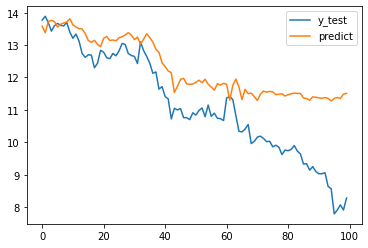

In [28]:
import matplotlib.pyplot as plt

y_test_test.plot()
plt.show()

## Evaluation

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_test,onedcnn_preds[0]))
print("mean_absolute_error is : ", mean_absolute_error(y_test,onedcnn_preds[0]))
print("r2_score is : ", r2_score(y_test,onedcnn_preds[0]))

mean_squared_error is :  1.9317728083847163
mean_absolute_error is :  1.1101459453582765
r2_score is :  0.25597762648602995


## Rolling Window

### Rolling with window 3

In [30]:
train_rolling_3 = train_save.rolling(window=3).mean()
train_rolling_3.dropna(inplace=True)
train_rolling_3.reset_index(inplace=True)
train_rolling_3.drop("index", axis=1,inplace=True)
train_rolling_3

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020010e+07,7.423333,7.696667,7.366667,7.523333,7.433333,0.090000,1.228067,478180.990000,359357.734333,7.583333
1,2.020011e+07,7.500000,7.746667,7.453333,7.583333,7.523333,0.060000,0.796333,466231.563333,353043.045000,7.753333
2,2.020011e+07,7.543333,7.903333,7.466667,7.753333,7.583333,0.170000,2.226333,650622.806667,502094.879667,7.923333
3,2.020011e+07,7.810000,8.073333,7.630000,7.923333,7.753333,0.170000,2.220733,690683.790000,543374.497667,8.150000
4,2.020011e+07,7.983333,8.326667,7.760000,8.150000,7.923333,0.226667,2.890267,784671.053333,627820.648333,8.260000
...,...,...,...,...,...,...,...,...,...,...,...
555,2.022042e+07,8.906667,8.980000,8.663333,8.756667,8.910000,-0.153333,-1.704600,169935.233333,149035.003333,8.333333
556,2.022042e+07,8.720000,8.750000,8.263333,8.333333,8.756667,-0.423333,-4.849167,225111.660000,189746.032667,8.090000
557,2.022042e+07,8.333333,8.480000,8.013333,8.090000,8.333333,-0.243333,-2.790433,279793.673333,228588.178667,7.923333
558,2.022043e+07,8.053333,8.270000,7.763333,7.923333,8.090000,-0.166667,-1.846100,313513.683333,251400.996333,7.963333


In [31]:
train_rolling_3 = setup_cv(train_rolling_3)

In [32]:
lgbm_models = train_1dcnn(train_rolling_3, 5)

Device used : cpu
epoch 0  | loss: 226.39981| val_0_mse: 4195274956.54398|  0:00:00s
epoch 1  | loss: 206.34177| val_0_mse: 550911052.74278|  0:00:00s
epoch 2  | loss: 188.20184| val_0_mse: 16261084.9169|  0:00:00s
epoch 3  | loss: 173.2916| val_0_mse: 19240076.35631|  0:00:00s
epoch 4  | loss: 152.9034| val_0_mse: 576280142.90749|  0:00:00s
epoch 5  | loss: 145.29214| val_0_mse: 1398747786.28079|  0:00:00s
epoch 6  | loss: 124.58932| val_0_mse: 1419904446.43615|  0:00:00s
epoch 7  | loss: 109.27383| val_0_mse: 1775538104.32539|  0:00:00s
epoch 8  | loss: 91.6831 | val_0_mse: 3281056773.75785|  0:00:00s
epoch 9  | loss: 73.25677| val_0_mse: 3253591229.27923|  0:00:00s
epoch 10 | loss: 60.24152| val_0_mse: 3209892760.71149|  0:00:00s
epoch 11 | loss: 48.69009| val_0_mse: 3138825062.66464|  0:00:00s
epoch 12 | loss: 39.70681| val_0_mse: 3006304465.3361|  0:00:00s
epoch 13 | loss: 31.34842| val_0_mse: 2809744739.63348|  0:00:00s
epoch 14 | loss: 24.34868| val_0_mse: 2673513255.74706|  0:0

epoch 133| loss: 0.2167  | val_0_mse: 957165.18784|  0:00:02s
epoch 134| loss: 0.19938 | val_0_mse: 922662.22302|  0:00:03s
epoch 135| loss: 0.3396  | val_0_mse: 883965.3546|  0:00:03s
epoch 136| loss: 0.18967 | val_0_mse: 850137.91021|  0:00:03s
epoch 137| loss: 0.22035 | val_0_mse: 821217.21207|  0:00:03s
epoch 138| loss: 0.24841 | val_0_mse: 810399.63267|  0:00:03s
epoch 139| loss: 0.50609 | val_0_mse: 815476.72934|  0:00:03s
epoch 140| loss: 0.34766 | val_0_mse: 812471.58947|  0:00:03s
epoch 141| loss: 0.30365 | val_0_mse: 792064.90692|  0:00:03s
epoch 142| loss: 0.37438 | val_0_mse: 761962.39529|  0:00:03s
epoch 143| loss: 0.44813 | val_0_mse: 724903.47286|  0:00:03s
epoch 144| loss: 0.27701 | val_0_mse: 703554.87712|  0:00:03s
epoch 145| loss: 0.26713 | val_0_mse: 696790.02615|  0:00:03s
epoch 146| loss: 0.28628 | val_0_mse: 694983.11177|  0:00:03s
epoch 147| loss: 0.25811 | val_0_mse: 666248.35807|  0:00:03s
epoch 148| loss: 0.23862 | val_0_mse: 624393.16212|  0:00:03s
epoch 149

epoch 266| loss: 0.19619 | val_0_mse: 47774.93229|  0:00:06s
epoch 267| loss: 0.17232 | val_0_mse: 47869.96011|  0:00:06s
epoch 268| loss: 0.22554 | val_0_mse: 47746.37444|  0:00:06s
epoch 269| loss: 0.36775 | val_0_mse: 43422.87616|  0:00:06s
epoch 270| loss: 0.33073 | val_0_mse: 34114.32285|  0:00:06s
epoch 271| loss: 0.14856 | val_0_mse: 30231.78288|  0:00:06s
epoch 272| loss: 0.16466 | val_0_mse: 29120.16511|  0:00:06s
epoch 273| loss: 0.26217 | val_0_mse: 28259.80575|  0:00:06s
epoch 274| loss: 0.28005 | val_0_mse: 27890.28373|  0:00:06s
epoch 275| loss: 0.15778 | val_0_mse: 27484.93644|  0:00:06s
epoch 276| loss: 0.13361 | val_0_mse: 27035.70412|  0:00:06s
epoch 277| loss: 0.12703 | val_0_mse: 26517.349|  0:00:06s
epoch 278| loss: 0.17804 | val_0_mse: 25482.13647|  0:00:06s
epoch 279| loss: 0.14605 | val_0_mse: 25247.45397|  0:00:06s
epoch 280| loss: 0.14074 | val_0_mse: 25247.10545|  0:00:06s
epoch 281| loss: 0.15867 | val_0_mse: 24637.34539|  0:00:06s
epoch 282| loss: 0.15754 |

epoch 403| loss: 0.14918 | val_0_mse: 1275.33014|  0:00:09s
epoch 404| loss: 0.14721 | val_0_mse: 1192.83436|  0:00:09s
epoch 405| loss: 0.10503 | val_0_mse: 1159.93005|  0:00:09s
epoch 406| loss: 0.08949 | val_0_mse: 1145.83088|  0:00:09s
epoch 407| loss: 0.09448 | val_0_mse: 1121.58619|  0:00:09s
epoch 408| loss: 0.09704 | val_0_mse: 1075.85479|  0:00:09s
epoch 409| loss: 0.14286 | val_0_mse: 1062.91094|  0:00:09s
epoch 410| loss: 0.11509 | val_0_mse: 1072.614|  0:00:09s
epoch 411| loss: 0.08262 | val_0_mse: 1110.0969|  0:00:09s
epoch 412| loss: 0.10001 | val_0_mse: 1117.96698|  0:00:09s
epoch 413| loss: 0.11121 | val_0_mse: 1112.58139|  0:00:09s
epoch 414| loss: 0.06898 | val_0_mse: 1098.25741|  0:00:09s
epoch 415| loss: 0.11001 | val_0_mse: 1071.60278|  0:00:09s
epoch 416| loss: 0.07549 | val_0_mse: 1024.36464|  0:00:09s
epoch 417| loss: 0.08907 | val_0_mse: 997.83668|  0:00:09s
epoch 418| loss: 0.11682 | val_0_mse: 971.78034|  0:00:09s
epoch 419| loss: 0.10032 | val_0_mse: 941.956

epoch 543| loss: 0.06895 | val_0_mse: 17.42616|  0:00:13s
epoch 544| loss: 0.07739 | val_0_mse: 15.10532|  0:00:13s
epoch 545| loss: 0.07082 | val_0_mse: 14.81017|  0:00:13s
epoch 546| loss: 0.07371 | val_0_mse: 14.01868|  0:00:13s
epoch 547| loss: 0.08136 | val_0_mse: 13.32393|  0:00:13s
epoch 548| loss: 0.08156 | val_0_mse: 13.64442|  0:00:13s
epoch 549| loss: 0.06877 | val_0_mse: 13.44257|  0:00:13s
epoch 550| loss: 0.06248 | val_0_mse: 13.25336|  0:00:13s
epoch 551| loss: 0.1389  | val_0_mse: 12.80454|  0:00:13s
epoch 552| loss: 0.131   | val_0_mse: 11.53129|  0:00:13s
epoch 553| loss: 0.1093  | val_0_mse: 9.65558 |  0:00:13s
epoch 554| loss: 0.12623 | val_0_mse: 8.8709  |  0:00:13s
epoch 555| loss: 0.17043 | val_0_mse: 9.02571 |  0:00:13s
epoch 556| loss: 0.13255 | val_0_mse: 10.18718|  0:00:13s
epoch 557| loss: 0.07125 | val_0_mse: 9.85553 |  0:00:13s
epoch 558| loss: 0.07057 | val_0_mse: 8.41943 |  0:00:13s
epoch 559| loss: 0.07692 | val_0_mse: 6.96581 |  0:00:13s
epoch 560| los

epoch 690| loss: 0.06205 | val_0_mse: 0.82111 |  0:00:16s
epoch 691| loss: 0.08046 | val_0_mse: 0.89678 |  0:00:16s
epoch 692| loss: 0.13319 | val_0_mse: 0.84927 |  0:00:16s
epoch 693| loss: 0.0866  | val_0_mse: 0.67395 |  0:00:16s
epoch 694| loss: 0.07309 | val_0_mse: 0.6253  |  0:00:16s
epoch 695| loss: 0.09912 | val_0_mse: 0.66347 |  0:00:16s
epoch 696| loss: 0.05429 | val_0_mse: 0.86895 |  0:00:16s
epoch 697| loss: 0.09004 | val_0_mse: 0.96133 |  0:00:16s
epoch 698| loss: 0.12885 | val_0_mse: 0.89235 |  0:00:16s
epoch 699| loss: 0.07457 | val_0_mse: 0.71122 |  0:00:16s
epoch 700| loss: 0.06524 | val_0_mse: 0.66778 |  0:00:16s
epoch 701| loss: 0.10658 | val_0_mse: 0.74677 |  0:00:16s
epoch 702| loss: 0.07246 | val_0_mse: 0.9975  |  0:00:16s
epoch 703| loss: 0.10154 | val_0_mse: 1.06222 |  0:00:16s
epoch 704| loss: 0.11077 | val_0_mse: 0.95869 |  0:00:16s
epoch 705| loss: 0.07575 | val_0_mse: 0.70601 |  0:00:16s
epoch 706| loss: 0.07725 | val_0_mse: 0.61013 |  0:00:16s
epoch 707| los

epoch 834| loss: 0.15188 | val_0_mse: 0.55755 |  0:00:19s
epoch 835| loss: 0.11017 | val_0_mse: 0.79759 |  0:00:19s
epoch 836| loss: 0.07943 | val_0_mse: 0.87208 |  0:00:19s
epoch 837| loss: 0.13412 | val_0_mse: 0.68564 |  0:00:19s
epoch 838| loss: 0.11563 | val_0_mse: 0.51214 |  0:00:19s
epoch 839| loss: 0.08265 | val_0_mse: 0.46288 |  0:00:19s
epoch 840| loss: 0.10205 | val_0_mse: 0.55785 |  0:00:19s
epoch 841| loss: 0.1032  | val_0_mse: 0.63469 |  0:00:19s
epoch 842| loss: 0.07927 | val_0_mse: 0.59737 |  0:00:19s
epoch 843| loss: 0.06993 | val_0_mse: 0.44526 |  0:00:19s
epoch 844| loss: 0.08989 | val_0_mse: 0.42664 |  0:00:19s
epoch 845| loss: 0.09536 | val_0_mse: 0.48064 |  0:00:19s
epoch 846| loss: 0.07542 | val_0_mse: 0.628   |  0:00:19s
epoch 847| loss: 0.08854 | val_0_mse: 0.67559 |  0:00:19s
epoch 848| loss: 0.11622 | val_0_mse: 0.55694 |  0:00:19s
epoch 849| loss: 0.11569 | val_0_mse: 0.35792 |  0:00:19s
epoch 850| loss: 0.09474 | val_0_mse: 0.32332 |  0:00:19s
epoch 851| los

epoch 979| loss: 0.05698 | val_0_mse: 0.13946 |  0:00:22s
epoch 980| loss: 0.06688 | val_0_mse: 0.18426 |  0:00:22s
epoch 981| loss: 0.08256 | val_0_mse: 0.20267 |  0:00:22s
epoch 982| loss: 0.06763 | val_0_mse: 0.18288 |  0:00:22s
epoch 983| loss: 0.07634 | val_0_mse: 0.15358 |  0:00:22s
epoch 984| loss: 0.05043 | val_0_mse: 0.1777  |  0:00:22s
epoch 985| loss: 0.0783  | val_0_mse: 0.16129 |  0:00:22s
epoch 986| loss: 0.05545 | val_0_mse: 0.12973 |  0:00:22s
epoch 987| loss: 0.07193 | val_0_mse: 0.13572 |  0:00:22s
epoch 988| loss: 0.08173 | val_0_mse: 0.14863 |  0:00:22s
epoch 989| loss: 0.05816 | val_0_mse: 0.1678  |  0:00:22s
epoch 990| loss: 0.06431 | val_0_mse: 0.15172 |  0:00:22s
epoch 991| loss: 0.06345 | val_0_mse: 0.14152 |  0:00:22s
epoch 992| loss: 0.08203 | val_0_mse: 0.16038 |  0:00:22s
epoch 993| loss: 0.08687 | val_0_mse: 0.17637 |  0:00:22s
epoch 994| loss: 0.05038 | val_0_mse: 0.17633 |  0:00:22s
epoch 995| loss: 0.08019 | val_0_mse: 0.15623 |  0:00:22s
epoch 996| los

epoch 1128| loss: 0.05987 | val_0_mse: 0.13426 |  0:00:25s
epoch 1129| loss: 0.09242 | val_0_mse: 0.14034 |  0:00:25s
epoch 1130| loss: 0.10401 | val_0_mse: 0.11579 |  0:00:25s
epoch 1131| loss: 0.06042 | val_0_mse: 0.12658 |  0:00:25s
epoch 1132| loss: 0.07956 | val_0_mse: 0.14131 |  0:00:25s
epoch 1133| loss: 0.09642 | val_0_mse: 0.12758 |  0:00:25s
epoch 1134| loss: 0.07163 | val_0_mse: 0.14442 |  0:00:25s
epoch 1135| loss: 0.07394 | val_0_mse: 0.15418 |  0:00:25s
epoch 1136| loss: 0.09618 | val_0_mse: 0.13264 |  0:00:25s
epoch 1137| loss: 0.05098 | val_0_mse: 0.14161 |  0:00:25s
epoch 1138| loss: 0.07543 | val_0_mse: 0.15608 |  0:00:25s
epoch 1139| loss: 0.11546 | val_0_mse: 0.14405 |  0:00:25s
epoch 1140| loss: 0.06781 | val_0_mse: 0.1622  |  0:00:25s
epoch 1141| loss: 0.07074 | val_0_mse: 0.17906 |  0:00:25s
epoch 1142| loss: 0.09223 | val_0_mse: 0.16062 |  0:00:25s
epoch 1143| loss: 0.0588  | val_0_mse: 0.15697 |  0:00:25s
epoch 1144| loss: 0.08867 | val_0_mse: 0.16766 |  0:00:2

epoch 1270| loss: 0.05388 | val_0_mse: 0.1497  |  0:00:28s
epoch 1271| loss: 0.0678  | val_0_mse: 0.14348 |  0:00:28s
epoch 1272| loss: 0.0572  | val_0_mse: 0.12402 |  0:00:28s
epoch 1273| loss: 0.05285 | val_0_mse: 0.13371 |  0:00:28s
epoch 1274| loss: 0.06543 | val_0_mse: 0.14194 |  0:00:28s
epoch 1275| loss: 0.0559  | val_0_mse: 0.13546 |  0:00:28s
epoch 1276| loss: 0.06178 | val_0_mse: 0.12762 |  0:00:28s
epoch 1277| loss: 0.078   | val_0_mse: 0.12456 |  0:00:28s
epoch 1278| loss: 0.08878 | val_0_mse: 0.12297 |  0:00:28s
epoch 1279| loss: 0.06231 | val_0_mse: 0.13364 |  0:00:28s
epoch 1280| loss: 0.06469 | val_0_mse: 0.1389  |  0:00:28s
epoch 1281| loss: 0.06195 | val_0_mse: 0.13715 |  0:00:28s
epoch 1282| loss: 0.0586  | val_0_mse: 0.13658 |  0:00:28s
epoch 1283| loss: 0.06532 | val_0_mse: 0.14738 |  0:00:28s
epoch 1284| loss: 0.06488 | val_0_mse: 0.13749 |  0:00:28s
epoch 1285| loss: 0.04632 | val_0_mse: 0.139   |  0:00:28s
epoch 1286| loss: 0.06701 | val_0_mse: 0.14937 |  0:00:2

epoch 1413| loss: 0.04537 | val_0_mse: 0.13335 |  0:00:30s
epoch 1414| loss: 0.06485 | val_0_mse: 0.12985 |  0:00:30s
epoch 1415| loss: 0.06203 | val_0_mse: 0.13061 |  0:00:30s
epoch 1416| loss: 0.04962 | val_0_mse: 0.14709 |  0:00:30s
epoch 1417| loss: 0.05586 | val_0_mse: 0.14179 |  0:00:30s
epoch 1418| loss: 0.04627 | val_0_mse: 0.13856 |  0:00:30s
epoch 1419| loss: 0.05795 | val_0_mse: 0.14557 |  0:00:30s
epoch 1420| loss: 0.04831 | val_0_mse: 0.15137 |  0:00:30s
epoch 1421| loss: 0.04658 | val_0_mse: 0.15449 |  0:00:31s
epoch 1422| loss: 0.04824 | val_0_mse: 0.14891 |  0:00:31s
epoch 1423| loss: 0.05588 | val_0_mse: 0.14835 |  0:00:31s
epoch 1424| loss: 0.05195 | val_0_mse: 0.15896 |  0:00:31s
epoch 1425| loss: 0.04449 | val_0_mse: 0.17747 |  0:00:31s
epoch 1426| loss: 0.0441  | val_0_mse: 0.17579 |  0:00:31s
epoch 1427| loss: 0.06031 | val_0_mse: 0.17223 |  0:00:31s
epoch 1428| loss: 0.03596 | val_0_mse: 0.18245 |  0:00:31s
epoch 1429| loss: 0.05732 | val_0_mse: 0.1715  |  0:00:3

epoch 1556| loss: 0.0474  | val_0_mse: 0.12922 |  0:00:33s
epoch 1557| loss: 0.03836 | val_0_mse: 0.13736 |  0:00:33s
epoch 1558| loss: 0.04021 | val_0_mse: 0.14232 |  0:00:33s
epoch 1559| loss: 0.05442 | val_0_mse: 0.13038 |  0:00:33s
epoch 1560| loss: 0.04123 | val_0_mse: 0.12996 |  0:00:33s
epoch 1561| loss: 0.0425  | val_0_mse: 0.13059 |  0:00:33s
epoch 1562| loss: 0.05016 | val_0_mse: 0.13877 |  0:00:33s
epoch 1563| loss: 0.0515  | val_0_mse: 0.14266 |  0:00:33s
epoch 1564| loss: 0.05764 | val_0_mse: 0.13892 |  0:00:33s
epoch 1565| loss: 0.04794 | val_0_mse: 0.15535 |  0:00:33s
epoch 1566| loss: 0.05338 | val_0_mse: 0.1536  |  0:00:33s
epoch 1567| loss: 0.03846 | val_0_mse: 0.15499 |  0:00:33s
epoch 1568| loss: 0.05419 | val_0_mse: 0.1635  |  0:00:33s
epoch 1569| loss: 0.04401 | val_0_mse: 0.17213 |  0:00:33s
epoch 1570| loss: 0.05168 | val_0_mse: 0.15942 |  0:00:33s
epoch 1571| loss: 0.0593  | val_0_mse: 0.17113 |  0:00:33s
epoch 1572| loss: 0.0461  | val_0_mse: 0.1779  |  0:00:3

epoch 95 | loss: 0.33897 | val_0_mse: 3355475.5564|  0:00:02s
epoch 96 | loss: 0.27309 | val_0_mse: 2312553.4043|  0:00:02s
epoch 97 | loss: 0.20484 | val_0_mse: 764466.77971|  0:00:02s
epoch 98 | loss: 0.22521 | val_0_mse: 712362.64598|  0:00:02s
epoch 99 | loss: 0.26274 | val_0_mse: 518667.16561|  0:00:02s
epoch 100| loss: 0.31661 | val_0_mse: 144871.38379|  0:00:02s
epoch 101| loss: 0.2926  | val_0_mse: 128316.59876|  0:00:02s
epoch 102| loss: 0.23105 | val_0_mse: 122064.45504|  0:00:02s
epoch 103| loss: 0.29767 | val_0_mse: 83066.16052|  0:00:02s
epoch 104| loss: 0.25649 | val_0_mse: 1531752.82473|  0:00:02s
epoch 105| loss: 0.40425 | val_0_mse: 1408235.38957|  0:00:02s
epoch 106| loss: 0.27681 | val_0_mse: 1337671.99704|  0:00:02s
epoch 107| loss: 0.2849  | val_0_mse: 1248091.91537|  0:00:02s
epoch 108| loss: 0.20431 | val_0_mse: 133810.6678|  0:00:02s
epoch 109| loss: 0.26399 | val_0_mse: 68683.69935|  0:00:02s
epoch 110| loss: 0.17211 | val_0_mse: 73198.57376|  0:00:02s
epoch 11

epoch 239| loss: 0.19069 | val_0_mse: 608.44521|  0:00:04s
epoch 240| loss: 0.13333 | val_0_mse: 538.84411|  0:00:04s
epoch 241| loss: 0.15202 | val_0_mse: 435.20634|  0:00:05s
epoch 242| loss: 0.11104 | val_0_mse: 349.508 |  0:00:05s
epoch 243| loss: 0.17583 | val_0_mse: 303.24802|  0:00:05s
epoch 244| loss: 0.16775 | val_0_mse: 302.57634|  0:00:05s
epoch 245| loss: 0.10791 | val_0_mse: 336.00293|  0:00:05s
epoch 246| loss: 0.18043 | val_0_mse: 322.77211|  0:00:05s
epoch 247| loss: 0.2417  | val_0_mse: 285.49846|  0:00:05s
epoch 248| loss: 0.1767  | val_0_mse: 239.98194|  0:00:05s
epoch 249| loss: 0.13258 | val_0_mse: 220.85539|  0:00:05s
epoch 250| loss: 0.1493  | val_0_mse: 221.584 |  0:00:05s
epoch 251| loss: 0.16373 | val_0_mse: 248.97023|  0:00:05s
epoch 252| loss: 0.15476 | val_0_mse: 234.74096|  0:00:05s
epoch 253| loss: 0.16666 | val_0_mse: 189.58799|  0:00:05s
epoch 254| loss: 0.09706 | val_0_mse: 141.63513|  0:00:05s
epoch 255| loss: 0.11983 | val_0_mse: 131.12457|  0:00:05s

epoch 387| loss: 0.08868 | val_0_mse: 101.60964|  0:00:07s
epoch 388| loss: 0.0882  | val_0_mse: 47.93528|  0:00:08s
epoch 389| loss: 0.0754  | val_0_mse: 44.15492|  0:00:08s
epoch 390| loss: 0.08175 | val_0_mse: 42.42432|  0:00:08s
epoch 391| loss: 0.09909 | val_0_mse: 42.92744|  0:00:08s
epoch 392| loss: 0.07538 | val_0_mse: 45.73165|  0:00:08s
epoch 393| loss: 0.10022 | val_0_mse: 49.763  |  0:00:08s
epoch 394| loss: 0.09297 | val_0_mse: 50.79728|  0:00:08s
epoch 395| loss: 0.07292 | val_0_mse: 54.05742|  0:00:08s
epoch 396| loss: 0.12852 | val_0_mse: 60.12677|  0:00:08s
epoch 397| loss: 0.10129 | val_0_mse: 67.82566|  0:00:08s
epoch 398| loss: 0.08696 | val_0_mse: 86.39746|  0:00:08s
epoch 399| loss: 0.13799 | val_0_mse: 94.31246|  0:00:08s
epoch 400| loss: 0.12891 | val_0_mse: 93.66119|  0:00:08s
epoch 401| loss: 0.09777 | val_0_mse: 88.7218 |  0:00:08s
epoch 402| loss: 0.19159 | val_0_mse: 88.11472|  0:00:08s
epoch 403| loss: 0.13216 | val_0_mse: 96.38588|  0:00:08s
epoch 404| lo

epoch 534| loss: 0.05365 | val_0_mse: 0.5377  |  0:00:10s
epoch 535| loss: 0.08084 | val_0_mse: 0.52775 |  0:00:10s
epoch 536| loss: 0.07904 | val_0_mse: 0.50385 |  0:00:11s
epoch 537| loss: 0.07131 | val_0_mse: 0.52173 |  0:00:11s
epoch 538| loss: 0.0648  | val_0_mse: 0.60313 |  0:00:11s
epoch 539| loss: 0.0651  | val_0_mse: 0.63069 |  0:00:11s
epoch 540| loss: 0.0788  | val_0_mse: 0.6212  |  0:00:11s
epoch 541| loss: 0.07351 | val_0_mse: 0.65573 |  0:00:11s
epoch 542| loss: 0.07442 | val_0_mse: 0.74561 |  0:00:11s
epoch 543| loss: 0.05519 | val_0_mse: 0.81478 |  0:00:11s
epoch 544| loss: 0.09194 | val_0_mse: 0.83366 |  0:00:11s
epoch 545| loss: 0.11022 | val_0_mse: 0.79488 |  0:00:11s
epoch 546| loss: 0.07905 | val_0_mse: 0.75915 |  0:00:11s
epoch 547| loss: 0.06966 | val_0_mse: 0.71247 |  0:00:11s
epoch 548| loss: 0.05842 | val_0_mse: 0.62647 |  0:00:11s
epoch 549| loss: 0.05686 | val_0_mse: 0.53866 |  0:00:11s
epoch 550| loss: 0.06173 | val_0_mse: 0.49787 |  0:00:11s
epoch 551| los

epoch 682| loss: 0.08274 | val_0_mse: 4.68023 |  0:00:14s
epoch 683| loss: 0.09174 | val_0_mse: 5.06993 |  0:00:14s
epoch 684| loss: 0.09206 | val_0_mse: 5.15669 |  0:00:14s
epoch 685| loss: 0.0659  | val_0_mse: 4.91047 |  0:00:14s
epoch 686| loss: 0.09316 | val_0_mse: 4.79499 |  0:00:14s
epoch 687| loss: 0.08965 | val_0_mse: 4.79443 |  0:00:14s
epoch 688| loss: 0.10176 | val_0_mse: 4.67924 |  0:00:14s
epoch 689| loss: 0.0848  | val_0_mse: 4.47322 |  0:00:14s
epoch 690| loss: 0.07386 | val_0_mse: 4.39379 |  0:00:14s
epoch 691| loss: 0.06474 | val_0_mse: 4.45571 |  0:00:14s
epoch 692| loss: 0.08748 | val_0_mse: 4.58847 |  0:00:14s
epoch 693| loss: 0.07801 | val_0_mse: 4.78987 |  0:00:14s
epoch 694| loss: 0.0546  | val_0_mse: 5.47598 |  0:00:14s
epoch 695| loss: 0.06698 | val_0_mse: 6.16122 |  0:00:14s
epoch 696| loss: 0.06532 | val_0_mse: 7.32672 |  0:00:14s
epoch 697| loss: 0.05322 | val_0_mse: 8.32521 |  0:00:14s
epoch 698| loss: 0.06687 | val_0_mse: 8.82416 |  0:00:14s
epoch 699| los

epoch 825| loss: 0.05841 | val_0_mse: 0.55063 |  0:00:16s
epoch 826| loss: 0.07243 | val_0_mse: 0.484   |  0:00:16s
epoch 827| loss: 0.10023 | val_0_mse: 0.44277 |  0:00:16s
epoch 828| loss: 0.05154 | val_0_mse: 0.46592 |  0:00:16s
epoch 829| loss: 0.0862  | val_0_mse: 0.46326 |  0:00:16s
epoch 830| loss: 0.06077 | val_0_mse: 0.41471 |  0:00:16s
epoch 831| loss: 0.06581 | val_0_mse: 0.37636 |  0:00:16s
epoch 832| loss: 0.07274 | val_0_mse: 0.38752 |  0:00:16s
epoch 833| loss: 0.07607 | val_0_mse: 0.36585 |  0:00:16s
epoch 834| loss: 0.06816 | val_0_mse: 0.38282 |  0:00:16s
epoch 835| loss: 0.11019 | val_0_mse: 0.36832 |  0:00:17s
epoch 836| loss: 0.1318  | val_0_mse: 0.29688 |  0:00:17s
epoch 837| loss: 0.09469 | val_0_mse: 0.27239 |  0:00:17s
epoch 838| loss: 0.0802  | val_0_mse: 0.24282 |  0:00:17s
epoch 839| loss: 0.09528 | val_0_mse: 0.26141 |  0:00:17s
epoch 840| loss: 0.09646 | val_0_mse: 0.29053 |  0:00:17s
epoch 841| loss: 0.13154 | val_0_mse: 0.25049 |  0:00:17s
epoch 842| los

epoch 972| loss: 0.05936 | val_0_mse: 0.10738 |  0:00:19s
epoch 973| loss: 0.06559 | val_0_mse: 0.08769 |  0:00:19s
epoch 974| loss: 0.06029 | val_0_mse: 0.07582 |  0:00:19s
epoch 975| loss: 0.08489 | val_0_mse: 0.09323 |  0:00:19s
epoch 976| loss: 0.05121 | val_0_mse: 0.09493 |  0:00:19s
epoch 977| loss: 0.06778 | val_0_mse: 0.06983 |  0:00:19s
epoch 978| loss: 0.06056 | val_0_mse: 0.08515 |  0:00:19s
epoch 979| loss: 0.06024 | val_0_mse: 0.10684 |  0:00:19s
epoch 980| loss: 0.09313 | val_0_mse: 0.11017 |  0:00:19s
epoch 981| loss: 0.06592 | val_0_mse: 0.07796 |  0:00:20s
epoch 982| loss: 0.07769 | val_0_mse: 0.07185 |  0:00:20s
epoch 983| loss: 0.06813 | val_0_mse: 0.09123 |  0:00:20s
epoch 984| loss: 0.06127 | val_0_mse: 0.11192 |  0:00:20s
epoch 985| loss: 0.07727 | val_0_mse: 0.09678 |  0:00:20s
epoch 986| loss: 0.06097 | val_0_mse: 0.10123 |  0:00:20s
epoch 987| loss: 0.08815 | val_0_mse: 0.10321 |  0:00:20s
epoch 988| loss: 0.06927 | val_0_mse: 0.14686 |  0:00:20s
epoch 989| los

epoch 1114| loss: 0.05665 | val_0_mse: 0.11996 |  0:00:22s
epoch 1115| loss: 0.12557 | val_0_mse: 0.17621 |  0:00:22s
epoch 1116| loss: 0.20689 | val_0_mse: 0.15269 |  0:00:22s
epoch 1117| loss: 0.17025 | val_0_mse: 0.10575 |  0:00:22s
epoch 1118| loss: 0.07527 | val_0_mse: 0.23664 |  0:00:22s
epoch 1119| loss: 0.17561 | val_0_mse: 0.40578 |  0:00:22s
epoch 1120| loss: 0.33046 | val_0_mse: 0.41557 |  0:00:22s
epoch 1121| loss: 0.30675 | val_0_mse: 0.26607 |  0:00:22s
epoch 1122| loss: 0.15772 | val_0_mse: 0.11708 |  0:00:22s
epoch 1123| loss: 0.12417 | val_0_mse: 0.15302 |  0:00:22s
epoch 1124| loss: 0.22965 | val_0_mse: 0.20912 |  0:00:22s
epoch 1125| loss: 0.26566 | val_0_mse: 0.18111 |  0:00:22s
epoch 1126| loss: 0.17186 | val_0_mse: 0.15063 |  0:00:22s
epoch 1127| loss: 0.12435 | val_0_mse: 0.20023 |  0:00:22s
epoch 1128| loss: 0.15349 | val_0_mse: 0.22848 |  0:00:22s
epoch 1129| loss: 0.16359 | val_0_mse: 0.18916 |  0:00:22s
epoch 1130| loss: 0.09451 | val_0_mse: 0.14472 |  0:00:2

epoch 1255| loss: 0.05123 | val_0_mse: 0.11945 |  0:00:25s
epoch 1256| loss: 0.05151 | val_0_mse: 0.09311 |  0:00:25s
epoch 1257| loss: 0.05015 | val_0_mse: 0.08292 |  0:00:25s
epoch 1258| loss: 0.05175 | val_0_mse: 0.0858  |  0:00:25s
epoch 1259| loss: 0.04883 | val_0_mse: 0.1023  |  0:00:25s
epoch 1260| loss: 0.05264 | val_0_mse: 0.09027 |  0:00:25s
epoch 1261| loss: 0.06169 | val_0_mse: 0.07293 |  0:00:25s
epoch 1262| loss: 0.05583 | val_0_mse: 0.08238 |  0:00:25s
epoch 1263| loss: 0.05311 | val_0_mse: 0.09409 |  0:00:25s
epoch 1264| loss: 0.0444  | val_0_mse: 0.08164 |  0:00:25s
epoch 1265| loss: 0.0636  | val_0_mse: 0.08181 |  0:00:25s
epoch 1266| loss: 0.04591 | val_0_mse: 0.08609 |  0:00:25s
epoch 1267| loss: 0.0513  | val_0_mse: 0.07226 |  0:00:25s
epoch 1268| loss: 0.05372 | val_0_mse: 0.06764 |  0:00:25s
epoch 1269| loss: 0.05175 | val_0_mse: 0.09068 |  0:00:25s
epoch 1270| loss: 0.05838 | val_0_mse: 0.09254 |  0:00:25s
epoch 1271| loss: 0.04538 | val_0_mse: 0.06771 |  0:00:2

epoch 1397| loss: 0.09285 | val_0_mse: 0.07862 |  0:00:28s
epoch 1398| loss: 0.04777 | val_0_mse: 0.08299 |  0:00:28s
epoch 1399| loss: 0.07623 | val_0_mse: 0.10257 |  0:00:28s
epoch 1400| loss: 0.08839 | val_0_mse: 0.10348 |  0:00:28s
epoch 1401| loss: 0.0722  | val_0_mse: 0.14362 |  0:00:28s
epoch 1402| loss: 0.1181  | val_0_mse: 0.1842  |  0:00:28s
epoch 1403| loss: 0.12534 | val_0_mse: 0.16418 |  0:00:28s
epoch 1404| loss: 0.09523 | val_0_mse: 0.10894 |  0:00:28s
epoch 1405| loss: 0.08056 | val_0_mse: 0.07639 |  0:00:28s
epoch 1406| loss: 0.08177 | val_0_mse: 0.08662 |  0:00:28s
epoch 1407| loss: 0.04866 | val_0_mse: 0.15368 |  0:00:28s
epoch 1408| loss: 0.10233 | val_0_mse: 0.1552  |  0:00:28s
epoch 1409| loss: 0.13596 | val_0_mse: 0.09167 |  0:00:28s
epoch 1410| loss: 0.06174 | val_0_mse: 0.08456 |  0:00:28s
epoch 1411| loss: 0.09825 | val_0_mse: 0.10487 |  0:00:28s
epoch 1412| loss: 0.13274 | val_0_mse: 0.08578 |  0:00:28s
epoch 1413| loss: 0.07953 | val_0_mse: 0.1163  |  0:00:2

epoch 1539| loss: 0.05365 | val_0_mse: 0.09087 |  0:00:31s
epoch 1540| loss: 0.0714  | val_0_mse: 0.12222 |  0:00:31s
epoch 1541| loss: 0.04979 | val_0_mse: 0.12312 |  0:00:31s
epoch 1542| loss: 0.0513  | val_0_mse: 0.10698 |  0:00:31s
epoch 1543| loss: 0.04828 | val_0_mse: 0.12132 |  0:00:31s
epoch 1544| loss: 0.03934 | val_0_mse: 0.12159 |  0:00:31s
epoch 1545| loss: 0.04976 | val_0_mse: 0.11122 |  0:00:31s
epoch 1546| loss: 0.04838 | val_0_mse: 0.13638 |  0:00:31s
epoch 1547| loss: 0.04971 | val_0_mse: 0.1132  |  0:00:31s
epoch 1548| loss: 0.04714 | val_0_mse: 0.09012 |  0:00:31s
epoch 1549| loss: 0.05211 | val_0_mse: 0.1086  |  0:00:31s
epoch 1550| loss: 0.05111 | val_0_mse: 0.09737 |  0:00:31s
epoch 1551| loss: 0.04528 | val_0_mse: 0.07775 |  0:00:31s
epoch 1552| loss: 0.06741 | val_0_mse: 0.08407 |  0:00:31s
epoch 1553| loss: 0.05842 | val_0_mse: 0.12984 |  0:00:31s
epoch 1554| loss: 0.06813 | val_0_mse: 0.12265 |  0:00:31s
epoch 1555| loss: 0.05986 | val_0_mse: 0.08073 |  0:00:3

epoch 1680| loss: 0.06122 | val_0_mse: 0.10898 |  0:00:33s
epoch 1681| loss: 0.06557 | val_0_mse: 0.11614 |  0:00:33s
epoch 1682| loss: 0.06698 | val_0_mse: 0.07667 |  0:00:33s
epoch 1683| loss: 0.05542 | val_0_mse: 0.07286 |  0:00:34s
epoch 1684| loss: 0.05771 | val_0_mse: 0.09792 |  0:00:34s
epoch 1685| loss: 0.05623 | val_0_mse: 0.07862 |  0:00:34s
epoch 1686| loss: 0.04966 | val_0_mse: 0.07002 |  0:00:34s
epoch 1687| loss: 0.0749  | val_0_mse: 0.0702  |  0:00:34s
epoch 1688| loss: 0.06316 | val_0_mse: 0.09523 |  0:00:34s
epoch 1689| loss: 0.05099 | val_0_mse: 0.09963 |  0:00:34s
epoch 1690| loss: 0.0476  | val_0_mse: 0.07076 |  0:00:34s
epoch 1691| loss: 0.05352 | val_0_mse: 0.07128 |  0:00:34s
epoch 1692| loss: 0.05109 | val_0_mse: 0.11033 |  0:00:34s
epoch 1693| loss: 0.05986 | val_0_mse: 0.10476 |  0:00:34s
epoch 1694| loss: 0.05432 | val_0_mse: 0.07449 |  0:00:34s
epoch 1695| loss: 0.04744 | val_0_mse: 0.08371 |  0:00:34s
epoch 1696| loss: 0.05241 | val_0_mse: 0.14532 |  0:00:3

epoch 51 | loss: 1.61171 | val_0_mse: 7292013.39773|  0:00:01s
epoch 52 | loss: 0.72038 | val_0_mse: 17632360.23018|  0:00:01s
epoch 53 | loss: 0.89566 | val_0_mse: 124059790.54937|  0:00:01s
epoch 54 | loss: 0.41714 | val_0_mse: 120328448.39152|  0:00:01s
epoch 55 | loss: 1.13114 | val_0_mse: 102214386.32203|  0:00:01s
epoch 56 | loss: 0.8779  | val_0_mse: 87458617.84217|  0:00:01s
epoch 57 | loss: 0.9077  | val_0_mse: 71150672.67425|  0:00:01s
epoch 58 | loss: 0.7664  | val_0_mse: 57517254.50893|  0:00:01s
epoch 59 | loss: 0.54241 | val_0_mse: 45587425.99782|  0:00:01s
epoch 60 | loss: 0.3194  | val_0_mse: 38228595.72976|  0:00:01s
epoch 61 | loss: 0.63718 | val_0_mse: 32603951.9209|  0:00:01s
epoch 62 | loss: 0.79508 | val_0_mse: 28420136.65499|  0:00:01s
epoch 63 | loss: 0.34695 | val_0_mse: 24173692.99455|  0:00:01s
epoch 64 | loss: 0.8696  | val_0_mse: 20509196.2329|  0:00:01s
epoch 65 | loss: 0.43306 | val_0_mse: 982640.10075|  0:00:01s
epoch 66 | loss: 0.53169 | val_0_mse: 9850

epoch 188| loss: 0.23101 | val_0_mse: 13752.85644|  0:00:03s
epoch 189| loss: 0.34414 | val_0_mse: 15101.13608|  0:00:03s
epoch 190| loss: 0.35106 | val_0_mse: 15597.59128|  0:00:03s
epoch 191| loss: 0.19975 | val_0_mse: 17101.45863|  0:00:03s
epoch 192| loss: 0.35292 | val_0_mse: 16310.43342|  0:00:03s
epoch 193| loss: 0.26236 | val_0_mse: 16635.06188|  0:00:04s
epoch 194| loss: 0.17572 | val_0_mse: 16731.02081|  0:00:04s
epoch 195| loss: 0.1671  | val_0_mse: 16205.74511|  0:00:04s
epoch 196| loss: 0.17578 | val_0_mse: 15579.43208|  0:00:04s
epoch 197| loss: 0.27458 | val_0_mse: 15656.09775|  0:00:04s
epoch 198| loss: 0.16316 | val_0_mse: 15831.82434|  0:00:04s
epoch 199| loss: 0.18315 | val_0_mse: 16396.73907|  0:00:04s
epoch 200| loss: 0.32919 | val_0_mse: 17521.14784|  0:00:04s
epoch 201| loss: 0.2402  | val_0_mse: 18210.93329|  0:00:04s
epoch 202| loss: 0.22934 | val_0_mse: 18309.40175|  0:00:04s
epoch 203| loss: 0.25785 | val_0_mse: 17953.40758|  0:00:04s
epoch 204| loss: 0.31601

epoch 328| loss: 0.189   | val_0_mse: 14805.47869|  0:00:06s
epoch 329| loss: 0.19433 | val_0_mse: 14485.5022|  0:00:06s
epoch 330| loss: 0.12429 | val_0_mse: 14312.80568|  0:00:06s
epoch 331| loss: 0.1216  | val_0_mse: 13956.40488|  0:00:06s
epoch 332| loss: 0.11193 | val_0_mse: 13357.46712|  0:00:06s
epoch 333| loss: 0.14375 | val_0_mse: 12830.24507|  0:00:06s
epoch 334| loss: 0.12737 | val_0_mse: 12456.30164|  0:00:06s
epoch 335| loss: 0.17844 | val_0_mse: 11892.02236|  0:00:06s
epoch 336| loss: 0.13811 | val_0_mse: 11329.52165|  0:00:06s
epoch 337| loss: 0.10229 | val_0_mse: 10923.70279|  0:00:06s
epoch 338| loss: 0.09716 | val_0_mse: 10709.12608|  0:00:06s
epoch 339| loss: 0.10428 | val_0_mse: 10589.39518|  0:00:06s
epoch 340| loss: 0.09653 | val_0_mse: 10519.14847|  0:00:06s
epoch 341| loss: 0.11288 | val_0_mse: 10397.73524|  0:00:06s
epoch 342| loss: 0.13162 | val_0_mse: 10308.58917|  0:00:06s
epoch 343| loss: 0.15786 | val_0_mse: 10083.83813|  0:00:07s
epoch 344| loss: 0.08328 

epoch 469| loss: 0.18961 | val_0_mse: 1.2901  |  0:00:09s
epoch 470| loss: 0.09787 | val_0_mse: 1.06783 |  0:00:09s
epoch 471| loss: 0.17256 | val_0_mse: 0.9974  |  0:00:09s
epoch 472| loss: 0.19498 | val_0_mse: 1.06416 |  0:00:09s
epoch 473| loss: 0.14383 | val_0_mse: 1.32318 |  0:00:09s
epoch 474| loss: 0.14557 | val_0_mse: 1.40868 |  0:00:09s
epoch 475| loss: 0.16141 | val_0_mse: 1.28878 |  0:00:09s
epoch 476| loss: 0.11251 | val_0_mse: 1.04649 |  0:00:09s
epoch 477| loss: 0.14627 | val_0_mse: 0.96637 |  0:00:09s
epoch 478| loss: 0.1789  | val_0_mse: 0.9829  |  0:00:09s
epoch 479| loss: 0.10985 | val_0_mse: 1.18372 |  0:00:09s
epoch 480| loss: 0.11614 | val_0_mse: 1.26218 |  0:00:09s
epoch 481| loss: 0.14188 | val_0_mse: 1.15408 |  0:00:09s
epoch 482| loss: 0.10331 | val_0_mse: 0.97279 |  0:00:09s
epoch 483| loss: 0.14115 | val_0_mse: 0.96972 |  0:00:09s
epoch 484| loss: 0.17718 | val_0_mse: 1.05428 |  0:00:09s
epoch 485| loss: 0.15438 | val_0_mse: 1.28459 |  0:00:09s
epoch 486| los

epoch 617| loss: 0.20993 | val_0_mse: 2.64984 |  0:00:12s
epoch 618| loss: 0.17103 | val_0_mse: 3.026   |  0:00:12s
epoch 619| loss: 0.19807 | val_0_mse: 3.35024 |  0:00:12s
epoch 620| loss: 0.23956 | val_0_mse: 3.52403 |  0:00:12s
epoch 621| loss: 0.24753 | val_0_mse: 3.47502 |  0:00:12s
epoch 622| loss: 0.14102 | val_0_mse: 3.27258 |  0:00:12s
epoch 623| loss: 0.17014 | val_0_mse: 3.07254 |  0:00:12s
epoch 624| loss: 0.26177 | val_0_mse: 2.90265 |  0:00:12s
epoch 625| loss: 0.25148 | val_0_mse: 2.89377 |  0:00:12s
epoch 626| loss: 0.17518 | val_0_mse: 3.2386  |  0:00:12s
epoch 627| loss: 0.15746 | val_0_mse: 3.68344 |  0:00:13s
epoch 628| loss: 0.21992 | val_0_mse: 3.55638 |  0:00:13s
epoch 629| loss: 0.22602 | val_0_mse: 3.25816 |  0:00:13s
epoch 630| loss: 0.13044 | val_0_mse: 2.99146 |  0:00:13s
epoch 631| loss: 0.14427 | val_0_mse: 2.8803  |  0:00:13s
epoch 632| loss: 0.23282 | val_0_mse: 2.78026 |  0:00:13s
epoch 633| loss: 0.18571 | val_0_mse: 2.81708 |  0:00:13s
epoch 634| los

epoch 766| loss: 0.11381 | val_0_mse: 0.24435 |  0:00:16s
epoch 767| loss: 0.11478 | val_0_mse: 0.24423 |  0:00:16s
epoch 768| loss: 0.11183 | val_0_mse: 0.29255 |  0:00:16s
epoch 769| loss: 0.08868 | val_0_mse: 0.30115 |  0:00:16s
epoch 770| loss: 0.13186 | val_0_mse: 0.25515 |  0:00:16s
epoch 771| loss: 0.14406 | val_0_mse: 0.25247 |  0:00:16s
epoch 772| loss: 0.12379 | val_0_mse: 0.25119 |  0:00:16s
epoch 773| loss: 0.16531 | val_0_mse: 0.24309 |  0:00:16s
epoch 774| loss: 0.10242 | val_0_mse: 0.31267 |  0:00:16s
epoch 775| loss: 0.10947 | val_0_mse: 0.34169 |  0:00:16s
epoch 776| loss: 0.15868 | val_0_mse: 0.28259 |  0:00:16s
epoch 777| loss: 0.09262 | val_0_mse: 0.21686 |  0:00:16s
epoch 778| loss: 0.08759 | val_0_mse: 0.21296 |  0:00:16s
epoch 779| loss: 0.1301  | val_0_mse: 0.20061 |  0:00:16s
epoch 780| loss: 0.06957 | val_0_mse: 0.22671 |  0:00:16s
epoch 781| loss: 0.12445 | val_0_mse: 0.2249  |  0:00:16s
epoch 782| loss: 0.12661 | val_0_mse: 0.18195 |  0:00:16s
epoch 783| los

epoch 915| loss: 0.07492 | val_0_mse: 0.14353 |  0:00:20s
epoch 916| loss: 0.07858 | val_0_mse: 0.09649 |  0:00:20s
epoch 917| loss: 0.07557 | val_0_mse: 0.10007 |  0:00:20s
epoch 918| loss: 0.06509 | val_0_mse: 0.13825 |  0:00:20s
epoch 919| loss: 0.06755 | val_0_mse: 0.1604  |  0:00:20s
epoch 920| loss: 0.0785  | val_0_mse: 0.14927 |  0:00:20s
epoch 921| loss: 0.0675  | val_0_mse: 0.11122 |  0:00:20s
epoch 922| loss: 0.09152 | val_0_mse: 0.09287 |  0:00:20s
epoch 923| loss: 0.08259 | val_0_mse: 0.11805 |  0:00:20s
epoch 924| loss: 0.09376 | val_0_mse: 0.14101 |  0:00:20s
epoch 925| loss: 0.1027  | val_0_mse: 0.14823 |  0:00:20s
epoch 926| loss: 0.06482 | val_0_mse: 0.1568  |  0:00:20s
epoch 927| loss: 0.07572 | val_0_mse: 0.13229 |  0:00:20s
epoch 928| loss: 0.06805 | val_0_mse: 0.12196 |  0:00:20s
epoch 929| loss: 0.08587 | val_0_mse: 0.10504 |  0:00:20s
epoch 930| loss: 0.09424 | val_0_mse: 0.12132 |  0:00:20s
epoch 931| loss: 0.07325 | val_0_mse: 0.13802 |  0:00:20s
epoch 932| los

epoch 1056| loss: 0.09141 | val_0_mse: 0.09351 |  0:00:23s
epoch 1057| loss: 0.08377 | val_0_mse: 0.07596 |  0:00:23s
epoch 1058| loss: 0.06228 | val_0_mse: 0.08315 |  0:00:23s
epoch 1059| loss: 0.06304 | val_0_mse: 0.11124 |  0:00:23s
epoch 1060| loss: 0.07727 | val_0_mse: 0.14877 |  0:00:23s
epoch 1061| loss: 0.06929 | val_0_mse: 0.12157 |  0:00:23s
epoch 1062| loss: 0.0706  | val_0_mse: 0.08873 |  0:00:23s
epoch 1063| loss: 0.08322 | val_0_mse: 0.09392 |  0:00:23s
epoch 1064| loss: 0.07666 | val_0_mse: 0.09862 |  0:00:23s
epoch 1065| loss: 0.0632  | val_0_mse: 0.11021 |  0:00:23s
epoch 1066| loss: 0.08326 | val_0_mse: 0.11677 |  0:00:23s
epoch 1067| loss: 0.10287 | val_0_mse: 0.15402 |  0:00:23s
epoch 1068| loss: 0.0908  | val_0_mse: 0.1311  |  0:00:23s
epoch 1069| loss: 0.08677 | val_0_mse: 0.0909  |  0:00:23s
epoch 1070| loss: 0.06224 | val_0_mse: 0.09796 |  0:00:24s
epoch 1071| loss: 0.11105 | val_0_mse: 0.12532 |  0:00:24s
epoch 1072| loss: 0.08299 | val_0_mse: 0.1376  |  0:00:2

epoch 1201| loss: 0.08812 | val_0_mse: 0.10298 |  0:00:27s
epoch 1202| loss: 0.07374 | val_0_mse: 0.09487 |  0:00:27s
epoch 1203| loss: 0.0753  | val_0_mse: 0.08075 |  0:00:27s
epoch 1204| loss: 0.14299 | val_0_mse: 0.06688 |  0:00:27s
epoch 1205| loss: 0.06531 | val_0_mse: 0.12474 |  0:00:27s
epoch 1206| loss: 0.09231 | val_0_mse: 0.15297 |  0:00:27s
epoch 1207| loss: 0.09016 | val_0_mse: 0.14742 |  0:00:27s
epoch 1208| loss: 0.0995  | val_0_mse: 0.15126 |  0:00:27s
epoch 1209| loss: 0.13337 | val_0_mse: 0.10501 |  0:00:27s
epoch 1210| loss: 0.12947 | val_0_mse: 0.09374 |  0:00:27s
epoch 1211| loss: 0.11771 | val_0_mse: 0.09136 |  0:00:27s
epoch 1212| loss: 0.07778 | val_0_mse: 0.12122 |  0:00:27s
epoch 1213| loss: 0.11092 | val_0_mse: 0.15806 |  0:00:27s
epoch 1214| loss: 0.15838 | val_0_mse: 0.15366 |  0:00:27s
epoch 1215| loss: 0.12942 | val_0_mse: 0.13591 |  0:00:27s
epoch 1216| loss: 0.10437 | val_0_mse: 0.08116 |  0:00:27s
epoch 1217| loss: 0.09864 | val_0_mse: 0.06643 |  0:00:2

epoch 1343| loss: 0.08314 | val_0_mse: 0.08958 |  0:00:30s
epoch 1344| loss: 0.07237 | val_0_mse: 0.11451 |  0:00:30s
epoch 1345| loss: 0.07598 | val_0_mse: 0.13776 |  0:00:30s
epoch 1346| loss: 0.07013 | val_0_mse: 0.10895 |  0:00:30s
epoch 1347| loss: 0.06409 | val_0_mse: 0.09938 |  0:00:30s
epoch 1348| loss: 0.05818 | val_0_mse: 0.09065 |  0:00:30s
epoch 1349| loss: 0.08166 | val_0_mse: 0.08305 |  0:00:30s
epoch 1350| loss: 0.07847 | val_0_mse: 0.06961 |  0:00:30s
epoch 1351| loss: 0.07628 | val_0_mse: 0.10146 |  0:00:30s
epoch 1352| loss: 0.19036 | val_0_mse: 0.1206  |  0:00:30s
epoch 1353| loss: 0.14708 | val_0_mse: 0.1091  |  0:00:30s
epoch 1354| loss: 0.08467 | val_0_mse: 0.13599 |  0:00:30s
epoch 1355| loss: 0.10355 | val_0_mse: 0.14394 |  0:00:30s
epoch 1356| loss: 0.13278 | val_0_mse: 0.10742 |  0:00:30s
epoch 1357| loss: 0.07148 | val_0_mse: 0.09967 |  0:00:30s
epoch 1358| loss: 0.06835 | val_0_mse: 0.09263 |  0:00:30s
epoch 1359| loss: 0.10064 | val_0_mse: 0.07763 |  0:00:3

epoch 1484| loss: 0.05428 | val_0_mse: 0.10471 |  0:00:34s
epoch 1485| loss: 0.06558 | val_0_mse: 0.09243 |  0:00:34s
epoch 1486| loss: 0.04949 | val_0_mse: 0.08274 |  0:00:34s
epoch 1487| loss: 0.05443 | val_0_mse: 0.07883 |  0:00:34s
epoch 1488| loss: 0.0631  | val_0_mse: 0.09997 |  0:00:34s
epoch 1489| loss: 0.0898  | val_0_mse: 0.0943  |  0:00:34s
epoch 1490| loss: 0.08596 | val_0_mse: 0.08403 |  0:00:34s
epoch 1491| loss: 0.05088 | val_0_mse: 0.09984 |  0:00:34s
epoch 1492| loss: 0.09851 | val_0_mse: 0.08898 |  0:00:34s
epoch 1493| loss: 0.08586 | val_0_mse: 0.07613 |  0:00:34s
epoch 1494| loss: 0.05376 | val_0_mse: 0.07991 |  0:00:34s
epoch 1495| loss: 0.06047 | val_0_mse: 0.08031 |  0:00:34s
epoch 1496| loss: 0.05776 | val_0_mse: 0.07544 |  0:00:34s
epoch 1497| loss: 0.04809 | val_0_mse: 0.06899 |  0:00:34s
epoch 1498| loss: 0.06387 | val_0_mse: 0.05799 |  0:00:34s
epoch 1499| loss: 0.06034 | val_0_mse: 0.06225 |  0:00:34s
epoch 1500| loss: 0.05231 | val_0_mse: 0.08123 |  0:00:3

epoch 1627| loss: 0.07211 | val_0_mse: 0.13634 |  0:00:37s
epoch 1628| loss: 0.06539 | val_0_mse: 0.09828 |  0:00:37s
epoch 1629| loss: 0.06325 | val_0_mse: 0.07598 |  0:00:37s
epoch 1630| loss: 0.05545 | val_0_mse: 0.08853 |  0:00:37s
epoch 1631| loss: 0.05666 | val_0_mse: 0.09569 |  0:00:37s
epoch 1632| loss: 0.05278 | val_0_mse: 0.112   |  0:00:37s
epoch 1633| loss: 0.05643 | val_0_mse: 0.1167  |  0:00:37s
epoch 1634| loss: 0.06121 | val_0_mse: 0.10518 |  0:00:37s
epoch 1635| loss: 0.05025 | val_0_mse: 0.09989 |  0:00:37s
epoch 1636| loss: 0.06327 | val_0_mse: 0.10121 |  0:00:37s
epoch 1637| loss: 0.06254 | val_0_mse: 0.13681 |  0:00:37s
epoch 1638| loss: 0.09482 | val_0_mse: 0.15017 |  0:00:37s
epoch 1639| loss: 0.10127 | val_0_mse: 0.10838 |  0:00:37s
epoch 1640| loss: 0.08287 | val_0_mse: 0.09602 |  0:00:37s
epoch 1641| loss: 0.1338  | val_0_mse: 0.11189 |  0:00:37s
epoch 1642| loss: 0.20899 | val_0_mse: 0.08871 |  0:00:37s
epoch 1643| loss: 0.14321 | val_0_mse: 0.08274 |  0:00:3

epoch 1766| loss: 0.05789 | val_0_mse: 0.08048 |  0:00:40s
epoch 1767| loss: 0.05527 | val_0_mse: 0.08615 |  0:00:40s
epoch 1768| loss: 0.05982 | val_0_mse: 0.0996  |  0:00:40s
epoch 1769| loss: 0.06406 | val_0_mse: 0.12148 |  0:00:40s
epoch 1770| loss: 0.06788 | val_0_mse: 0.10735 |  0:00:40s
epoch 1771| loss: 0.08246 | val_0_mse: 0.09977 |  0:00:40s
epoch 1772| loss: 0.09848 | val_0_mse: 0.10385 |  0:00:41s
epoch 1773| loss: 0.13471 | val_0_mse: 0.08654 |  0:00:41s
epoch 1774| loss: 0.07169 | val_0_mse: 0.1272  |  0:00:41s
epoch 1775| loss: 0.09369 | val_0_mse: 0.1687  |  0:00:41s
epoch 1776| loss: 0.14155 | val_0_mse: 0.14776 |  0:00:41s
epoch 1777| loss: 0.09459 | val_0_mse: 0.11065 |  0:00:41s
epoch 1778| loss: 0.05878 | val_0_mse: 0.09359 |  0:00:41s
epoch 1779| loss: 0.10051 | val_0_mse: 0.08943 |  0:00:41s
epoch 1780| loss: 0.07425 | val_0_mse: 0.11081 |  0:00:41s
epoch 1781| loss: 0.08883 | val_0_mse: 0.14515 |  0:00:41s
epoch 1782| loss: 0.12812 | val_0_mse: 0.17066 |  0:00:4

epoch 1907| loss: 0.1158  | val_0_mse: 0.11011 |  0:00:44s
epoch 1908| loss: 0.07375 | val_0_mse: 0.08267 |  0:00:44s
epoch 1909| loss: 0.08548 | val_0_mse: 0.09262 |  0:00:44s
epoch 1910| loss: 0.11527 | val_0_mse: 0.08265 |  0:00:44s
epoch 1911| loss: 0.08148 | val_0_mse: 0.12526 |  0:00:44s
epoch 1912| loss: 0.07601 | val_0_mse: 0.15357 |  0:00:44s
epoch 1913| loss: 0.0922  | val_0_mse: 0.10933 |  0:00:44s
epoch 1914| loss: 0.05608 | val_0_mse: 0.06834 |  0:00:44s
epoch 1915| loss: 0.12564 | val_0_mse: 0.07835 |  0:00:44s
epoch 1916| loss: 0.14436 | val_0_mse: 0.0793  |  0:00:44s
epoch 1917| loss: 0.09632 | val_0_mse: 0.12839 |  0:00:44s
epoch 1918| loss: 0.05233 | val_0_mse: 0.15709 |  0:00:44s
epoch 1919| loss: 0.08618 | val_0_mse: 0.11831 |  0:00:44s
epoch 1920| loss: 0.07151 | val_0_mse: 0.07589 |  0:00:44s
epoch 1921| loss: 0.07158 | val_0_mse: 0.07495 |  0:00:44s
epoch 1922| loss: 0.07812 | val_0_mse: 0.08322 |  0:00:44s
epoch 1923| loss: 0.06768 | val_0_mse: 0.16929 |  0:00:4

epoch 40 | loss: 1.44623 | val_0_mse: 1182163248.65824|  0:00:01s
epoch 41 | loss: 0.98026 | val_0_mse: 2119407114.58682|  0:00:01s
epoch 42 | loss: 0.77425 | val_0_mse: 1083197424.28711|  0:00:01s
epoch 43 | loss: 0.79989 | val_0_mse: 980988248.74624|  0:00:01s
epoch 44 | loss: 0.76117 | val_0_mse: 880942319.64678|  0:00:01s
epoch 45 | loss: 0.59431 | val_0_mse: 796028626.94846|  0:00:01s
epoch 46 | loss: 1.10432 | val_0_mse: 730322489.79946|  0:00:01s
epoch 47 | loss: 0.60742 | val_0_mse: 679439389.59461|  0:00:01s
epoch 48 | loss: 0.85374 | val_0_mse: 620405379.22662|  0:00:01s
epoch 49 | loss: 0.7862  | val_0_mse: 728997870.42584|  0:00:01s
epoch 50 | loss: 0.91986 | val_0_mse: 514901242.64551|  0:00:01s
epoch 51 | loss: 0.53568 | val_0_mse: 480894693.05621|  0:00:01s
epoch 52 | loss: 0.91823 | val_0_mse: 368407839.36444|  0:00:01s
epoch 53 | loss: 0.94687 | val_0_mse: 356168042.18488|  0:00:01s
epoch 54 | loss: 0.81924 | val_0_mse: 348260987.05361|  0:00:01s
epoch 55 | loss: 1.205

epoch 177| loss: 0.17758 | val_0_mse: 9.8606  |  0:00:04s
epoch 178| loss: 0.18773 | val_0_mse: 8.48706 |  0:00:04s
epoch 179| loss: 0.19873 | val_0_mse: 8.37183 |  0:00:04s
epoch 180| loss: 0.17089 | val_0_mse: 9.20906 |  0:00:04s
epoch 181| loss: 0.10019 | val_0_mse: 8.74567 |  0:00:04s
epoch 182| loss: 0.11665 | val_0_mse: 8.57364 |  0:00:04s
epoch 183| loss: 0.11683 | val_0_mse: 8.04591 |  0:00:04s
epoch 184| loss: 0.17499 | val_0_mse: 8.66196 |  0:00:04s
epoch 185| loss: 0.21013 | val_0_mse: 8.27145 |  0:00:04s
epoch 186| loss: 0.12603 | val_0_mse: 7.0698  |  0:00:04s
epoch 187| loss: 0.22337 | val_0_mse: 6.93681 |  0:00:04s
epoch 188| loss: 0.19578 | val_0_mse: 7.36938 |  0:00:04s
epoch 189| loss: 0.18992 | val_0_mse: 8.43678 |  0:00:04s
epoch 190| loss: 0.15805 | val_0_mse: 8.15663 |  0:00:04s
epoch 191| loss: 0.18051 | val_0_mse: 6.81075 |  0:00:04s
epoch 192| loss: 0.25668 | val_0_mse: 6.39716 |  0:00:04s
epoch 193| loss: 0.17985 | val_0_mse: 7.12243 |  0:00:04s
epoch 194| los

epoch 322| loss: 0.17828 | val_0_mse: 0.54056 |  0:00:07s
epoch 323| loss: 0.08345 | val_0_mse: 0.97197 |  0:00:07s
epoch 324| loss: 0.20096 | val_0_mse: 1.1487  |  0:00:07s
epoch 325| loss: 0.21091 | val_0_mse: 0.97501 |  0:00:07s
epoch 326| loss: 0.19004 | val_0_mse: 0.59359 |  0:00:07s
epoch 327| loss: 0.09151 | val_0_mse: 0.45292 |  0:00:07s
epoch 328| loss: 0.12761 | val_0_mse: 0.51571 |  0:00:07s
epoch 329| loss: 0.09758 | val_0_mse: 0.73292 |  0:00:07s
epoch 330| loss: 0.09308 | val_0_mse: 0.71421 |  0:00:07s
epoch 331| loss: 0.10766 | val_0_mse: 0.52133 |  0:00:07s
epoch 332| loss: 0.09009 | val_0_mse: 0.45798 |  0:00:07s
epoch 333| loss: 0.1004  | val_0_mse: 0.66075 |  0:00:07s
epoch 334| loss: 0.10567 | val_0_mse: 0.66504 |  0:00:07s
epoch 335| loss: 0.10431 | val_0_mse: 0.46092 |  0:00:07s
epoch 336| loss: 0.09314 | val_0_mse: 0.50647 |  0:00:08s
epoch 337| loss: 0.08733 | val_0_mse: 0.63717 |  0:00:08s
epoch 338| loss: 0.1013  | val_0_mse: 0.5515  |  0:00:08s
epoch 339| los

epoch 469| loss: 0.06096 | val_0_mse: 269.04705|  0:00:10s
epoch 470| loss: 0.12405 | val_0_mse: 332.01552|  0:00:10s
epoch 471| loss: 0.14967 | val_0_mse: 246.05511|  0:00:10s
epoch 472| loss: 0.08016 | val_0_mse: 138.0181|  0:00:10s
epoch 473| loss: 0.0781  | val_0_mse: 113.01137|  0:00:10s
epoch 474| loss: 0.08155 | val_0_mse: 113.52281|  0:00:10s
epoch 475| loss: 0.07114 | val_0_mse: 93.69223|  0:00:10s
epoch 476| loss: 0.10337 | val_0_mse: 61.1648 |  0:00:10s
epoch 477| loss: 0.10763 | val_0_mse: 33.20832|  0:00:10s
epoch 478| loss: 0.07464 | val_0_mse: 33.8328 |  0:00:10s
epoch 479| loss: 0.09031 | val_0_mse: 45.27645|  0:00:10s
epoch 480| loss: 0.08486 | val_0_mse: 63.9474 |  0:00:10s
epoch 481| loss: 0.0772  | val_0_mse: 74.90865|  0:00:11s
epoch 482| loss: 0.07742 | val_0_mse: 86.80835|  0:00:11s
epoch 483| loss: 0.0871  | val_0_mse: 101.36574|  0:00:11s
epoch 484| loss: 0.06711 | val_0_mse: 109.34295|  0:00:11s
epoch 485| loss: 0.09875 | val_0_mse: 105.40872|  0:00:11s
epoch 

epoch 618| loss: 0.09467 | val_0_mse: 14.13369|  0:00:13s
epoch 619| loss: 0.11339 | val_0_mse: 14.22181|  0:00:13s
epoch 620| loss: 0.11687 | val_0_mse: 14.05285|  0:00:13s
epoch 621| loss: 0.07988 | val_0_mse: 13.56797|  0:00:13s
epoch 622| loss: 0.1183  | val_0_mse: 13.18854|  0:00:13s
epoch 623| loss: 0.16924 | val_0_mse: 13.07569|  0:00:13s
epoch 624| loss: 0.12148 | val_0_mse: 12.99885|  0:00:13s
epoch 625| loss: 0.07429 | val_0_mse: 12.77189|  0:00:13s
epoch 626| loss: 0.08424 | val_0_mse: 12.0963 |  0:00:13s
epoch 627| loss: 0.0686  | val_0_mse: 11.3138 |  0:00:13s
epoch 628| loss: 0.1262  | val_0_mse: 10.84365|  0:00:14s
epoch 629| loss: 0.12854 | val_0_mse: 10.6048 |  0:00:14s
epoch 630| loss: 0.06786 | val_0_mse: 10.65411|  0:00:14s
epoch 631| loss: 0.1426  | val_0_mse: 10.59053|  0:00:14s
epoch 632| loss: 0.2039  | val_0_mse: 10.36659|  0:00:14s
epoch 633| loss: 0.14923 | val_0_mse: 10.03411|  0:00:14s
epoch 634| loss: 0.06123 | val_0_mse: 9.44706 |  0:00:14s
epoch 635| los

epoch 767| loss: 0.07345 | val_0_mse: 0.21349 |  0:00:16s
epoch 768| loss: 0.0832  | val_0_mse: 0.24826 |  0:00:16s
epoch 769| loss: 0.10753 | val_0_mse: 0.25928 |  0:00:16s
epoch 770| loss: 0.07978 | val_0_mse: 0.21249 |  0:00:16s
epoch 771| loss: 0.17386 | val_0_mse: 0.17651 |  0:00:16s
epoch 772| loss: 0.12771 | val_0_mse: 0.14052 |  0:00:16s
epoch 773| loss: 0.09286 | val_0_mse: 0.15528 |  0:00:16s
epoch 774| loss: 0.08688 | val_0_mse: 0.19286 |  0:00:16s
epoch 775| loss: 0.10191 | val_0_mse: 0.23704 |  0:00:16s
epoch 776| loss: 0.07966 | val_0_mse: 0.23566 |  0:00:17s
epoch 777| loss: 0.07984 | val_0_mse: 0.18809 |  0:00:17s
epoch 778| loss: 0.10778 | val_0_mse: 0.16486 |  0:00:17s
epoch 779| loss: 0.12662 | val_0_mse: 0.16908 |  0:00:17s
epoch 780| loss: 0.06612 | val_0_mse: 0.22225 |  0:00:17s
epoch 781| loss: 0.08653 | val_0_mse: 0.21592 |  0:00:17s
epoch 782| loss: 0.09661 | val_0_mse: 0.17626 |  0:00:17s
epoch 783| loss: 0.09571 | val_0_mse: 0.17225 |  0:00:17s
epoch 784| los

epoch 917| loss: 0.0565  | val_0_mse: 0.12106 |  0:00:19s
epoch 918| loss: 0.11095 | val_0_mse: 0.13171 |  0:00:19s
epoch 919| loss: 0.09585 | val_0_mse: 0.10697 |  0:00:19s
epoch 920| loss: 0.0598  | val_0_mse: 0.18196 |  0:00:19s
epoch 921| loss: 0.14758 | val_0_mse: 0.25096 |  0:00:19s
epoch 922| loss: 0.22525 | val_0_mse: 0.20921 |  0:00:19s
epoch 923| loss: 0.15388 | val_0_mse: 0.12655 |  0:00:19s
epoch 924| loss: 0.06021 | val_0_mse: 0.14226 |  0:00:20s
epoch 925| loss: 0.11316 | val_0_mse: 0.18149 |  0:00:20s
epoch 926| loss: 0.16956 | val_0_mse: 0.1443  |  0:00:20s
epoch 927| loss: 0.11374 | val_0_mse: 0.12639 |  0:00:20s
epoch 928| loss: 0.12115 | val_0_mse: 0.18081 |  0:00:20s
epoch 929| loss: 0.14404 | val_0_mse: 0.18527 |  0:00:20s
epoch 930| loss: 0.12693 | val_0_mse: 0.14938 |  0:00:20s
epoch 931| loss: 0.10511 | val_0_mse: 0.1352  |  0:00:20s
epoch 932| loss: 0.1149  | val_0_mse: 0.11412 |  0:00:20s
epoch 933| loss: 0.09449 | val_0_mse: 0.11501 |  0:00:20s
epoch 934| los

epoch 1067| loss: 0.06923 | val_0_mse: 0.10982 |  0:00:22s
epoch 1068| loss: 0.08751 | val_0_mse: 0.13073 |  0:00:22s
epoch 1069| loss: 0.12743 | val_0_mse: 0.11341 |  0:00:22s
epoch 1070| loss: 0.07527 | val_0_mse: 0.13177 |  0:00:23s
epoch 1071| loss: 0.11748 | val_0_mse: 0.18338 |  0:00:23s
epoch 1072| loss: 0.14861 | val_0_mse: 0.16977 |  0:00:23s
epoch 1073| loss: 0.12339 | val_0_mse: 0.11929 |  0:00:23s
epoch 1074| loss: 0.09582 | val_0_mse: 0.1234  |  0:00:23s
epoch 1075| loss: 0.09392 | val_0_mse: 0.12848 |  0:00:23s
epoch 1076| loss: 0.08211 | val_0_mse: 0.12304 |  0:00:23s
epoch 1077| loss: 0.09831 | val_0_mse: 0.12938 |  0:00:23s
epoch 1078| loss: 0.08576 | val_0_mse: 0.10917 |  0:00:23s
epoch 1079| loss: 0.06587 | val_0_mse: 0.11195 |  0:00:23s
epoch 1080| loss: 0.09617 | val_0_mse: 0.13902 |  0:00:23s
epoch 1081| loss: 0.11773 | val_0_mse: 0.12078 |  0:00:23s
epoch 1082| loss: 0.08672 | val_0_mse: 0.09911 |  0:00:23s
epoch 1083| loss: 0.05862 | val_0_mse: 0.10845 |  0:00:2

epoch 1207| loss: 0.06885 | val_0_mse: 0.1197  |  0:00:25s
epoch 1208| loss: 0.0715  | val_0_mse: 0.10647 |  0:00:25s
epoch 1209| loss: 0.06058 | val_0_mse: 0.11814 |  0:00:25s
epoch 1210| loss: 0.07195 | val_0_mse: 0.12007 |  0:00:25s
epoch 1211| loss: 0.06777 | val_0_mse: 0.1094  |  0:00:25s
epoch 1212| loss: 0.06488 | val_0_mse: 0.10008 |  0:00:25s
epoch 1213| loss: 0.07368 | val_0_mse: 0.1079  |  0:00:25s
epoch 1214| loss: 0.07254 | val_0_mse: 0.11774 |  0:00:25s
epoch 1215| loss: 0.06751 | val_0_mse: 0.13581 |  0:00:25s
epoch 1216| loss: 0.07322 | val_0_mse: 0.14796 |  0:00:25s
epoch 1217| loss: 0.08876 | val_0_mse: 0.10836 |  0:00:25s
epoch 1218| loss: 0.06412 | val_0_mse: 0.12017 |  0:00:26s
epoch 1219| loss: 0.07139 | val_0_mse: 0.11394 |  0:00:26s
epoch 1220| loss: 0.05985 | val_0_mse: 0.10519 |  0:00:26s
epoch 1221| loss: 0.05757 | val_0_mse: 0.10749 |  0:00:26s
epoch 1222| loss: 0.06926 | val_0_mse: 0.11219 |  0:00:26s
epoch 1223| loss: 0.05551 | val_0_mse: 0.11706 |  0:00:2

epoch 1356| loss: 0.06236 | val_0_mse: 0.10758 |  0:00:28s
epoch 1357| loss: 0.06879 | val_0_mse: 0.10217 |  0:00:28s
epoch 1358| loss: 0.06051 | val_0_mse: 0.10529 |  0:00:28s
epoch 1359| loss: 0.06979 | val_0_mse: 0.10433 |  0:00:28s
epoch 1360| loss: 0.04752 | val_0_mse: 0.11172 |  0:00:28s
epoch 1361| loss: 0.05432 | val_0_mse: 0.09922 |  0:00:28s
epoch 1362| loss: 0.05018 | val_0_mse: 0.09552 |  0:00:28s
epoch 1363| loss: 0.04977 | val_0_mse: 0.09047 |  0:00:28s
epoch 1364| loss: 0.05497 | val_0_mse: 0.09927 |  0:00:28s
epoch 1365| loss: 0.04457 | val_0_mse: 0.11281 |  0:00:28s
epoch 1366| loss: 0.04639 | val_0_mse: 0.11623 |  0:00:28s
epoch 1367| loss: 0.04865 | val_0_mse: 0.09957 |  0:00:29s
epoch 1368| loss: 0.04778 | val_0_mse: 0.09336 |  0:00:29s
epoch 1369| loss: 0.05591 | val_0_mse: 0.09909 |  0:00:29s
epoch 1370| loss: 0.05081 | val_0_mse: 0.11048 |  0:00:29s
epoch 1371| loss: 0.04648 | val_0_mse: 0.10665 |  0:00:29s
epoch 1372| loss: 0.05133 | val_0_mse: 0.10648 |  0:00:2

epoch 1497| loss: 0.04616 | val_0_mse: 0.0855  |  0:00:31s
epoch 1498| loss: 0.05035 | val_0_mse: 0.08528 |  0:00:31s
epoch 1499| loss: 0.05146 | val_0_mse: 0.10158 |  0:00:31s
epoch 1500| loss: 0.05051 | val_0_mse: 0.10039 |  0:00:31s
epoch 1501| loss: 0.04543 | val_0_mse: 0.09351 |  0:00:31s
epoch 1502| loss: 0.05942 | val_0_mse: 0.08211 |  0:00:31s
epoch 1503| loss: 0.04414 | val_0_mse: 0.08934 |  0:00:31s
epoch 1504| loss: 0.05808 | val_0_mse: 0.09105 |  0:00:31s
epoch 1505| loss: 0.07386 | val_0_mse: 0.10895 |  0:00:31s
epoch 1506| loss: 0.05309 | val_0_mse: 0.11956 |  0:00:31s
epoch 1507| loss: 0.06111 | val_0_mse: 0.10987 |  0:00:31s
epoch 1508| loss: 0.05245 | val_0_mse: 0.12857 |  0:00:31s
epoch 1509| loss: 0.06847 | val_0_mse: 0.13107 |  0:00:31s
epoch 1510| loss: 0.06004 | val_0_mse: 0.11505 |  0:00:31s
epoch 1511| loss: 0.05535 | val_0_mse: 0.12091 |  0:00:31s
epoch 1512| loss: 0.05157 | val_0_mse: 0.15362 |  0:00:31s
epoch 1513| loss: 0.06144 | val_0_mse: 0.14188 |  0:00:3

epoch 1645| loss: 0.05157 | val_0_mse: 0.09979 |  0:00:34s
epoch 1646| loss: 0.0599  | val_0_mse: 0.10722 |  0:00:34s
epoch 1647| loss: 0.06385 | val_0_mse: 0.11628 |  0:00:34s
epoch 1648| loss: 0.04759 | val_0_mse: 0.11668 |  0:00:34s
epoch 1649| loss: 0.04717 | val_0_mse: 0.09562 |  0:00:34s
epoch 1650| loss: 0.0588  | val_0_mse: 0.09152 |  0:00:34s
epoch 1651| loss: 0.04611 | val_0_mse: 0.10364 |  0:00:34s
epoch 1652| loss: 0.06336 | val_0_mse: 0.1051  |  0:00:34s
epoch 1653| loss: 0.05937 | val_0_mse: 0.09316 |  0:00:34s
epoch 1654| loss: 0.04877 | val_0_mse: 0.09652 |  0:00:34s
epoch 1655| loss: 0.04799 | val_0_mse: 0.10045 |  0:00:34s
epoch 1656| loss: 0.04745 | val_0_mse: 0.08579 |  0:00:34s
epoch 1657| loss: 0.03748 | val_0_mse: 0.08811 |  0:00:34s
epoch 1658| loss: 0.05072 | val_0_mse: 0.08422 |  0:00:34s
epoch 1659| loss: 0.04923 | val_0_mse: 0.08569 |  0:00:34s
epoch 1660| loss: 0.04961 | val_0_mse: 0.09207 |  0:00:34s
epoch 1661| loss: 0.0432  | val_0_mse: 0.0926  |  0:00:3

epoch 1793| loss: 0.04022 | val_0_mse: 0.09221 |  0:00:37s
epoch 1794| loss: 0.05074 | val_0_mse: 0.10083 |  0:00:37s
epoch 1795| loss: 0.04474 | val_0_mse: 0.08971 |  0:00:37s
epoch 1796| loss: 0.04623 | val_0_mse: 0.08791 |  0:00:37s
epoch 1797| loss: 0.05629 | val_0_mse: 0.08969 |  0:00:37s
epoch 1798| loss: 0.0515  | val_0_mse: 0.12466 |  0:00:37s
epoch 1799| loss: 0.05592 | val_0_mse: 0.13379 |  0:00:37s
epoch 1800| loss: 0.06352 | val_0_mse: 0.09777 |  0:00:37s
epoch 1801| loss: 0.04913 | val_0_mse: 0.08358 |  0:00:37s
epoch 1802| loss: 0.05198 | val_0_mse: 0.0942  |  0:00:37s
epoch 1803| loss: 0.06374 | val_0_mse: 0.09868 |  0:00:37s
epoch 1804| loss: 0.05445 | val_0_mse: 0.08838 |  0:00:37s
epoch 1805| loss: 0.059   | val_0_mse: 0.09557 |  0:00:37s
epoch 1806| loss: 0.06268 | val_0_mse: 0.09312 |  0:00:37s
epoch 1807| loss: 0.04449 | val_0_mse: 0.08417 |  0:00:37s
epoch 1808| loss: 0.05087 | val_0_mse: 0.08828 |  0:00:37s
epoch 1809| loss: 0.04457 | val_0_mse: 0.09257 |  0:00:3

epoch 1940| loss: 0.0498  | val_0_mse: 0.10582 |  0:00:40s
epoch 1941| loss: 0.04588 | val_0_mse: 0.10544 |  0:00:40s
epoch 1942| loss: 0.05137 | val_0_mse: 0.11169 |  0:00:40s
epoch 1943| loss: 0.04357 | val_0_mse: 0.09621 |  0:00:40s
epoch 1944| loss: 0.03277 | val_0_mse: 0.0909  |  0:00:40s
epoch 1945| loss: 0.04008 | val_0_mse: 0.08262 |  0:00:40s
epoch 1946| loss: 0.03515 | val_0_mse: 0.08394 |  0:00:40s
epoch 1947| loss: 0.03884 | val_0_mse: 0.09352 |  0:00:40s
epoch 1948| loss: 0.03493 | val_0_mse: 0.09481 |  0:00:40s
epoch 1949| loss: 0.03454 | val_0_mse: 0.0868  |  0:00:40s
epoch 1950| loss: 0.0367  | val_0_mse: 0.08362 |  0:00:40s
epoch 1951| loss: 0.03817 | val_0_mse: 0.09428 |  0:00:40s
epoch 1952| loss: 0.06227 | val_0_mse: 0.08612 |  0:00:40s
epoch 1953| loss: 0.03577 | val_0_mse: 0.09374 |  0:00:40s
epoch 1954| loss: 0.05223 | val_0_mse: 0.08253 |  0:00:40s
epoch 1955| loss: 0.0351  | val_0_mse: 0.08838 |  0:00:40s
epoch 1956| loss: 0.04893 | val_0_mse: 0.08672 |  0:00:4

epoch 87 | loss: 0.24304 | val_0_mse: 83564439.73162|  0:00:01s
epoch 88 | loss: 0.18625 | val_0_mse: 79617982.9611|  0:00:01s
epoch 89 | loss: 0.53333 | val_0_mse: 75817149.32841|  0:00:01s
epoch 90 | loss: 0.18499 | val_0_mse: 73235232.96378|  0:00:01s
epoch 91 | loss: 0.19075 | val_0_mse: 71386258.71483|  0:00:02s
epoch 92 | loss: 0.44213 | val_0_mse: 68836655.34326|  0:00:02s
epoch 93 | loss: 0.28697 | val_0_mse: 64322252.51693|  0:00:02s
epoch 94 | loss: 0.13469 | val_0_mse: 60555890.28702|  0:00:02s
epoch 95 | loss: 0.18646 | val_0_mse: 57549231.13997|  0:00:02s
epoch 96 | loss: 0.18235 | val_0_mse: 43.36803|  0:00:02s
epoch 97 | loss: 0.33971 | val_0_mse: 40.69851|  0:00:02s
epoch 98 | loss: 0.32653 | val_0_mse: 41.25501|  0:00:02s
epoch 99 | loss: 0.20421 | val_0_mse: 44.46397|  0:00:02s
epoch 100| loss: 0.20755 | val_0_mse: 43.63776|  0:00:02s
epoch 101| loss: 0.27279 | val_0_mse: 39.18269|  0:00:02s
epoch 102| loss: 0.23646 | val_0_mse: 33.9826 |  0:00:02s
epoch 103| loss: 0.

epoch 225| loss: 0.11207 | val_0_mse: 110868.89496|  0:00:04s
epoch 226| loss: 0.1305  | val_0_mse: 111242.72863|  0:00:04s
epoch 227| loss: 0.08925 | val_0_mse: 102327.29379|  0:00:04s
epoch 228| loss: 0.08332 | val_0_mse: 88539.15125|  0:00:04s
epoch 229| loss: 0.1018  | val_0_mse: 81795.34963|  0:00:04s
epoch 230| loss: 0.10695 | val_0_mse: 79606.57735|  0:00:04s
epoch 231| loss: 0.10411 | val_0_mse: 76895.61323|  0:00:04s
epoch 232| loss: 0.10546 | val_0_mse: 74112.73524|  0:00:04s
epoch 233| loss: 0.08597 | val_0_mse: 68240.23819|  0:00:04s
epoch 234| loss: 0.18301 | val_0_mse: 67339.65504|  0:00:04s
epoch 235| loss: 0.10297 | val_0_mse: 64938.70986|  0:00:04s
epoch 236| loss: 0.08324 | val_0_mse: 66822.9733|  0:00:04s
epoch 237| loss: 0.17542 | val_0_mse: 66015.04164|  0:00:04s
epoch 238| loss: 0.11102 | val_0_mse: 67565.96338|  0:00:05s
epoch 239| loss: 0.12177 | val_0_mse: 73324.08672|  0:00:05s
epoch 240| loss: 0.12206 | val_0_mse: 81632.20048|  0:00:05s
epoch 241| loss: 0.097

epoch 367| loss: 0.08927 | val_0_mse: 646.30925|  0:00:07s
epoch 368| loss: 0.11584 | val_0_mse: 592.41289|  0:00:07s
epoch 369| loss: 0.19288 | val_0_mse: 556.55456|  0:00:07s
epoch 370| loss: 0.10877 | val_0_mse: 529.15764|  0:00:07s
epoch 371| loss: 0.07913 | val_0_mse: 534.57985|  0:00:07s
epoch 372| loss: 0.10634 | val_0_mse: 529.25962|  0:00:07s
epoch 373| loss: 0.06663 | val_0_mse: 485.05815|  0:00:07s
epoch 374| loss: 0.08123 | val_0_mse: 456.47793|  0:00:07s
epoch 375| loss: 0.06991 | val_0_mse: 430.10685|  0:00:07s
epoch 376| loss: 0.10173 | val_0_mse: 382.07951|  0:00:07s
epoch 377| loss: 0.10375 | val_0_mse: 343.97508|  0:00:07s
epoch 378| loss: 0.09934 | val_0_mse: 339.16152|  0:00:07s
epoch 379| loss: 0.09742 | val_0_mse: 361.69195|  0:00:07s
epoch 380| loss: 0.08677 | val_0_mse: 356.09752|  0:00:07s
epoch 381| loss: 0.08633 | val_0_mse: 312.27836|  0:00:07s
epoch 382| loss: 0.08001 | val_0_mse: 288.7322|  0:00:07s
epoch 383| loss: 0.0642  | val_0_mse: 276.87434|  0:00:07

epoch 515| loss: 0.07014 | val_0_mse: 43.90112|  0:00:10s
epoch 516| loss: 0.09101 | val_0_mse: 39.70348|  0:00:10s
epoch 517| loss: 0.07319 | val_0_mse: 33.97572|  0:00:10s
epoch 518| loss: 0.11772 | val_0_mse: 31.07279|  0:00:10s
epoch 519| loss: 0.11812 | val_0_mse: 29.84145|  0:00:10s
epoch 520| loss: 0.07367 | val_0_mse: 27.26633|  0:00:10s
epoch 521| loss: 0.13439 | val_0_mse: 24.33594|  0:00:10s
epoch 522| loss: 0.21972 | val_0_mse: 22.47632|  0:00:10s
epoch 523| loss: 0.22553 | val_0_mse: 20.90422|  0:00:10s
epoch 524| loss: 0.13036 | val_0_mse: 22.54612|  0:00:10s
epoch 525| loss: 0.12247 | val_0_mse: 25.88659|  0:00:10s
epoch 526| loss: 0.12495 | val_0_mse: 28.89548|  0:00:10s
epoch 527| loss: 0.11663 | val_0_mse: 29.6933 |  0:00:10s
epoch 528| loss: 0.15291 | val_0_mse: 28.49069|  0:00:10s
epoch 529| loss: 0.08167 | val_0_mse: 26.01165|  0:00:10s
epoch 530| loss: 0.1184  | val_0_mse: 24.89466|  0:00:10s
epoch 531| loss: 0.13365 | val_0_mse: 25.56189|  0:00:10s
epoch 532| los

epoch 664| loss: 0.08969 | val_0_mse: 1.49488 |  0:00:13s
epoch 665| loss: 0.0901  | val_0_mse: 1.46897 |  0:00:13s
epoch 666| loss: 0.06773 | val_0_mse: 1.62849 |  0:00:13s
epoch 667| loss: 0.11126 | val_0_mse: 1.61591 |  0:00:13s
epoch 668| loss: 0.12847 | val_0_mse: 1.42418 |  0:00:13s
epoch 669| loss: 0.09882 | val_0_mse: 1.13523 |  0:00:13s
epoch 670| loss: 0.08458 | val_0_mse: 1.00954 |  0:00:13s
epoch 671| loss: 0.12966 | val_0_mse: 1.01983 |  0:00:14s
epoch 672| loss: 0.08964 | val_0_mse: 1.14765 |  0:00:14s
epoch 673| loss: 0.07845 | val_0_mse: 1.17655 |  0:00:14s
epoch 674| loss: 0.08892 | val_0_mse: 1.07027 |  0:00:14s
epoch 675| loss: 0.06846 | val_0_mse: 0.89242 |  0:00:14s
epoch 676| loss: 0.12754 | val_0_mse: 0.83291 |  0:00:14s
epoch 677| loss: 0.14168 | val_0_mse: 0.85555 |  0:00:14s
epoch 678| loss: 0.105   | val_0_mse: 1.03363 |  0:00:14s
epoch 679| loss: 0.07064 | val_0_mse: 1.08674 |  0:00:14s
epoch 680| loss: 0.08399 | val_0_mse: 1.01296 |  0:00:14s
epoch 681| los

epoch 807| loss: 0.08776 | val_0_mse: 0.21365 |  0:00:16s
epoch 808| loss: 0.085   | val_0_mse: 0.21328 |  0:00:16s
epoch 809| loss: 0.0612  | val_0_mse: 0.22371 |  0:00:16s
epoch 810| loss: 0.11358 | val_0_mse: 0.22596 |  0:00:16s
epoch 811| loss: 0.13792 | val_0_mse: 0.18805 |  0:00:16s
epoch 812| loss: 0.08568 | val_0_mse: 0.18018 |  0:00:17s
epoch 813| loss: 0.09829 | val_0_mse: 0.21017 |  0:00:17s
epoch 814| loss: 0.09972 | val_0_mse: 0.2299  |  0:00:17s
epoch 815| loss: 0.0956  | val_0_mse: 0.21785 |  0:00:17s
epoch 816| loss: 0.07644 | val_0_mse: 0.20009 |  0:00:17s
epoch 817| loss: 0.09653 | val_0_mse: 0.16553 |  0:00:17s
epoch 818| loss: 0.11843 | val_0_mse: 0.1794  |  0:00:17s
epoch 819| loss: 0.10866 | val_0_mse: 0.22551 |  0:00:17s
epoch 820| loss: 0.1431  | val_0_mse: 0.24175 |  0:00:17s
epoch 821| loss: 0.14313 | val_0_mse: 0.23504 |  0:00:17s
epoch 822| loss: 0.08608 | val_0_mse: 0.19204 |  0:00:17s
epoch 823| loss: 0.09616 | val_0_mse: 0.19272 |  0:00:17s
epoch 824| los

epoch 958| loss: 0.0662  | val_0_mse: 0.11395 |  0:00:19s
epoch 959| loss: 0.08382 | val_0_mse: 0.12256 |  0:00:19s
epoch 960| loss: 0.0723  | val_0_mse: 0.1348  |  0:00:20s
epoch 961| loss: 0.10497 | val_0_mse: 0.145   |  0:00:20s
epoch 962| loss: 0.15458 | val_0_mse: 0.14925 |  0:00:20s
epoch 963| loss: 0.10505 | val_0_mse: 0.15204 |  0:00:20s
epoch 964| loss: 0.08948 | val_0_mse: 0.1523  |  0:00:20s
epoch 965| loss: 0.15543 | val_0_mse: 0.15927 |  0:00:20s
epoch 966| loss: 0.12599 | val_0_mse: 0.16169 |  0:00:20s
epoch 967| loss: 0.09353 | val_0_mse: 0.14029 |  0:00:20s
epoch 968| loss: 0.10326 | val_0_mse: 0.14842 |  0:00:20s
epoch 969| loss: 0.09127 | val_0_mse: 0.16599 |  0:00:20s
epoch 970| loss: 0.108   | val_0_mse: 0.14457 |  0:00:20s
epoch 971| loss: 0.09023 | val_0_mse: 0.12302 |  0:00:20s
epoch 972| loss: 0.07093 | val_0_mse: 0.14157 |  0:00:20s
epoch 973| loss: 0.0618  | val_0_mse: 0.12963 |  0:00:20s
epoch 974| loss: 0.05542 | val_0_mse: 0.11565 |  0:00:20s
epoch 975| los

epoch 1098| loss: 0.06513 | val_0_mse: 0.11125 |  0:00:22s
epoch 1099| loss: 0.06248 | val_0_mse: 0.11858 |  0:00:22s
epoch 1100| loss: 0.05946 | val_0_mse: 0.14755 |  0:00:22s
epoch 1101| loss: 0.05763 | val_0_mse: 0.15063 |  0:00:22s
epoch 1102| loss: 0.05963 | val_0_mse: 0.12691 |  0:00:22s
epoch 1103| loss: 0.05959 | val_0_mse: 0.13078 |  0:00:22s
epoch 1104| loss: 0.06824 | val_0_mse: 0.12854 |  0:00:22s
epoch 1105| loss: 0.05414 | val_0_mse: 0.11583 |  0:00:22s
epoch 1106| loss: 0.07236 | val_0_mse: 0.11524 |  0:00:22s
epoch 1107| loss: 0.06681 | val_0_mse: 0.11947 |  0:00:22s
epoch 1108| loss: 0.06659 | val_0_mse: 0.11797 |  0:00:23s
epoch 1109| loss: 0.06921 | val_0_mse: 0.11517 |  0:00:23s
epoch 1110| loss: 0.0702  | val_0_mse: 0.11652 |  0:00:23s
epoch 1111| loss: 0.06308 | val_0_mse: 0.11809 |  0:00:23s
epoch 1112| loss: 0.06137 | val_0_mse: 0.12967 |  0:00:23s
epoch 1113| loss: 0.05419 | val_0_mse: 0.12034 |  0:00:23s
epoch 1114| loss: 0.05813 | val_0_mse: 0.1282  |  0:00:2

epoch 1246| loss: 0.05278 | val_0_mse: 0.09298 |  0:00:25s
epoch 1247| loss: 0.05589 | val_0_mse: 0.11088 |  0:00:25s
epoch 1248| loss: 0.05523 | val_0_mse: 0.10548 |  0:00:25s
epoch 1249| loss: 0.05211 | val_0_mse: 0.09753 |  0:00:25s
epoch 1250| loss: 0.05319 | val_0_mse: 0.10909 |  0:00:25s
epoch 1251| loss: 0.08218 | val_0_mse: 0.11902 |  0:00:25s
epoch 1252| loss: 0.05362 | val_0_mse: 0.11301 |  0:00:25s
epoch 1253| loss: 0.05404 | val_0_mse: 0.10043 |  0:00:25s
epoch 1254| loss: 0.0603  | val_0_mse: 0.10208 |  0:00:25s
epoch 1255| loss: 0.05674 | val_0_mse: 0.10186 |  0:00:25s
epoch 1256| loss: 0.05977 | val_0_mse: 0.10807 |  0:00:26s
epoch 1257| loss: 0.05431 | val_0_mse: 0.10096 |  0:00:26s
epoch 1258| loss: 0.06134 | val_0_mse: 0.10003 |  0:00:26s
epoch 1259| loss: 0.05225 | val_0_mse: 0.11025 |  0:00:26s
epoch 1260| loss: 0.08092 | val_0_mse: 0.0961  |  0:00:26s
epoch 1261| loss: 0.06022 | val_0_mse: 0.09    |  0:00:26s
epoch 1262| loss: 0.07353 | val_0_mse: 0.09542 |  0:00:2

epoch 1395| loss: 0.09543 | val_0_mse: 0.14862 |  0:00:28s
epoch 1396| loss: 0.13497 | val_0_mse: 0.13735 |  0:00:28s
epoch 1397| loss: 0.08503 | val_0_mse: 0.12554 |  0:00:28s
epoch 1398| loss: 0.07013 | val_0_mse: 0.12384 |  0:00:28s
epoch 1399| loss: 0.08217 | val_0_mse: 0.11859 |  0:00:28s
epoch 1400| loss: 0.06215 | val_0_mse: 0.14186 |  0:00:28s
epoch 1401| loss: 0.10107 | val_0_mse: 0.15632 |  0:00:28s
epoch 1402| loss: 0.12744 | val_0_mse: 0.13978 |  0:00:28s
epoch 1403| loss: 0.07802 | val_0_mse: 0.1348  |  0:00:28s
epoch 1404| loss: 0.06949 | val_0_mse: 0.12622 |  0:00:29s
epoch 1405| loss: 0.09175 | val_0_mse: 0.10896 |  0:00:29s
epoch 1406| loss: 0.09105 | val_0_mse: 0.15336 |  0:00:29s
epoch 1407| loss: 0.08818 | val_0_mse: 0.1736  |  0:00:29s
epoch 1408| loss: 0.11187 | val_0_mse: 0.13502 |  0:00:29s
epoch 1409| loss: 0.08153 | val_0_mse: 0.12312 |  0:00:29s
epoch 1410| loss: 0.08661 | val_0_mse: 0.15315 |  0:00:29s
epoch 1411| loss: 0.11696 | val_0_mse: 0.15278 |  0:00:2

In [33]:
X_train_eva = train_rolling_3.loc[:, train_rolling_3.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_3[["target"]]

In [34]:
lgbm_preds = list()

for model in lgbm_models:
    lgbm_preds.append(model.predict(X_test))
lgbm_preds = np.mean(lgbm_preds, axis=0)

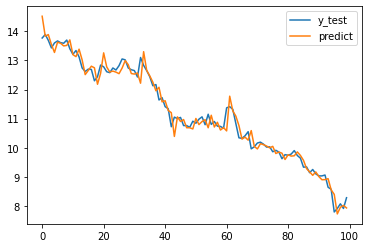

In [35]:
y_test_test = pd.DataFrame(y_test)
y_test_test.rename(columns={0: "y_test"}, inplace = True)
y_test_test['predict'] = lgbm_preds
y_test_test.plot()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_test,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_test,lgbm_preds))
print("r2_score is : ", r2_score(y_test,lgbm_preds))

mean_squared_error is :  0.0706580486035437
mean_absolute_error is :  0.19452531929016112
r2_score is :  0.9727860497871733


### Rolling with window 7

In [37]:
train_rolling_7 = train_save.rolling(window=7).mean()
train_rolling_7.dropna(inplace=True)
train_rolling_7.reset_index(inplace=True)
train_rolling_7.drop("index", axis=1,inplace=True)
train_rolling_7

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020011e+07,7.682857,7.972857,7.555714,7.812857,7.660000,0.152857,1.992057,602688.021429,469810.615714,7.938571
1,2.020011e+07,7.821429,8.084286,7.674286,7.938571,7.812857,0.125714,1.614186,609013.628571,480493.754143,8.114286
2,2.020011e+07,7.934286,8.257143,7.792857,8.114286,7.938571,0.175714,2.203543,680377.651429,549150.332143,8.357143
3,2.020011e+07,8.114286,8.475714,7.970000,8.357143,8.114286,0.242857,2.964686,738702.804286,613652.001000,8.560000
4,2.020011e+07,8.371429,8.727143,8.162857,8.560000,8.357143,0.202857,2.490529,797383.602857,676453.608000,8.697143
...,...,...,...,...,...,...,...,...,...,...,...
551,2.022042e+07,9.035714,9.108571,8.874286,8.954286,9.035714,-0.081429,-0.900157,139272.970000,124558.126000,8.745714
552,2.022042e+07,8.928571,8.982857,8.672857,8.745714,8.954286,-0.208571,-2.372300,161140.784286,139971.905286,8.575714
553,2.022042e+07,8.740000,8.834286,8.500000,8.575714,8.745714,-0.170000,-1.920586,196311.087143,166298.796571,8.438571
554,2.022042e+07,8.555714,8.692857,8.320000,8.438571,8.575714,-0.137143,-1.521729,221572.457143,184600.667429,8.278571


In [38]:
train_rolling_7 = setup_cv(train_rolling_7)

In [39]:
lgbm_models = train_1dcnn(train_rolling_7, 5)

Device used : cpu
epoch 0  | loss: 226.18953| val_0_mse: 3849096032.39262|  0:00:00s
epoch 1  | loss: 204.14799| val_0_mse: 2149946934.21923|  0:00:00s
epoch 2  | loss: 181.72137| val_0_mse: 222604143.49648|  0:00:00s
epoch 3  | loss: 162.19467| val_0_mse: 39212282.63576|  0:00:00s
epoch 4  | loss: 148.84123| val_0_mse: 1414.84331|  0:00:00s
epoch 5  | loss: 129.34901| val_0_mse: 1510.94643|  0:00:00s
epoch 6  | loss: 113.43327| val_0_mse: 1337.24765|  0:00:00s
epoch 7  | loss: 98.06303| val_0_mse: 33511346.52415|  0:00:00s
epoch 8  | loss: 84.69082| val_0_mse: 24800490.29725|  0:00:00s
epoch 9  | loss: 68.73859| val_0_mse: 227350670.86189|  0:00:00s
epoch 10 | loss: 57.40956| val_0_mse: 179984557.55266|  0:00:00s
epoch 11 | loss: 45.41201| val_0_mse: 64102413.33774|  0:00:00s
epoch 12 | loss: 35.74756| val_0_mse: 16519003.2099|  0:00:00s
epoch 13 | loss: 26.62734| val_0_mse: 130794184.90708|  0:00:00s
epoch 14 | loss: 18.94007| val_0_mse: 25306988.25439|  0:00:00s
epoch 15 | loss: 13.

epoch 131| loss: 0.23081 | val_0_mse: 75929.49681|  0:00:02s
epoch 132| loss: 0.17844 | val_0_mse: 70336.41308|  0:00:02s
epoch 133| loss: 0.16547 | val_0_mse: 67899.2497|  0:00:02s
epoch 134| loss: 0.18381 | val_0_mse: 67775.5104|  0:00:02s
epoch 135| loss: 0.11784 | val_0_mse: 68840.83882|  0:00:02s
epoch 136| loss: 0.1121  | val_0_mse: 68447.39849|  0:00:02s
epoch 137| loss: 0.24402 | val_0_mse: 66835.18064|  0:00:02s
epoch 138| loss: 0.13475 | val_0_mse: 63715.37217|  0:00:02s
epoch 139| loss: 0.13051 | val_0_mse: 61570.7481|  0:00:02s
epoch 140| loss: 0.25629 | val_0_mse: 60338.34112|  0:00:02s
epoch 141| loss: 0.17943 | val_0_mse: 60170.49168|  0:00:02s
epoch 142| loss: 0.07179 | val_0_mse: 54716.95404|  0:00:02s
epoch 143| loss: 0.21191 | val_0_mse: 49963.72099|  0:00:03s
epoch 144| loss: 0.0887  | val_0_mse: 52330.02154|  0:00:03s
epoch 145| loss: 0.12685 | val_0_mse: 47250.21748|  0:00:03s
epoch 146| loss: 0.15777 | val_0_mse: 37212.30919|  0:00:03s
epoch 147| loss: 0.26478 | 

epoch 268| loss: 0.10348 | val_0_mse: 5934.09554|  0:00:05s
epoch 269| loss: 0.15166 | val_0_mse: 5611.43737|  0:00:05s
epoch 270| loss: 0.12192 | val_0_mse: 5575.03984|  0:00:05s
epoch 271| loss: 0.13604 | val_0_mse: 5446.20449|  0:00:05s
epoch 272| loss: 0.07433 | val_0_mse: 5426.18551|  0:00:05s
epoch 273| loss: 0.07037 | val_0_mse: 5552.63846|  0:00:05s
epoch 274| loss: 0.05561 | val_0_mse: 5550.8352|  0:00:05s
epoch 275| loss: 0.14112 | val_0_mse: 5470.37731|  0:00:05s
epoch 276| loss: 0.07662 | val_0_mse: 5539.22542|  0:00:05s
epoch 277| loss: 0.06798 | val_0_mse: 4913.41655|  0:00:05s
epoch 278| loss: 0.06594 | val_0_mse: 4841.15239|  0:00:05s
epoch 279| loss: 0.07903 | val_0_mse: 4728.72816|  0:00:05s
epoch 280| loss: 0.04837 | val_0_mse: 4746.38009|  0:00:05s
epoch 281| loss: 0.07651 | val_0_mse: 4850.88672|  0:00:05s
epoch 282| loss: 0.07923 | val_0_mse: 4795.88895|  0:00:05s
epoch 283| loss: 0.13174 | val_0_mse: 4702.30923|  0:00:05s
epoch 284| loss: 0.11902 | val_0_mse: 448

epoch 407| loss: 0.07792 | val_0_mse: 109.517 |  0:00:08s
epoch 408| loss: 0.06453 | val_0_mse: 110.39222|  0:00:08s
epoch 409| loss: 0.11201 | val_0_mse: 105.98942|  0:00:08s
epoch 410| loss: 0.06607 | val_0_mse: 100.45857|  0:00:08s
epoch 411| loss: 0.0661  | val_0_mse: 101.76682|  0:00:08s
epoch 412| loss: 0.07567 | val_0_mse: 96.78675|  0:00:08s
epoch 413| loss: 0.03901 | val_0_mse: 94.34635|  0:00:08s
epoch 414| loss: 0.08341 | val_0_mse: 87.06461|  0:00:08s
epoch 415| loss: 0.07996 | val_0_mse: 66.87193|  0:00:09s
epoch 416| loss: 0.07584 | val_0_mse: 66.78273|  0:00:09s
epoch 417| loss: 0.05716 | val_0_mse: 58.36334|  0:00:09s
epoch 418| loss: 0.0424  | val_0_mse: 62.90565|  0:00:09s
epoch 419| loss: 0.06471 | val_0_mse: 64.65053|  0:00:09s
epoch 420| loss: 0.12481 | val_0_mse: 68.55093|  0:00:09s
epoch 421| loss: 0.09388 | val_0_mse: 67.54405|  0:00:09s
epoch 422| loss: 0.07384 | val_0_mse: 70.06205|  0:00:09s
epoch 423| loss: 0.06455 | val_0_mse: 69.43876|  0:00:09s
epoch 424|

epoch 550| loss: 0.0926  | val_0_mse: 76.96199|  0:00:11s
epoch 551| loss: 0.05523 | val_0_mse: 77.27955|  0:00:11s
epoch 552| loss: 0.06648 | val_0_mse: 75.6609 |  0:00:11s
epoch 553| loss: 0.05261 | val_0_mse: 74.46366|  0:00:11s
epoch 554| loss: 0.05015 | val_0_mse: 74.24621|  0:00:11s
epoch 555| loss: 0.05297 | val_0_mse: 72.65151|  0:00:11s
epoch 556| loss: 0.08827 | val_0_mse: 73.2235 |  0:00:11s
epoch 557| loss: 0.05047 | val_0_mse: 71.76324|  0:00:11s
epoch 558| loss: 0.05333 | val_0_mse: 72.27287|  0:00:11s
epoch 559| loss: 0.04008 | val_0_mse: 70.67447|  0:00:11s
epoch 560| loss: 0.04235 | val_0_mse: 68.43795|  0:00:11s
epoch 561| loss: 0.06602 | val_0_mse: 67.55513|  0:00:11s
epoch 562| loss: 0.04369 | val_0_mse: 66.68404|  0:00:11s
epoch 563| loss: 0.07066 | val_0_mse: 67.33244|  0:00:11s
epoch 564| loss: 0.04267 | val_0_mse: 67.12227|  0:00:12s
epoch 565| loss: 0.08804 | val_0_mse: 63.34904|  0:00:12s
epoch 566| loss: 0.07934 | val_0_mse: 57.84119|  0:00:12s
epoch 567| los

epoch 695| loss: 0.06825 | val_0_mse: 4.457   |  0:00:15s
epoch 696| loss: 0.05304 | val_0_mse: 4.68381 |  0:00:15s
epoch 697| loss: 0.03358 | val_0_mse: 4.94949 |  0:00:15s
epoch 698| loss: 0.07828 | val_0_mse: 4.64321 |  0:00:15s
epoch 699| loss: 0.03336 | val_0_mse: 4.50089 |  0:00:15s
epoch 700| loss: 0.03001 | val_0_mse: 4.54375 |  0:00:15s
epoch 701| loss: 0.04469 | val_0_mse: 4.50242 |  0:00:15s
epoch 702| loss: 0.03129 | val_0_mse: 4.56171 |  0:00:15s
epoch 703| loss: 0.02369 | val_0_mse: 4.45135 |  0:00:15s
epoch 704| loss: 0.04156 | val_0_mse: 4.86867 |  0:00:15s
epoch 705| loss: 0.03284 | val_0_mse: 4.70157 |  0:00:15s
epoch 706| loss: 0.02362 | val_0_mse: 4.50714 |  0:00:15s
epoch 707| loss: 0.03359 | val_0_mse: 5.08141 |  0:00:15s
epoch 708| loss: 0.05666 | val_0_mse: 5.10123 |  0:00:15s
epoch 709| loss: 0.02728 | val_0_mse: 4.74155 |  0:00:15s
epoch 710| loss: 0.02456 | val_0_mse: 4.79409 |  0:00:15s
epoch 711| loss: 0.02949 | val_0_mse: 5.07804 |  0:00:15s
epoch 712| los

epoch 837| loss: 0.07374 | val_0_mse: 0.07743 |  0:00:18s
epoch 838| loss: 0.03743 | val_0_mse: 0.09769 |  0:00:18s
epoch 839| loss: 0.07125 | val_0_mse: 0.14663 |  0:00:18s
epoch 840| loss: 0.08441 | val_0_mse: 0.10798 |  0:00:18s
epoch 841| loss: 0.03937 | val_0_mse: 0.08876 |  0:00:18s
epoch 842| loss: 0.05004 | val_0_mse: 0.09433 |  0:00:18s
epoch 843| loss: 0.06474 | val_0_mse: 0.0812  |  0:00:18s
epoch 844| loss: 0.0571  | val_0_mse: 0.12347 |  0:00:18s
epoch 845| loss: 0.04457 | val_0_mse: 0.14004 |  0:00:18s
epoch 846| loss: 0.04556 | val_0_mse: 0.09602 |  0:00:18s
epoch 847| loss: 0.02584 | val_0_mse: 0.08792 |  0:00:18s
epoch 848| loss: 0.04814 | val_0_mse: 0.10166 |  0:00:18s
epoch 849| loss: 0.04011 | val_0_mse: 0.16446 |  0:00:18s
epoch 850| loss: 0.04922 | val_0_mse: 0.18592 |  0:00:18s
epoch 851| loss: 0.05012 | val_0_mse: 0.13102 |  0:00:18s
epoch 852| loss: 0.03532 | val_0_mse: 0.11258 |  0:00:18s
epoch 853| loss: 0.06721 | val_0_mse: 0.11768 |  0:00:18s
epoch 854| los

epoch 984| loss: 0.07864 | val_0_mse: 0.08114 |  0:00:21s
epoch 985| loss: 0.14977 | val_0_mse: 0.09461 |  0:00:21s
epoch 986| loss: 0.11394 | val_0_mse: 0.13358 |  0:00:21s
epoch 987| loss: 0.05496 | val_0_mse: 0.13378 |  0:00:21s
epoch 988| loss: 0.0609  | val_0_mse: 0.12256 |  0:00:21s
epoch 989| loss: 0.09366 | val_0_mse: 0.12111 |  0:00:21s
epoch 990| loss: 0.0772  | val_0_mse: 0.09224 |  0:00:21s
epoch 991| loss: 0.0774  | val_0_mse: 0.069   |  0:00:21s
epoch 992| loss: 0.03981 | val_0_mse: 0.12851 |  0:00:21s
epoch 993| loss: 0.06162 | val_0_mse: 0.17336 |  0:00:21s
epoch 994| loss: 0.08464 | val_0_mse: 0.13568 |  0:00:21s
epoch 995| loss: 0.05937 | val_0_mse: 0.07527 |  0:00:21s
epoch 996| loss: 0.05703 | val_0_mse: 0.08468 |  0:00:21s
epoch 997| loss: 0.06034 | val_0_mse: 0.09333 |  0:00:21s
epoch 998| loss: 0.05485 | val_0_mse: 0.09485 |  0:00:21s
epoch 999| loss: 0.06162 | val_0_mse: 0.11296 |  0:00:21s
epoch 1000| loss: 0.05009 | val_0_mse: 0.09546 |  0:00:21s
epoch 1001| l

epoch 1126| loss: 0.03174 | val_0_mse: 0.06406 |  0:00:24s
epoch 1127| loss: 0.02304 | val_0_mse: 0.07917 |  0:00:24s
epoch 1128| loss: 0.03609 | val_0_mse: 0.08236 |  0:00:24s
epoch 1129| loss: 0.04308 | val_0_mse: 0.06807 |  0:00:24s
epoch 1130| loss: 0.04225 | val_0_mse: 0.06716 |  0:00:24s
epoch 1131| loss: 0.04412 | val_0_mse: 0.09061 |  0:00:24s
epoch 1132| loss: 0.03727 | val_0_mse: 0.09646 |  0:00:24s
epoch 1133| loss: 0.0377  | val_0_mse: 0.06747 |  0:00:24s
epoch 1134| loss: 0.03261 | val_0_mse: 0.07169 |  0:00:24s
epoch 1135| loss: 0.07361 | val_0_mse: 0.0695  |  0:00:24s
epoch 1136| loss: 0.05245 | val_0_mse: 0.11861 |  0:00:24s
epoch 1137| loss: 0.04828 | val_0_mse: 0.14099 |  0:00:24s
epoch 1138| loss: 0.05143 | val_0_mse: 0.09361 |  0:00:24s
epoch 1139| loss: 0.01985 | val_0_mse: 0.07395 |  0:00:24s
epoch 1140| loss: 0.06728 | val_0_mse: 0.07156 |  0:00:24s
epoch 1141| loss: 0.05489 | val_0_mse: 0.0787  |  0:00:24s
epoch 1142| loss: 0.03379 | val_0_mse: 0.1033  |  0:00:2

epoch 1267| loss: 0.03339 | val_0_mse: 0.09342 |  0:00:26s
epoch 1268| loss: 0.05514 | val_0_mse: 0.05804 |  0:00:26s
epoch 1269| loss: 0.02573 | val_0_mse: 0.05789 |  0:00:26s
epoch 1270| loss: 0.02161 | val_0_mse: 0.07771 |  0:00:26s
epoch 1271| loss: 0.03472 | val_0_mse: 0.07052 |  0:00:27s
epoch 1272| loss: 0.04298 | val_0_mse: 0.05704 |  0:00:27s
epoch 1273| loss: 0.03994 | val_0_mse: 0.05919 |  0:00:27s
epoch 1274| loss: 0.04069 | val_0_mse: 0.05263 |  0:00:27s
epoch 1275| loss: 0.02205 | val_0_mse: 0.06024 |  0:00:27s
epoch 1276| loss: 0.03573 | val_0_mse: 0.0534  |  0:00:27s
epoch 1277| loss: 0.01851 | val_0_mse: 0.05169 |  0:00:27s
epoch 1278| loss: 0.02248 | val_0_mse: 0.06855 |  0:00:27s
epoch 1279| loss: 0.02723 | val_0_mse: 0.07274 |  0:00:27s
epoch 1280| loss: 0.02243 | val_0_mse: 0.06254 |  0:00:27s
epoch 1281| loss: 0.01991 | val_0_mse: 0.06232 |  0:00:27s
epoch 1282| loss: 0.02172 | val_0_mse: 0.06073 |  0:00:27s
epoch 1283| loss: 0.01791 | val_0_mse: 0.06453 |  0:00:2

epoch 1407| loss: 0.02508 | val_0_mse: 0.05086 |  0:00:29s
epoch 1408| loss: 0.03139 | val_0_mse: 0.08493 |  0:00:29s
epoch 1409| loss: 0.04741 | val_0_mse: 0.09305 |  0:00:29s
epoch 1410| loss: 0.05555 | val_0_mse: 0.06566 |  0:00:29s
epoch 1411| loss: 0.02213 | val_0_mse: 0.06685 |  0:00:29s
epoch 1412| loss: 0.08397 | val_0_mse: 0.07335 |  0:00:29s
epoch 1413| loss: 0.06469 | val_0_mse: 0.0595  |  0:00:29s
epoch 1414| loss: 0.03513 | val_0_mse: 0.10332 |  0:00:29s
epoch 1415| loss: 0.0891  | val_0_mse: 0.12506 |  0:00:29s
epoch 1416| loss: 0.10768 | val_0_mse: 0.0879  |  0:00:29s
epoch 1417| loss: 0.05746 | val_0_mse: 0.06285 |  0:00:29s
epoch 1418| loss: 0.0274  | val_0_mse: 0.07222 |  0:00:29s
epoch 1419| loss: 0.05074 | val_0_mse: 0.05923 |  0:00:29s
epoch 1420| loss: 0.02746 | val_0_mse: 0.09476 |  0:00:29s
epoch 1421| loss: 0.05651 | val_0_mse: 0.11465 |  0:00:29s
epoch 1422| loss: 0.08397 | val_0_mse: 0.08509 |  0:00:29s
epoch 1423| loss: 0.03407 | val_0_mse: 0.07929 |  0:00:2

epoch 1550| loss: 0.02189 | val_0_mse: 0.07061 |  0:00:32s
epoch 1551| loss: 0.03173 | val_0_mse: 0.06442 |  0:00:32s
epoch 1552| loss: 0.04229 | val_0_mse: 0.05132 |  0:00:32s
epoch 1553| loss: 0.02304 | val_0_mse: 0.05988 |  0:00:32s
epoch 1554| loss: 0.02138 | val_0_mse: 0.09703 |  0:00:32s
epoch 1555| loss: 0.06472 | val_0_mse: 0.15672 |  0:00:32s
epoch 1556| loss: 0.07262 | val_0_mse: 0.1374  |  0:00:32s
epoch 1557| loss: 0.03548 | val_0_mse: 0.07861 |  0:00:32s
epoch 1558| loss: 0.02653 | val_0_mse: 0.09432 |  0:00:32s
epoch 1559| loss: 0.02667 | val_0_mse: 0.17612 |  0:00:32s
epoch 1560| loss: 0.02534 | val_0_mse: 0.15166 |  0:00:32s
epoch 1561| loss: 0.02283 | val_0_mse: 0.12779 |  0:00:32s
epoch 1562| loss: 0.01993 | val_0_mse: 0.10935 |  0:00:32s
epoch 1563| loss: 0.02456 | val_0_mse: 0.13519 |  0:00:32s
epoch 1564| loss: 0.02219 | val_0_mse: 0.16723 |  0:00:32s
epoch 1565| loss: 0.03915 | val_0_mse: 0.12187 |  0:00:32s
epoch 1566| loss: 0.03162 | val_0_mse: 0.06088 |  0:00:3

epoch 1692| loss: 0.04938 | val_0_mse: 0.05928 |  0:00:35s
epoch 1693| loss: 0.07087 | val_0_mse: 0.0494  |  0:00:35s
epoch 1694| loss: 0.03125 | val_0_mse: 0.08599 |  0:00:35s
epoch 1695| loss: 0.04117 | val_0_mse: 0.106   |  0:00:35s
epoch 1696| loss: 0.07263 | val_0_mse: 0.0743  |  0:00:35s
epoch 1697| loss: 0.02797 | val_0_mse: 0.05212 |  0:00:35s
epoch 1698| loss: 0.0383  | val_0_mse: 0.06316 |  0:00:35s
epoch 1699| loss: 0.08355 | val_0_mse: 0.0504  |  0:00:35s
epoch 1700| loss: 0.05321 | val_0_mse: 0.07915 |  0:00:35s
epoch 1701| loss: 0.03857 | val_0_mse: 0.10407 |  0:00:35s
epoch 1702| loss: 0.06708 | val_0_mse: 0.0702  |  0:00:35s
epoch 1703| loss: 0.02623 | val_0_mse: 0.05542 |  0:00:35s
epoch 1704| loss: 0.04693 | val_0_mse: 0.07025 |  0:00:35s
epoch 1705| loss: 0.10657 | val_0_mse: 0.05388 |  0:00:35s
epoch 1706| loss: 0.04944 | val_0_mse: 0.07348 |  0:00:35s
epoch 1707| loss: 0.03139 | val_0_mse: 0.09605 |  0:00:35s
epoch 1708| loss: 0.05401 | val_0_mse: 0.06829 |  0:00:3

epoch 1835| loss: 0.05189 | val_0_mse: 0.11315 |  0:00:37s
epoch 1836| loss: 0.07473 | val_0_mse: 0.07497 |  0:00:38s
epoch 1837| loss: 0.03323 | val_0_mse: 0.06004 |  0:00:38s
epoch 1838| loss: 0.0569  | val_0_mse: 0.06627 |  0:00:38s
epoch 1839| loss: 0.05818 | val_0_mse: 0.07134 |  0:00:38s
epoch 1840| loss: 0.02842 | val_0_mse: 0.13091 |  0:00:38s
epoch 1841| loss: 0.05095 | val_0_mse: 0.14998 |  0:00:38s
epoch 1842| loss: 0.08279 | val_0_mse: 0.10052 |  0:00:38s
epoch 1843| loss: 0.03218 | val_0_mse: 0.06389 |  0:00:38s
epoch 1844| loss: 0.03606 | val_0_mse: 0.06729 |  0:00:38s
epoch 1845| loss: 0.0628  | val_0_mse: 0.06136 |  0:00:38s
epoch 1846| loss: 0.03074 | val_0_mse: 0.11329 |  0:00:38s
epoch 1847| loss: 0.03775 | val_0_mse: 0.14096 |  0:00:38s
epoch 1848| loss: 0.0658  | val_0_mse: 0.1012  |  0:00:38s
epoch 1849| loss: 0.0375  | val_0_mse: 0.0668  |  0:00:38s
epoch 1850| loss: 0.03702 | val_0_mse: 0.07521 |  0:00:38s
epoch 1851| loss: 0.06239 | val_0_mse: 0.06503 |  0:00:3

epoch 1979| loss: 0.02987 | val_0_mse: 0.07821 |  0:00:40s
epoch 1980| loss: 0.02439 | val_0_mse: 0.05485 |  0:00:40s
epoch 1981| loss: 0.01916 | val_0_mse: 0.05158 |  0:00:40s
epoch 1982| loss: 0.02531 | val_0_mse: 0.07264 |  0:00:40s
epoch 1983| loss: 0.03423 | val_0_mse: 0.07206 |  0:00:40s
epoch 1984| loss: 0.02733 | val_0_mse: 0.0553  |  0:00:40s
epoch 1985| loss: 0.02542 | val_0_mse: 0.05669 |  0:00:40s
epoch 1986| loss: 0.0224  | val_0_mse: 0.07414 |  0:00:40s
epoch 1987| loss: 0.03007 | val_0_mse: 0.06646 |  0:00:40s
epoch 1988| loss: 0.02843 | val_0_mse: 0.0471  |  0:00:40s
epoch 1989| loss: 0.02131 | val_0_mse: 0.04674 |  0:00:40s
epoch 1990| loss: 0.03299 | val_0_mse: 0.06964 |  0:00:40s
epoch 1991| loss: 0.02938 | val_0_mse: 0.07619 |  0:00:40s
epoch 1992| loss: 0.02691 | val_0_mse: 0.04916 |  0:00:41s
epoch 1993| loss: 0.02101 | val_0_mse: 0.04399 |  0:00:41s
epoch 1994| loss: 0.01852 | val_0_mse: 0.0496  |  0:00:41s
epoch 1995| loss: 0.0262  | val_0_mse: 0.04571 |  0:00:4

epoch 114| loss: 0.1681  | val_0_mse: 12930.14956|  0:00:02s
epoch 115| loss: 0.14567 | val_0_mse: 13760.39648|  0:00:02s
epoch 116| loss: 0.16444 | val_0_mse: 14896.49354|  0:00:02s
epoch 117| loss: 0.17119 | val_0_mse: 16346.38109|  0:00:02s
epoch 118| loss: 0.1723  | val_0_mse: 15781.46095|  0:00:02s
epoch 119| loss: 0.10002 | val_0_mse: 14204.48552|  0:00:02s
epoch 120| loss: 0.15619 | val_0_mse: 12511.15589|  0:00:02s
epoch 121| loss: 0.23014 | val_0_mse: 11569.76747|  0:00:02s
epoch 122| loss: 0.16672 | val_0_mse: 11187.77275|  0:00:02s
epoch 123| loss: 0.20225 | val_0_mse: 9755.58908|  0:00:02s
epoch 124| loss: 0.15674 | val_0_mse: 7104.3197|  0:00:02s
epoch 125| loss: 0.21906 | val_0_mse: 5861.66298|  0:00:02s
epoch 126| loss: 0.14438 | val_0_mse: 6096.90513|  0:00:02s
epoch 127| loss: 0.21486 | val_0_mse: 7807.90181|  0:00:02s
epoch 128| loss: 0.16438 | val_0_mse: 8506.67998|  0:00:02s
epoch 129| loss: 0.24633 | val_0_mse: 7956.0255|  0:00:02s
epoch 130| loss: 0.13022 | val_0_

epoch 262| loss: 0.08436 | val_0_mse: 31.36924|  0:00:05s
epoch 263| loss: 0.06336 | val_0_mse: 31.18981|  0:00:05s
epoch 264| loss: 0.07395 | val_0_mse: 29.23331|  0:00:05s
epoch 265| loss: 0.09533 | val_0_mse: 28.77503|  0:00:05s
epoch 266| loss: 0.09504 | val_0_mse: 30.73804|  0:00:05s
epoch 267| loss: 0.07831 | val_0_mse: 30.37321|  0:00:05s
epoch 268| loss: 0.08988 | val_0_mse: 25.94029|  0:00:05s
epoch 269| loss: 0.06103 | val_0_mse: 24.14409|  0:00:05s
epoch 270| loss: 0.10644 | val_0_mse: 21.72338|  0:00:05s
epoch 271| loss: 0.1085  | val_0_mse: 20.66245|  0:00:05s
epoch 272| loss: 0.06651 | val_0_mse: 19.98256|  0:00:05s
epoch 273| loss: 0.0883  | val_0_mse: 17.68798|  0:00:05s
epoch 274| loss: 0.0728  | val_0_mse: 14.59085|  0:00:05s
epoch 275| loss: 0.15771 | val_0_mse: 13.05232|  0:00:05s
epoch 276| loss: 0.23206 | val_0_mse: 12.30975|  0:00:05s
epoch 277| loss: 0.10209 | val_0_mse: 12.98599|  0:00:05s
epoch 278| loss: 0.1493  | val_0_mse: 12.09073|  0:00:05s
epoch 279| los

epoch 411| loss: 0.08997 | val_0_mse: 5.94693 |  0:00:08s
epoch 412| loss: 0.08418 | val_0_mse: 5.67255 |  0:00:08s
epoch 413| loss: 0.15746 | val_0_mse: 5.46584 |  0:00:08s
epoch 414| loss: 0.22213 | val_0_mse: 5.17225 |  0:00:08s
epoch 415| loss: 0.11008 | val_0_mse: 5.23226 |  0:00:08s
epoch 416| loss: 0.18286 | val_0_mse: 5.48332 |  0:00:08s
epoch 417| loss: 0.19111 | val_0_mse: 5.82465 |  0:00:08s
epoch 418| loss: 0.08888 | val_0_mse: 6.69459 |  0:00:08s
epoch 419| loss: 0.2093  | val_0_mse: 6.99873 |  0:00:08s
epoch 420| loss: 0.21684 | val_0_mse: 6.91068 |  0:00:08s
epoch 421| loss: 0.15246 | val_0_mse: 6.43097 |  0:00:08s
epoch 422| loss: 0.06023 | val_0_mse: 6.04809 |  0:00:08s
epoch 423| loss: 0.09425 | val_0_mse: 6.06416 |  0:00:08s
epoch 424| loss: 0.08676 | val_0_mse: 6.3366  |  0:00:08s
epoch 425| loss: 0.14234 | val_0_mse: 6.42455 |  0:00:08s
epoch 426| loss: 0.18193 | val_0_mse: 6.13922 |  0:00:08s
epoch 427| loss: 0.11348 | val_0_mse: 5.75984 |  0:00:08s
epoch 428| los

epoch 562| loss: 0.1259  | val_0_mse: 3.89948 |  0:00:11s
epoch 563| loss: 0.1681  | val_0_mse: 3.62612 |  0:00:11s
epoch 564| loss: 0.13717 | val_0_mse: 3.53612 |  0:00:11s
epoch 565| loss: 0.11733 | val_0_mse: 3.69762 |  0:00:11s
epoch 566| loss: 0.08686 | val_0_mse: 3.87129 |  0:00:11s
epoch 567| loss: 0.08243 | val_0_mse: 3.93073 |  0:00:11s
epoch 568| loss: 0.11024 | val_0_mse: 3.87203 |  0:00:11s
epoch 569| loss: 0.10035 | val_0_mse: 3.70584 |  0:00:11s
epoch 570| loss: 0.07116 | val_0_mse: 3.54319 |  0:00:11s
epoch 571| loss: 0.1127  | val_0_mse: 3.57012 |  0:00:11s
epoch 572| loss: 0.14688 | val_0_mse: 3.69666 |  0:00:11s
epoch 573| loss: 0.12214 | val_0_mse: 3.89377 |  0:00:11s
epoch 574| loss: 0.04765 | val_0_mse: 3.92557 |  0:00:11s
epoch 575| loss: 0.08584 | val_0_mse: 3.76543 |  0:00:11s
epoch 576| loss: 0.04387 | val_0_mse: 3.58151 |  0:00:11s
epoch 577| loss: 0.12148 | val_0_mse: 3.52906 |  0:00:11s
epoch 578| loss: 0.15716 | val_0_mse: 3.59731 |  0:00:11s
epoch 579| los

epoch 711| loss: 0.04819 | val_0_mse: 1.33689 |  0:00:14s
epoch 712| loss: 0.06617 | val_0_mse: 1.47238 |  0:00:14s
epoch 713| loss: 0.06804 | val_0_mse: 1.52829 |  0:00:14s
epoch 714| loss: 0.07158 | val_0_mse: 1.42789 |  0:00:14s
epoch 715| loss: 0.07868 | val_0_mse: 1.30871 |  0:00:14s
epoch 716| loss: 0.07561 | val_0_mse: 1.18585 |  0:00:14s
epoch 717| loss: 0.06961 | val_0_mse: 1.2146  |  0:00:14s
epoch 718| loss: 0.0489  | val_0_mse: 1.28243 |  0:00:14s
epoch 719| loss: 0.05158 | val_0_mse: 1.25863 |  0:00:14s
epoch 720| loss: 0.07345 | val_0_mse: 1.16914 |  0:00:14s
epoch 721| loss: 0.04472 | val_0_mse: 1.07779 |  0:00:14s
epoch 722| loss: 0.06777 | val_0_mse: 1.06704 |  0:00:14s
epoch 723| loss: 0.04053 | val_0_mse: 1.09148 |  0:00:14s
epoch 724| loss: 0.03886 | val_0_mse: 1.06737 |  0:00:14s
epoch 725| loss: 0.05218 | val_0_mse: 0.97642 |  0:00:15s
epoch 726| loss: 0.05043 | val_0_mse: 0.948   |  0:00:15s
epoch 727| loss: 0.05147 | val_0_mse: 0.95732 |  0:00:15s
epoch 728| los

epoch 858| loss: 0.08688 | val_0_mse: 0.07908 |  0:00:17s
epoch 859| loss: 0.09605 | val_0_mse: 0.14086 |  0:00:17s
epoch 860| loss: 0.10576 | val_0_mse: 0.1448  |  0:00:17s
epoch 861| loss: 0.12674 | val_0_mse: 0.11592 |  0:00:17s
epoch 862| loss: 0.08278 | val_0_mse: 0.10682 |  0:00:17s
epoch 863| loss: 0.08198 | val_0_mse: 0.0785  |  0:00:17s
epoch 864| loss: 0.0709  | val_0_mse: 0.09993 |  0:00:17s
epoch 865| loss: 0.08547 | val_0_mse: 0.15856 |  0:00:17s
epoch 866| loss: 0.09516 | val_0_mse: 0.18609 |  0:00:17s
epoch 867| loss: 0.09552 | val_0_mse: 0.167   |  0:00:17s
epoch 868| loss: 0.08337 | val_0_mse: 0.10532 |  0:00:17s
epoch 869| loss: 0.10512 | val_0_mse: 0.07111 |  0:00:18s
epoch 870| loss: 0.0711  | val_0_mse: 0.09193 |  0:00:18s
epoch 871| loss: 0.0703  | val_0_mse: 0.14378 |  0:00:18s
epoch 872| loss: 0.0661  | val_0_mse: 0.176   |  0:00:18s
epoch 873| loss: 0.09509 | val_0_mse: 0.19534 |  0:00:18s
epoch 874| loss: 0.05353 | val_0_mse: 0.14863 |  0:00:18s
epoch 875| los

epoch 1004| loss: 0.08749 | val_0_mse: 0.04213 |  0:00:20s
epoch 1005| loss: 0.10035 | val_0_mse: 0.09192 |  0:00:20s
epoch 1006| loss: 0.08404 | val_0_mse: 0.11981 |  0:00:20s
epoch 1007| loss: 0.09735 | val_0_mse: 0.08483 |  0:00:20s
epoch 1008| loss: 0.05339 | val_0_mse: 0.03641 |  0:00:20s
epoch 1009| loss: 0.09186 | val_0_mse: 0.04087 |  0:00:20s
epoch 1010| loss: 0.12594 | val_0_mse: 0.03599 |  0:00:20s
epoch 1011| loss: 0.06099 | val_0_mse: 0.06332 |  0:00:20s
epoch 1012| loss: 0.0508  | val_0_mse: 0.07234 |  0:00:20s
epoch 1013| loss: 0.06549 | val_0_mse: 0.0445  |  0:00:21s
epoch 1014| loss: 0.03563 | val_0_mse: 0.03481 |  0:00:21s
epoch 1015| loss: 0.05901 | val_0_mse: 0.04076 |  0:00:21s
epoch 1016| loss: 0.06551 | val_0_mse: 0.07889 |  0:00:21s
epoch 1017| loss: 0.0661  | val_0_mse: 0.06654 |  0:00:21s
epoch 1018| loss: 0.05668 | val_0_mse: 0.03722 |  0:00:21s
epoch 1019| loss: 0.04574 | val_0_mse: 0.03493 |  0:00:21s
epoch 1020| loss: 0.05154 | val_0_mse: 0.05973 |  0:00:2

epoch 1144| loss: 0.07831 | val_0_mse: 0.03452 |  0:00:23s
epoch 1145| loss: 0.03658 | val_0_mse: 0.11737 |  0:00:23s
epoch 1146| loss: 0.09594 | val_0_mse: 0.15643 |  0:00:23s
epoch 1147| loss: 0.13209 | val_0_mse: 0.10497 |  0:00:23s
epoch 1148| loss: 0.0734  | val_0_mse: 0.03575 |  0:00:23s
epoch 1149| loss: 0.03064 | val_0_mse: 0.03208 |  0:00:23s
epoch 1150| loss: 0.05993 | val_0_mse: 0.04446 |  0:00:23s
epoch 1151| loss: 0.03559 | val_0_mse: 0.06346 |  0:00:23s
epoch 1152| loss: 0.03542 | val_0_mse: 0.04055 |  0:00:23s
epoch 1153| loss: 0.07154 | val_0_mse: 0.0318  |  0:00:23s
epoch 1154| loss: 0.05305 | val_0_mse: 0.03357 |  0:00:23s
epoch 1155| loss: 0.05032 | val_0_mse: 0.04105 |  0:00:23s
epoch 1156| loss: 0.02658 | val_0_mse: 0.05341 |  0:00:23s
epoch 1157| loss: 0.05325 | val_0_mse: 0.03558 |  0:00:23s
epoch 1158| loss: 0.04213 | val_0_mse: 0.02701 |  0:00:23s
epoch 1159| loss: 0.05584 | val_0_mse: 0.02938 |  0:00:23s
epoch 1160| loss: 0.05434 | val_0_mse: 0.03881 |  0:00:2

epoch 1284| loss: 0.0539  | val_0_mse: 0.03431 |  0:00:26s
epoch 1285| loss: 0.02745 | val_0_mse: 0.02398 |  0:00:26s
epoch 1286| loss: 0.07189 | val_0_mse: 0.02641 |  0:00:26s
epoch 1287| loss: 0.06871 | val_0_mse: 0.03928 |  0:00:26s
epoch 1288| loss: 0.03094 | val_0_mse: 0.07654 |  0:00:26s
epoch 1289| loss: 0.08712 | val_0_mse: 0.08627 |  0:00:26s
epoch 1290| loss: 0.13255 | val_0_mse: 0.059   |  0:00:26s
epoch 1291| loss: 0.07059 | val_0_mse: 0.03729 |  0:00:26s
epoch 1292| loss: 0.04245 | val_0_mse: 0.02665 |  0:00:26s
epoch 1293| loss: 0.07051 | val_0_mse: 0.03564 |  0:00:26s
epoch 1294| loss: 0.05228 | val_0_mse: 0.05686 |  0:00:26s
epoch 1295| loss: 0.04016 | val_0_mse: 0.03619 |  0:00:26s
epoch 1296| loss: 0.04579 | val_0_mse: 0.02546 |  0:00:26s
epoch 1297| loss: 0.04162 | val_0_mse: 0.0285  |  0:00:26s
epoch 1298| loss: 0.02602 | val_0_mse: 0.06403 |  0:00:26s
epoch 1299| loss: 0.04921 | val_0_mse: 0.0512  |  0:00:26s
epoch 1300| loss: 0.04294 | val_0_mse: 0.0227  |  0:00:2

epoch 1427| loss: 0.08048 | val_0_mse: 0.02718 |  0:00:29s
epoch 1428| loss: 0.03312 | val_0_mse: 0.06661 |  0:00:29s
epoch 1429| loss: 0.05386 | val_0_mse: 0.09143 |  0:00:29s
epoch 1430| loss: 0.08259 | val_0_mse: 0.05608 |  0:00:29s
epoch 1431| loss: 0.04821 | val_0_mse: 0.02613 |  0:00:29s
epoch 1432| loss: 0.03612 | val_0_mse: 0.03188 |  0:00:29s
epoch 1433| loss: 0.07272 | val_0_mse: 0.02468 |  0:00:29s
epoch 1434| loss: 0.03101 | val_0_mse: 0.057   |  0:00:29s
epoch 1435| loss: 0.04952 | val_0_mse: 0.08085 |  0:00:29s
epoch 1436| loss: 0.0731  | val_0_mse: 0.04947 |  0:00:29s
epoch 1437| loss: 0.03336 | val_0_mse: 0.02347 |  0:00:29s
epoch 1438| loss: 0.04671 | val_0_mse: 0.03289 |  0:00:29s
epoch 1439| loss: 0.07032 | val_0_mse: 0.02205 |  0:00:29s
epoch 1440| loss: 0.03125 | val_0_mse: 0.04976 |  0:00:29s
epoch 1441| loss: 0.03556 | val_0_mse: 0.07011 |  0:00:29s
epoch 1442| loss: 0.05745 | val_0_mse: 0.0421  |  0:00:29s
epoch 1443| loss: 0.04026 | val_0_mse: 0.03059 |  0:00:2

epoch 1569| loss: 0.03394 | val_0_mse: 0.02254 |  0:00:32s
epoch 1570| loss: 0.03581 | val_0_mse: 0.02389 |  0:00:32s
epoch 1571| loss: 0.03009 | val_0_mse: 0.03124 |  0:00:32s
epoch 1572| loss: 0.04293 | val_0_mse: 0.02579 |  0:00:32s
epoch 1573| loss: 0.02093 | val_0_mse: 0.02081 |  0:00:32s
epoch 1574| loss: 0.03198 | val_0_mse: 0.02419 |  0:00:32s
epoch 1575| loss: 0.02346 | val_0_mse: 0.04881 |  0:00:32s
epoch 1576| loss: 0.02874 | val_0_mse: 0.04153 |  0:00:32s
epoch 1577| loss: 0.02527 | val_0_mse: 0.03227 |  0:00:32s
epoch 1578| loss: 0.03414 | val_0_mse: 0.03292 |  0:00:32s
epoch 1579| loss: 0.04918 | val_0_mse: 0.04842 |  0:00:32s
epoch 1580| loss: 0.04187 | val_0_mse: 0.06482 |  0:00:32s
epoch 1581| loss: 0.03975 | val_0_mse: 0.03493 |  0:00:32s
epoch 1582| loss: 0.03364 | val_0_mse: 0.02444 |  0:00:32s
epoch 1583| loss: 0.02068 | val_0_mse: 0.03661 |  0:00:32s
epoch 1584| loss: 0.02891 | val_0_mse: 0.02804 |  0:00:32s
epoch 1585| loss: 0.02949 | val_0_mse: 0.03425 |  0:00:3

epoch 1711| loss: 0.02137 | val_0_mse: 0.02623 |  0:00:34s
epoch 1712| loss: 0.02151 | val_0_mse: 0.03091 |  0:00:34s
epoch 1713| loss: 0.02443 | val_0_mse: 0.04312 |  0:00:34s
epoch 1714| loss: 0.0221  | val_0_mse: 0.02756 |  0:00:34s
epoch 1715| loss: 0.02584 | val_0_mse: 0.02831 |  0:00:34s
epoch 1716| loss: 0.02918 | val_0_mse: 0.02744 |  0:00:34s
epoch 1717| loss: 0.02537 | val_0_mse: 0.03566 |  0:00:34s
epoch 1718| loss: 0.04067 | val_0_mse: 0.02828 |  0:00:34s
epoch 1719| loss: 0.03039 | val_0_mse: 0.02395 |  0:00:34s
epoch 1720| loss: 0.02954 | val_0_mse: 0.0385  |  0:00:34s
epoch 1721| loss: 0.02235 | val_0_mse: 0.03196 |  0:00:34s
epoch 1722| loss: 0.02263 | val_0_mse: 0.02563 |  0:00:35s
epoch 1723| loss: 0.03576 | val_0_mse: 0.0241  |  0:00:35s
epoch 1724| loss: 0.02428 | val_0_mse: 0.0371  |  0:00:35s
epoch 1725| loss: 0.03315 | val_0_mse: 0.04051 |  0:00:35s
epoch 1726| loss: 0.03747 | val_0_mse: 0.02664 |  0:00:35s
epoch 1727| loss: 0.02477 | val_0_mse: 0.02322 |  0:00:3

epoch 1854| loss: 0.04371 | val_0_mse: 0.02851 |  0:00:37s
epoch 1855| loss: 0.02327 | val_0_mse: 0.02458 |  0:00:37s
epoch 1856| loss: 0.0347  | val_0_mse: 0.03069 |  0:00:37s
epoch 1857| loss: 0.03968 | val_0_mse: 0.04004 |  0:00:37s
epoch 1858| loss: 0.03293 | val_0_mse: 0.03836 |  0:00:37s
epoch 1859| loss: 0.04418 | val_0_mse: 0.02195 |  0:00:37s
epoch 1860| loss: 0.01806 | val_0_mse: 0.03211 |  0:00:37s
epoch 1861| loss: 0.02857 | val_0_mse: 0.02652 |  0:00:37s
epoch 1862| loss: 0.02893 | val_0_mse: 0.03709 |  0:00:37s
epoch 1863| loss: 0.05993 | val_0_mse: 0.03286 |  0:00:37s
epoch 1864| loss: 0.03235 | val_0_mse: 0.04159 |  0:00:37s
epoch 1865| loss: 0.03247 | val_0_mse: 0.03402 |  0:00:37s
epoch 1866| loss: 0.03717 | val_0_mse: 0.02711 |  0:00:37s
epoch 1867| loss: 0.01955 | val_0_mse: 0.03917 |  0:00:37s
epoch 1868| loss: 0.04162 | val_0_mse: 0.03301 |  0:00:37s
epoch 1869| loss: 0.02589 | val_0_mse: 0.02757 |  0:00:37s
epoch 1870| loss: 0.03671 | val_0_mse: 0.02566 |  0:00:3

epoch 1997| loss: 0.03771 | val_0_mse: 0.0441  |  0:00:40s
epoch 1998| loss: 0.04494 | val_0_mse: 0.03254 |  0:00:40s
epoch 1999| loss: 0.02932 | val_0_mse: 0.02344 |  0:00:40s
Stop training because you reached max_epochs = 2000 with best_epoch = 1647 and best_val_0_mse = 0.01695
Best weights from best epoch are automatically used!
0.13018607071724153
Device used : cpu
epoch 0  | loss: 226.77353| val_0_mse: 4538939443.61063|  0:00:00s
epoch 1  | loss: 204.97498| val_0_mse: 433.23034|  0:00:00s
epoch 2  | loss: 189.52274| val_0_mse: 671.73193|  0:00:00s
epoch 3  | loss: 169.19476| val_0_mse: 1462265452.96951|  0:00:00s
epoch 4  | loss: 152.76411| val_0_mse: 1866.12312|  0:00:00s
epoch 5  | loss: 134.83322| val_0_mse: 2546.67513|  0:00:00s
epoch 6  | loss: 115.45901| val_0_mse: 2854.48002|  0:00:00s
epoch 7  | loss: 100.84282| val_0_mse: 3293.70435|  0:00:00s
epoch 8  | loss: 86.86313| val_0_mse: 3425.83762|  0:00:00s
epoch 9  | loss: 74.85292| val_0_mse: 3319.65703|  0:00:00s
epoch 10 |

epoch 127| loss: 0.3911  | val_0_mse: 5587215.48758|  0:00:02s
epoch 128| loss: 0.25288 | val_0_mse: 5445553.61373|  0:00:02s
epoch 129| loss: 0.17332 | val_0_mse: 7114613.52661|  0:00:02s
epoch 130| loss: 0.11038 | val_0_mse: 8042182.86833|  0:00:02s
epoch 131| loss: 0.13079 | val_0_mse: 8221844.07359|  0:00:02s
epoch 132| loss: 0.1376  | val_0_mse: 8001590.40844|  0:00:02s
epoch 133| loss: 0.1487  | val_0_mse: 7743138.56858|  0:00:02s
epoch 134| loss: 0.15123 | val_0_mse: 6459748.59023|  0:00:02s
epoch 135| loss: 0.1717  | val_0_mse: 5142544.27124|  0:00:02s
epoch 136| loss: 0.23079 | val_0_mse: 4363333.99355|  0:00:02s
epoch 137| loss: 0.2322  | val_0_mse: 2872747.478|  0:00:02s
epoch 138| loss: 0.17271 | val_0_mse: 1907180.37016|  0:00:02s
epoch 139| loss: 0.38742 | val_0_mse: 1430126.85239|  0:00:02s
epoch 140| loss: 0.18697 | val_0_mse: 1107036.30519|  0:00:02s
epoch 141| loss: 0.18592 | val_0_mse: 841886.65046|  0:00:02s
epoch 142| loss: 0.22108 | val_0_mse: 696744.01157|  0:00:

epoch 270| loss: 0.11483 | val_0_mse: 3804.43771|  0:00:05s
epoch 271| loss: 0.0967  | val_0_mse: 3880.43922|  0:00:05s
epoch 272| loss: 0.05195 | val_0_mse: 3783.18013|  0:00:05s
epoch 273| loss: 0.08838 | val_0_mse: 3661.8648|  0:00:05s
epoch 274| loss: 0.09316 | val_0_mse: 3606.22643|  0:00:05s
epoch 275| loss: 0.07971 | val_0_mse: 3538.39181|  0:00:05s
epoch 276| loss: 0.09665 | val_0_mse: 3442.71082|  0:00:05s
epoch 277| loss: 0.16596 | val_0_mse: 3350.83781|  0:00:05s
epoch 278| loss: 0.07084 | val_0_mse: 3215.4222|  0:00:05s
epoch 279| loss: 0.14951 | val_0_mse: 3183.87327|  0:00:05s
epoch 280| loss: 0.21376 | val_0_mse: 3076.66577|  0:00:05s
epoch 281| loss: 0.15227 | val_0_mse: 2853.52409|  0:00:05s
epoch 282| loss: 0.08179 | val_0_mse: 2820.21837|  0:00:05s
epoch 283| loss: 0.14585 | val_0_mse: 2939.05619|  0:00:05s
epoch 284| loss: 0.16852 | val_0_mse: 2891.98102|  0:00:05s
epoch 285| loss: 0.0628  | val_0_mse: 2800.95183|  0:00:05s
epoch 286| loss: 0.11606 | val_0_mse: 2857

epoch 413| loss: 0.07687 | val_0_mse: 805.95501|  0:00:08s
epoch 414| loss: 0.07975 | val_0_mse: 779.2008|  0:00:08s
epoch 415| loss: 0.09251 | val_0_mse: 754.9838|  0:00:08s
epoch 416| loss: 0.1083  | val_0_mse: 727.72003|  0:00:08s
epoch 417| loss: 0.12518 | val_0_mse: 716.59531|  0:00:08s
epoch 418| loss: 0.08741 | val_0_mse: 690.77436|  0:00:08s
epoch 419| loss: 0.06658 | val_0_mse: 653.50618|  0:00:08s
epoch 420| loss: 0.0622  | val_0_mse: 622.86765|  0:00:08s
epoch 421| loss: 0.11273 | val_0_mse: 595.42039|  0:00:08s
epoch 422| loss: 0.05544 | val_0_mse: 562.92891|  0:00:08s
epoch 423| loss: 0.06203 | val_0_mse: 540.54376|  0:00:08s
epoch 424| loss: 0.11271 | val_0_mse: 525.61654|  0:00:08s
epoch 425| loss: 0.12351 | val_0_mse: 518.22563|  0:00:08s
epoch 426| loss: 0.11195 | val_0_mse: 547.02253|  0:00:08s
epoch 427| loss: 0.07367 | val_0_mse: 618.1998|  0:00:08s
epoch 428| loss: 0.05741 | val_0_mse: 645.90165|  0:00:08s
epoch 429| loss: 0.07413 | val_0_mse: 631.19607|  0:00:08s


epoch 555| loss: 0.13234 | val_0_mse: 45.25848|  0:00:11s
epoch 556| loss: 0.06342 | val_0_mse: 38.21939|  0:00:11s
epoch 557| loss: 0.08727 | val_0_mse: 36.14976|  0:00:11s
epoch 558| loss: 0.09226 | val_0_mse: 36.92149|  0:00:11s
epoch 559| loss: 0.05091 | val_0_mse: 40.96302|  0:00:11s
epoch 560| loss: 0.04529 | val_0_mse: 40.62223|  0:00:11s
epoch 561| loss: 0.08282 | val_0_mse: 36.38586|  0:00:11s
epoch 562| loss: 0.05274 | val_0_mse: 30.95283|  0:00:11s
epoch 563| loss: 0.07203 | val_0_mse: 29.19537|  0:00:11s
epoch 564| loss: 0.09937 | val_0_mse: 30.63527|  0:00:11s
epoch 565| loss: 0.05964 | val_0_mse: 35.39971|  0:00:11s
epoch 566| loss: 0.05921 | val_0_mse: 37.18387|  0:00:11s
epoch 567| loss: 0.08921 | val_0_mse: 36.96557|  0:00:11s
epoch 568| loss: 0.06653 | val_0_mse: 33.07968|  0:00:11s
epoch 569| loss: 0.0444  | val_0_mse: 32.42739|  0:00:11s
epoch 570| loss: 0.08137 | val_0_mse: 33.33424|  0:00:11s
epoch 571| loss: 0.037   | val_0_mse: 36.32485|  0:00:11s
epoch 572| los

epoch 698| loss: 0.05226 | val_0_mse: 2.03809 |  0:00:14s
epoch 699| loss: 0.06651 | val_0_mse: 2.39376 |  0:00:14s
epoch 700| loss: 0.06307 | val_0_mse: 2.72508 |  0:00:14s
epoch 701| loss: 0.04274 | val_0_mse: 2.61014 |  0:00:14s
epoch 702| loss: 0.05557 | val_0_mse: 1.93352 |  0:00:14s
epoch 703| loss: 0.06539 | val_0_mse: 1.47635 |  0:00:14s
epoch 704| loss: 0.0352  | val_0_mse: 1.28836 |  0:00:14s
epoch 705| loss: 0.08027 | val_0_mse: 1.1779  |  0:00:14s
epoch 706| loss: 0.10041 | val_0_mse: 1.14182 |  0:00:14s
epoch 707| loss: 0.05068 | val_0_mse: 1.40447 |  0:00:14s
epoch 708| loss: 0.05781 | val_0_mse: 1.61659 |  0:00:14s
epoch 709| loss: 0.09912 | val_0_mse: 1.75871 |  0:00:14s
epoch 710| loss: 0.11438 | val_0_mse: 1.45454 |  0:00:14s
epoch 711| loss: 0.03732 | val_0_mse: 0.72627 |  0:00:14s
epoch 712| loss: 0.06396 | val_0_mse: 0.67182 |  0:00:14s
epoch 713| loss: 0.08184 | val_0_mse: 0.42855 |  0:00:14s
epoch 714| loss: 0.04449 | val_0_mse: 0.56502 |  0:00:14s
epoch 715| los

epoch 842| loss: 0.06615 | val_0_mse: 0.14929 |  0:00:17s
epoch 843| loss: 0.06412 | val_0_mse: 0.10363 |  0:00:17s
epoch 844| loss: 0.03887 | val_0_mse: 0.06133 |  0:00:17s
epoch 845| loss: 0.04757 | val_0_mse: 0.06052 |  0:00:17s
epoch 846| loss: 0.04617 | val_0_mse: 0.05451 |  0:00:17s
epoch 847| loss: 0.05338 | val_0_mse: 0.06366 |  0:00:17s
epoch 848| loss: 0.07478 | val_0_mse: 0.05143 |  0:00:17s
epoch 849| loss: 0.04104 | val_0_mse: 0.08873 |  0:00:17s
epoch 850| loss: 0.08972 | val_0_mse: 0.11864 |  0:00:17s
epoch 851| loss: 0.1895  | val_0_mse: 0.09491 |  0:00:17s
epoch 852| loss: 0.12089 | val_0_mse: 0.07396 |  0:00:17s
epoch 853| loss: 0.04569 | val_0_mse: 0.22672 |  0:00:17s
epoch 854| loss: 0.1332  | val_0_mse: 0.3255  |  0:00:17s
epoch 855| loss: 0.21406 | val_0_mse: 0.2748  |  0:00:17s
epoch 856| loss: 0.20278 | val_0_mse: 0.14065 |  0:00:17s
epoch 857| loss: 0.09872 | val_0_mse: 0.126   |  0:00:17s
epoch 858| loss: 0.10401 | val_0_mse: 0.212   |  0:00:17s
epoch 859| los

epoch 994| loss: 0.04688 | val_0_mse: 0.0209  |  0:00:20s
epoch 995| loss: 0.02153 | val_0_mse: 0.02603 |  0:00:20s
epoch 996| loss: 0.03947 | val_0_mse: 0.02363 |  0:00:20s
epoch 997| loss: 0.04886 | val_0_mse: 0.04644 |  0:00:20s
epoch 998| loss: 0.03101 | val_0_mse: 0.04332 |  0:00:20s
epoch 999| loss: 0.05832 | val_0_mse: 0.03989 |  0:00:20s
epoch 1000| loss: 0.03037 | val_0_mse: 0.03325 |  0:00:20s
epoch 1001| loss: 0.02295 | val_0_mse: 0.03706 |  0:00:20s
epoch 1002| loss: 0.03283 | val_0_mse: 0.03236 |  0:00:20s
epoch 1003| loss: 0.0303  | val_0_mse: 0.03348 |  0:00:20s
epoch 1004| loss: 0.04533 | val_0_mse: 0.02965 |  0:00:20s
epoch 1005| loss: 0.04633 | val_0_mse: 0.0314  |  0:00:20s
epoch 1006| loss: 0.02883 | val_0_mse: 0.03682 |  0:00:20s
epoch 1007| loss: 0.05122 | val_0_mse: 0.02121 |  0:00:20s
epoch 1008| loss: 0.02012 | val_0_mse: 0.02232 |  0:00:20s
epoch 1009| loss: 0.03991 | val_0_mse: 0.02196 |  0:00:20s
epoch 1010| loss: 0.02522 | val_0_mse: 0.0412  |  0:00:20s
epo

epoch 1134| loss: 0.03774 | val_0_mse: 0.0283  |  0:00:23s
epoch 1135| loss: 0.03994 | val_0_mse: 0.0336  |  0:00:23s
epoch 1136| loss: 0.06585 | val_0_mse: 0.02594 |  0:00:23s
epoch 1137| loss: 0.03278 | val_0_mse: 0.06817 |  0:00:23s
epoch 1138| loss: 0.03734 | val_0_mse: 0.09806 |  0:00:23s
epoch 1139| loss: 0.06316 | val_0_mse: 0.06493 |  0:00:23s
epoch 1140| loss: 0.0368  | val_0_mse: 0.02317 |  0:00:23s
epoch 1141| loss: 0.04232 | val_0_mse: 0.02564 |  0:00:23s
epoch 1142| loss: 0.06079 | val_0_mse: 0.03013 |  0:00:23s
epoch 1143| loss: 0.03085 | val_0_mse: 0.08189 |  0:00:23s
epoch 1144| loss: 0.06428 | val_0_mse: 0.08814 |  0:00:23s
epoch 1145| loss: 0.08141 | val_0_mse: 0.04066 |  0:00:23s
epoch 1146| loss: 0.0441  | val_0_mse: 0.02105 |  0:00:23s
epoch 1147| loss: 0.04244 | val_0_mse: 0.03049 |  0:00:23s
epoch 1148| loss: 0.08459 | val_0_mse: 0.02494 |  0:00:23s
epoch 1149| loss: 0.03801 | val_0_mse: 0.08701 |  0:00:23s
epoch 1150| loss: 0.04837 | val_0_mse: 0.10534 |  0:00:2

epoch 1276| loss: 0.02953 | val_0_mse: 0.04352 |  0:00:25s
epoch 1277| loss: 0.06271 | val_0_mse: 0.021   |  0:00:25s
epoch 1278| loss: 0.03495 | val_0_mse: 0.03593 |  0:00:25s
epoch 1279| loss: 0.05114 | val_0_mse: 0.04131 |  0:00:25s
epoch 1280| loss: 0.08044 | val_0_mse: 0.02218 |  0:00:25s
epoch 1281| loss: 0.02367 | val_0_mse: 0.05212 |  0:00:25s
epoch 1282| loss: 0.0509  | val_0_mse: 0.06755 |  0:00:25s
epoch 1283| loss: 0.08991 | val_0_mse: 0.03617 |  0:00:25s
epoch 1284| loss: 0.04908 | val_0_mse: 0.02863 |  0:00:25s
epoch 1285| loss: 0.02928 | val_0_mse: 0.03568 |  0:00:26s
epoch 1286| loss: 0.05789 | val_0_mse: 0.0224  |  0:00:26s
epoch 1287| loss: 0.02159 | val_0_mse: 0.04    |  0:00:26s
epoch 1288| loss: 0.05509 | val_0_mse: 0.04652 |  0:00:26s
epoch 1289| loss: 0.06613 | val_0_mse: 0.02506 |  0:00:26s
epoch 1290| loss: 0.03405 | val_0_mse: 0.04999 |  0:00:26s
epoch 1291| loss: 0.06844 | val_0_mse: 0.07694 |  0:00:26s
epoch 1292| loss: 0.11644 | val_0_mse: 0.05079 |  0:00:2

epoch 1419| loss: 0.02559 | val_0_mse: 0.03513 |  0:00:28s
epoch 1420| loss: 0.01966 | val_0_mse: 0.03587 |  0:00:28s
epoch 1421| loss: 0.02203 | val_0_mse: 0.03956 |  0:00:28s
epoch 1422| loss: 0.0293  | val_0_mse: 0.0337  |  0:00:28s
epoch 1423| loss: 0.02189 | val_0_mse: 0.03045 |  0:00:28s
epoch 1424| loss: 0.02348 | val_0_mse: 0.02741 |  0:00:28s
epoch 1425| loss: 0.02054 | val_0_mse: 0.0286  |  0:00:28s
epoch 1426| loss: 0.01823 | val_0_mse: 0.03166 |  0:00:28s
epoch 1427| loss: 0.02012 | val_0_mse: 0.03345 |  0:00:28s
epoch 1428| loss: 0.03941 | val_0_mse: 0.02854 |  0:00:28s
epoch 1429| loss: 0.01899 | val_0_mse: 0.02089 |  0:00:28s
epoch 1430| loss: 0.02038 | val_0_mse: 0.01705 |  0:00:28s
epoch 1431| loss: 0.01692 | val_0_mse: 0.02563 |  0:00:28s
epoch 1432| loss: 0.02528 | val_0_mse: 0.02104 |  0:00:28s
epoch 1433| loss: 0.02141 | val_0_mse: 0.02016 |  0:00:28s
epoch 1434| loss: 0.0144  | val_0_mse: 0.02538 |  0:00:28s
epoch 1435| loss: 0.02322 | val_0_mse: 0.02468 |  0:00:2

epoch 1562| loss: 0.15545 | val_0_mse: 0.11069 |  0:00:31s
epoch 1563| loss: 0.11742 | val_0_mse: 0.03306 |  0:00:31s
epoch 1564| loss: 0.03847 | val_0_mse: 0.13733 |  0:00:31s
epoch 1565| loss: 0.12739 | val_0_mse: 0.31774 |  0:00:31s
epoch 1566| loss: 0.24084 | val_0_mse: 0.31646 |  0:00:31s
epoch 1567| loss: 0.22411 | val_0_mse: 0.13925 |  0:00:31s
epoch 1568| loss: 0.10853 | val_0_mse: 0.04521 |  0:00:31s
epoch 1569| loss: 0.06942 | val_0_mse: 0.18983 |  0:00:31s
epoch 1570| loss: 0.14952 | val_0_mse: 0.25294 |  0:00:31s
epoch 1571| loss: 0.19576 | val_0_mse: 0.11932 |  0:00:31s
epoch 1572| loss: 0.1366  | val_0_mse: 0.05885 |  0:00:31s
epoch 1573| loss: 0.08436 | val_0_mse: 0.10453 |  0:00:31s
epoch 1574| loss: 0.063   | val_0_mse: 0.10443 |  0:00:31s
epoch 1575| loss: 0.08739 | val_0_mse: 0.05237 |  0:00:31s
epoch 1576| loss: 0.09767 | val_0_mse: 0.02534 |  0:00:31s
epoch 1577| loss: 0.05815 | val_0_mse: 0.03711 |  0:00:31s
epoch 1578| loss: 0.03813 | val_0_mse: 0.04567 |  0:00:3

epoch 1705| loss: 0.03455 | val_0_mse: 0.0276  |  0:00:34s
epoch 1706| loss: 0.03651 | val_0_mse: 0.03405 |  0:00:34s
epoch 1707| loss: 0.02794 | val_0_mse: 0.05436 |  0:00:34s
epoch 1708| loss: 0.03437 | val_0_mse: 0.02677 |  0:00:34s
epoch 1709| loss: 0.02238 | val_0_mse: 0.02507 |  0:00:34s
epoch 1710| loss: 0.02705 | val_0_mse: 0.02522 |  0:00:34s
epoch 1711| loss: 0.02958 | val_0_mse: 0.02276 |  0:00:34s
epoch 1712| loss: 0.02428 | val_0_mse: 0.02673 |  0:00:34s
epoch 1713| loss: 0.03383 | val_0_mse: 0.03715 |  0:00:34s
epoch 1714| loss: 0.03771 | val_0_mse: 0.0292  |  0:00:34s
epoch 1715| loss: 0.02275 | val_0_mse: 0.01759 |  0:00:34s
epoch 1716| loss: 0.03188 | val_0_mse: 0.02659 |  0:00:34s
epoch 1717| loss: 0.03153 | val_0_mse: 0.02417 |  0:00:34s
epoch 1718| loss: 0.02085 | val_0_mse: 0.03154 |  0:00:34s
epoch 1719| loss: 0.03084 | val_0_mse: 0.02245 |  0:00:34s
epoch 1720| loss: 0.0211  | val_0_mse: 0.03361 |  0:00:34s
epoch 1721| loss: 0.02356 | val_0_mse: 0.02515 |  0:00:3

epoch 9  | loss: 70.6    | val_0_mse: 8501531869.82027|  0:00:00s
epoch 10 | loss: 55.56999| val_0_mse: 9125332408.54904|  0:00:00s
epoch 11 | loss: 43.69559| val_0_mse: 9461787885.63523|  0:00:00s
epoch 12 | loss: 35.89082| val_0_mse: 9477087669.81034|  0:00:00s
epoch 13 | loss: 27.30144| val_0_mse: 9149223663.29825|  0:00:00s
epoch 14 | loss: 20.11333| val_0_mse: 2017820535.6061|  0:00:00s
epoch 15 | loss: 13.21548| val_0_mse: 2004237888.72622|  0:00:00s
epoch 16 | loss: 8.22479 | val_0_mse: 875714534.95952|  0:00:00s
epoch 17 | loss: 5.53042 | val_0_mse: 433074411.57222|  0:00:00s
epoch 18 | loss: 3.85297 | val_0_mse: 219673857.95404|  0:00:00s
epoch 19 | loss: 3.8303  | val_0_mse: 222934943.84263|  0:00:00s
epoch 20 | loss: 4.91228 | val_0_mse: 213272696.687|  0:00:00s
epoch 21 | loss: 5.73802 | val_0_mse: 351895664.28594|  0:00:00s
epoch 22 | loss: 6.37473 | val_0_mse: 337947110.17216|  0:00:00s
epoch 23 | loss: 5.77726 | val_0_mse: 277409106.6671|  0:00:00s
epoch 24 | loss: 4.738

epoch 142| loss: 0.2588  | val_0_mse: 821464.47808|  0:00:03s
epoch 143| loss: 0.27856 | val_0_mse: 804089.00775|  0:00:03s
epoch 144| loss: 0.18516 | val_0_mse: 826348.49887|  0:00:03s
epoch 145| loss: 0.22749 | val_0_mse: 447370.08565|  0:00:03s
epoch 146| loss: 0.18183 | val_0_mse: 416849.2417|  0:00:03s
epoch 147| loss: 0.12965 | val_0_mse: 366482.13285|  0:00:03s
epoch 148| loss: 0.12712 | val_0_mse: 266677.19889|  0:00:03s
epoch 149| loss: 0.16652 | val_0_mse: 141204.90013|  0:00:03s
epoch 150| loss: 0.15761 | val_0_mse: 134470.61729|  0:00:03s
epoch 151| loss: 0.10649 | val_0_mse: 132638.93614|  0:00:03s
epoch 152| loss: 0.17036 | val_0_mse: 163656.05978|  0:00:03s
epoch 153| loss: 0.11345 | val_0_mse: 398770.27137|  0:00:03s
epoch 154| loss: 0.19635 | val_0_mse: 429345.78399|  0:00:03s
epoch 155| loss: 0.16991 | val_0_mse: 425206.765|  0:00:03s
epoch 156| loss: 0.09817 | val_0_mse: 335893.2807|  0:00:03s
epoch 157| loss: 0.16954 | val_0_mse: 407030.07723|  0:00:03s
epoch 158| l

epoch 283| loss: 0.24215 | val_0_mse: 1860.99238|  0:00:06s
epoch 284| loss: 0.11972 | val_0_mse: 1885.30508|  0:00:06s
epoch 285| loss: 0.13475 | val_0_mse: 1859.34063|  0:00:06s
epoch 286| loss: 0.21661 | val_0_mse: 1778.51295|  0:00:06s
epoch 287| loss: 0.23766 | val_0_mse: 1655.64417|  0:00:06s
epoch 288| loss: 0.19536 | val_0_mse: 1554.50939|  0:00:06s
epoch 289| loss: 0.14486 | val_0_mse: 1494.40216|  0:00:06s
epoch 290| loss: 0.12251 | val_0_mse: 1480.30864|  0:00:06s
epoch 291| loss: 0.12189 | val_0_mse: 1475.21395|  0:00:06s
epoch 292| loss: 0.1089  | val_0_mse: 1443.90665|  0:00:06s
epoch 293| loss: 0.0853  | val_0_mse: 1380.3417|  0:00:07s
epoch 294| loss: 0.12627 | val_0_mse: 1354.19703|  0:00:07s
epoch 295| loss: 0.11624 | val_0_mse: 1350.36386|  0:00:07s
epoch 296| loss: 0.0853  | val_0_mse: 1411.59594|  0:00:07s
epoch 297| loss: 0.13154 | val_0_mse: 1517.83835|  0:00:07s
epoch 298| loss: 0.20462 | val_0_mse: 1516.04606|  0:00:07s
epoch 299| loss: 0.11644 | val_0_mse: 139

epoch 429| loss: 0.05381 | val_0_mse: 136.98987|  0:00:10s
epoch 430| loss: 0.08267 | val_0_mse: 136.54172|  0:00:10s
epoch 431| loss: 0.05365 | val_0_mse: 139.34223|  0:00:10s
epoch 432| loss: 0.06906 | val_0_mse: 137.34381|  0:00:10s
epoch 433| loss: 0.08872 | val_0_mse: 130.41732|  0:00:10s
epoch 434| loss: 0.06058 | val_0_mse: 124.16818|  0:00:10s
epoch 435| loss: 0.06115 | val_0_mse: 121.88177|  0:00:10s
epoch 436| loss: 0.11717 | val_0_mse: 122.91383|  0:00:10s
epoch 437| loss: 0.06031 | val_0_mse: 122.34363|  0:00:10s
epoch 438| loss: 0.05929 | val_0_mse: 118.2976|  0:00:10s
epoch 439| loss: 0.09151 | val_0_mse: 114.6513|  0:00:10s
epoch 440| loss: 0.05424 | val_0_mse: 111.601 |  0:00:10s
epoch 441| loss: 0.11442 | val_0_mse: 109.06665|  0:00:10s
epoch 442| loss: 0.07163 | val_0_mse: 105.6573|  0:00:10s
epoch 443| loss: 0.07639 | val_0_mse: 105.0434|  0:00:10s
epoch 444| loss: 0.085   | val_0_mse: 105.53481|  0:00:10s
epoch 445| loss: 0.05359 | val_0_mse: 101.84863|  0:00:10s
ep

epoch 580| loss: 0.06818 | val_0_mse: 2.08839 |  0:00:13s
epoch 581| loss: 0.06268 | val_0_mse: 1.93227 |  0:00:13s
epoch 582| loss: 0.04555 | val_0_mse: 1.74272 |  0:00:13s
epoch 583| loss: 0.04335 | val_0_mse: 1.75099 |  0:00:13s
epoch 584| loss: 0.0544  | val_0_mse: 1.97546 |  0:00:13s
epoch 585| loss: 0.04615 | val_0_mse: 1.96443 |  0:00:13s
epoch 586| loss: 0.05136 | val_0_mse: 1.83628 |  0:00:13s
epoch 587| loss: 0.04909 | val_0_mse: 1.87436 |  0:00:14s
epoch 588| loss: 0.04582 | val_0_mse: 2.13072 |  0:00:14s
epoch 589| loss: 0.0581  | val_0_mse: 2.18392 |  0:00:14s
epoch 590| loss: 0.04441 | val_0_mse: 1.96983 |  0:00:14s
epoch 591| loss: 0.07854 | val_0_mse: 1.94242 |  0:00:14s
epoch 592| loss: 0.0662  | val_0_mse: 2.05041 |  0:00:14s
epoch 593| loss: 0.04167 | val_0_mse: 2.2262  |  0:00:14s
epoch 594| loss: 0.08113 | val_0_mse: 2.2561  |  0:00:14s
epoch 595| loss: 0.08069 | val_0_mse: 2.14325 |  0:00:14s
epoch 596| loss: 0.04294 | val_0_mse: 1.97524 |  0:00:14s
epoch 597| los

epoch 729| loss: 0.0315  | val_0_mse: 8.457   |  0:00:16s
epoch 730| loss: 0.04556 | val_0_mse: 8.3362  |  0:00:16s
epoch 731| loss: 0.04507 | val_0_mse: 8.66498 |  0:00:16s
epoch 732| loss: 0.03085 | val_0_mse: 8.84562 |  0:00:16s
epoch 733| loss: 0.02714 | val_0_mse: 8.89854 |  0:00:16s
epoch 734| loss: 0.0229  | val_0_mse: 8.86123 |  0:00:16s
epoch 735| loss: 0.03013 | val_0_mse: 8.96462 |  0:00:16s
epoch 736| loss: 0.03396 | val_0_mse: 9.18922 |  0:00:17s
epoch 737| loss: 0.0253  | val_0_mse: 9.27206 |  0:00:17s
epoch 738| loss: 0.02697 | val_0_mse: 9.36559 |  0:00:17s
epoch 739| loss: 0.03141 | val_0_mse: 9.47393 |  0:00:17s
epoch 740| loss: 0.05459 | val_0_mse: 9.70505 |  0:00:17s
epoch 741| loss: 0.04439 | val_0_mse: 9.38877 |  0:00:17s
epoch 742| loss: 0.03156 | val_0_mse: 9.193   |  0:00:17s
epoch 743| loss: 0.04352 | val_0_mse: 9.0677  |  0:00:17s
epoch 744| loss: 0.04027 | val_0_mse: 9.03309 |  0:00:17s
epoch 745| loss: 0.04195 | val_0_mse: 8.59276 |  0:00:17s
epoch 746| los

epoch 876| loss: 0.05814 | val_0_mse: 0.25956 |  0:00:19s
epoch 877| loss: 0.03817 | val_0_mse: 0.12278 |  0:00:19s
epoch 878| loss: 0.04414 | val_0_mse: 0.13843 |  0:00:19s
epoch 879| loss: 0.05151 | val_0_mse: 0.30371 |  0:00:19s
epoch 880| loss: 0.05391 | val_0_mse: 0.31709 |  0:00:19s
epoch 881| loss: 0.03577 | val_0_mse: 0.15732 |  0:00:19s
epoch 882| loss: 0.04556 | val_0_mse: 0.1357  |  0:00:19s
epoch 883| loss: 0.05537 | val_0_mse: 0.23171 |  0:00:20s
epoch 884| loss: 0.05994 | val_0_mse: 0.26338 |  0:00:20s
epoch 885| loss: 0.0373  | val_0_mse: 0.18586 |  0:00:20s
epoch 886| loss: 0.02948 | val_0_mse: 0.14227 |  0:00:20s
epoch 887| loss: 0.04798 | val_0_mse: 0.19426 |  0:00:20s
epoch 888| loss: 0.04164 | val_0_mse: 0.36627 |  0:00:20s
epoch 889| loss: 0.05909 | val_0_mse: 0.40857 |  0:00:20s
epoch 890| loss: 0.06684 | val_0_mse: 0.2914  |  0:00:20s
epoch 891| loss: 0.04255 | val_0_mse: 0.11903 |  0:00:20s
epoch 892| loss: 0.07694 | val_0_mse: 0.09264 |  0:00:20s
epoch 893| los

epoch 1025| loss: 0.02864 | val_0_mse: 0.02411 |  0:00:22s
epoch 1026| loss: 0.0624  | val_0_mse: 0.0199  |  0:00:22s
epoch 1027| loss: 0.02462 | val_0_mse: 0.03324 |  0:00:22s
epoch 1028| loss: 0.02645 | val_0_mse: 0.03183 |  0:00:22s
epoch 1029| loss: 0.04184 | val_0_mse: 0.03323 |  0:00:22s
epoch 1030| loss: 0.02668 | val_0_mse: 0.03189 |  0:00:22s
epoch 1031| loss: 0.04109 | val_0_mse: 0.01904 |  0:00:23s
epoch 1032| loss: 0.03801 | val_0_mse: 0.02055 |  0:00:23s
epoch 1033| loss: 0.03461 | val_0_mse: 0.0466  |  0:00:23s
epoch 1034| loss: 0.04393 | val_0_mse: 0.03127 |  0:00:23s
epoch 1035| loss: 0.03232 | val_0_mse: 0.02403 |  0:00:23s
epoch 1036| loss: 0.04569 | val_0_mse: 0.01961 |  0:00:23s
epoch 1037| loss: 0.0231  | val_0_mse: 0.04519 |  0:00:23s
epoch 1038| loss: 0.02988 | val_0_mse: 0.04671 |  0:00:23s
epoch 1039| loss: 0.03267 | val_0_mse: 0.02093 |  0:00:23s
epoch 1040| loss: 0.03496 | val_0_mse: 0.03202 |  0:00:23s
epoch 1041| loss: 0.03358 | val_0_mse: 0.03502 |  0:00:2

epoch 1166| loss: 0.03686 | val_0_mse: 0.02871 |  0:00:25s
epoch 1167| loss: 0.02423 | val_0_mse: 0.02806 |  0:00:25s
epoch 1168| loss: 0.02789 | val_0_mse: 0.01896 |  0:00:25s
epoch 1169| loss: 0.04784 | val_0_mse: 0.02183 |  0:00:25s
epoch 1170| loss: 0.03652 | val_0_mse: 0.03392 |  0:00:25s
epoch 1171| loss: 0.03337 | val_0_mse: 0.02222 |  0:00:25s
epoch 1172| loss: 0.02629 | val_0_mse: 0.02858 |  0:00:25s
epoch 1173| loss: 0.04569 | val_0_mse: 0.02944 |  0:00:25s
epoch 1174| loss: 0.02995 | val_0_mse: 0.04323 |  0:00:25s
epoch 1175| loss: 0.03746 | val_0_mse: 0.03984 |  0:00:25s
epoch 1176| loss: 0.03382 | val_0_mse: 0.02104 |  0:00:25s
epoch 1177| loss: 0.04046 | val_0_mse: 0.01712 |  0:00:25s
epoch 1178| loss: 0.02964 | val_0_mse: 0.03248 |  0:00:25s
epoch 1179| loss: 0.03843 | val_0_mse: 0.03366 |  0:00:25s
epoch 1180| loss: 0.0356  | val_0_mse: 0.01826 |  0:00:26s
epoch 1181| loss: 0.03201 | val_0_mse: 0.01366 |  0:00:26s
epoch 1182| loss: 0.02344 | val_0_mse: 0.03668 |  0:00:2

epoch 1310| loss: 0.02332 | val_0_mse: 0.02055 |  0:00:28s
epoch 1311| loss: 0.03171 | val_0_mse: 0.0253  |  0:00:28s
epoch 1312| loss: 0.02155 | val_0_mse: 0.0498  |  0:00:28s
epoch 1313| loss: 0.03688 | val_0_mse: 0.04319 |  0:00:28s
epoch 1314| loss: 0.03134 | val_0_mse: 0.02182 |  0:00:28s
epoch 1315| loss: 0.04385 | val_0_mse: 0.02911 |  0:00:28s
epoch 1316| loss: 0.03346 | val_0_mse: 0.06148 |  0:00:28s
epoch 1317| loss: 0.03008 | val_0_mse: 0.04804 |  0:00:28s
epoch 1318| loss: 0.02251 | val_0_mse: 0.02117 |  0:00:28s
epoch 1319| loss: 0.04867 | val_0_mse: 0.02461 |  0:00:28s
epoch 1320| loss: 0.04082 | val_0_mse: 0.04973 |  0:00:28s
epoch 1321| loss: 0.02539 | val_0_mse: 0.05211 |  0:00:28s
epoch 1322| loss: 0.03025 | val_0_mse: 0.01961 |  0:00:28s
epoch 1323| loss: 0.02215 | val_0_mse: 0.02002 |  0:00:28s
epoch 1324| loss: 0.03468 | val_0_mse: 0.03095 |  0:00:28s
epoch 1325| loss: 0.02262 | val_0_mse: 0.02174 |  0:00:28s
epoch 1326| loss: 0.01768 | val_0_mse: 0.01643 |  0:00:2

epoch 1453| loss: 0.02502 | val_0_mse: 0.02628 |  0:00:31s
epoch 1454| loss: 0.04446 | val_0_mse: 0.02487 |  0:00:31s
epoch 1455| loss: 0.02435 | val_0_mse: 0.03789 |  0:00:31s
epoch 1456| loss: 0.04081 | val_0_mse: 0.04174 |  0:00:31s
epoch 1457| loss: 0.05863 | val_0_mse: 0.02107 |  0:00:31s
epoch 1458| loss: 0.02272 | val_0_mse: 0.03327 |  0:00:31s
epoch 1459| loss: 0.04992 | val_0_mse: 0.03635 |  0:00:31s
epoch 1460| loss: 0.05341 | val_0_mse: 0.0343  |  0:00:31s
epoch 1461| loss: 0.02731 | val_0_mse: 0.04404 |  0:00:31s
epoch 1462| loss: 0.05098 | val_0_mse: 0.04651 |  0:00:31s
epoch 1463| loss: 0.04936 | val_0_mse: 0.03934 |  0:00:31s
epoch 1464| loss: 0.04016 | val_0_mse: 0.02272 |  0:00:31s
epoch 1465| loss: 0.03243 | val_0_mse: 0.04421 |  0:00:31s
epoch 1466| loss: 0.0357  | val_0_mse: 0.03439 |  0:00:31s
epoch 1467| loss: 0.04009 | val_0_mse: 0.03972 |  0:00:31s
epoch 1468| loss: 0.05671 | val_0_mse: 0.05449 |  0:00:31s
epoch 1469| loss: 0.06555 | val_0_mse: 0.06269 |  0:00:3

epoch 1596| loss: 0.02426 | val_0_mse: 0.03801 |  0:00:34s
epoch 1597| loss: 0.02205 | val_0_mse: 0.01936 |  0:00:34s
epoch 1598| loss: 0.02887 | val_0_mse: 0.02803 |  0:00:34s
epoch 1599| loss: 0.01698 | val_0_mse: 0.04461 |  0:00:34s
epoch 1600| loss: 0.02323 | val_0_mse: 0.024   |  0:00:34s
epoch 1601| loss: 0.03352 | val_0_mse: 0.02645 |  0:00:34s
epoch 1602| loss: 0.02193 | val_0_mse: 0.03578 |  0:00:34s
epoch 1603| loss: 0.0176  | val_0_mse: 0.02536 |  0:00:34s
epoch 1604| loss: 0.01743 | val_0_mse: 0.02042 |  0:00:34s
epoch 1605| loss: 0.01855 | val_0_mse: 0.0233  |  0:00:34s
epoch 1606| loss: 0.01685 | val_0_mse: 0.02537 |  0:00:34s
epoch 1607| loss: 0.02015 | val_0_mse: 0.02286 |  0:00:34s
epoch 1608| loss: 0.01986 | val_0_mse: 0.02571 |  0:00:34s
epoch 1609| loss: 0.01697 | val_0_mse: 0.02418 |  0:00:34s
epoch 1610| loss: 0.0161  | val_0_mse: 0.0208  |  0:00:34s
epoch 1611| loss: 0.01853 | val_0_mse: 0.01959 |  0:00:34s
epoch 1612| loss: 0.02427 | val_0_mse: 0.02713 |  0:00:3

epoch 72 | loss: 0.41123 | val_0_mse: 6562764.71859|  0:00:01s
epoch 73 | loss: 0.24613 | val_0_mse: 6434579.87462|  0:00:01s
epoch 74 | loss: 0.3435  | val_0_mse: 7584247.43137|  0:00:01s
epoch 75 | loss: 0.32587 | val_0_mse: 7277794.97421|  0:00:01s
epoch 76 | loss: 0.23214 | val_0_mse: 7807917.87987|  0:00:01s
epoch 77 | loss: 0.51704 | val_0_mse: 8583858.8982|  0:00:01s
epoch 78 | loss: 0.23875 | val_0_mse: 8873118.1747|  0:00:01s
epoch 79 | loss: 0.29399 | val_0_mse: 55706086.4156|  0:00:01s
epoch 80 | loss: 0.26163 | val_0_mse: 74364208.51636|  0:00:01s
epoch 81 | loss: 0.22387 | val_0_mse: 62489798.21672|  0:00:01s
epoch 82 | loss: 0.20751 | val_0_mse: 53063525.04925|  0:00:01s
epoch 83 | loss: 0.20904 | val_0_mse: 47849387.10829|  0:00:01s
epoch 84 | loss: 0.3379  | val_0_mse: 41461314.47801|  0:00:01s
epoch 85 | loss: 0.29751 | val_0_mse: 38141123.83736|  0:00:01s
epoch 86 | loss: 0.25548 | val_0_mse: 35510835.46577|  0:00:01s
epoch 87 | loss: 0.41626 | val_0_mse: 4530269.8770

epoch 211| loss: 0.07234 | val_0_mse: 588670.11594|  0:00:04s
epoch 212| loss: 0.12195 | val_0_mse: 587593.57017|  0:00:04s
epoch 213| loss: 0.14959 | val_0_mse: 600289.62977|  0:00:04s
epoch 214| loss: 0.11812 | val_0_mse: 1332633.77176|  0:00:04s
epoch 215| loss: 0.15963 | val_0_mse: 1260978.63606|  0:00:04s
epoch 216| loss: 0.24923 | val_0_mse: 1228174.76326|  0:00:04s
epoch 217| loss: 0.15933 | val_0_mse: 587276.21139|  0:00:04s
epoch 218| loss: 0.12393 | val_0_mse: 575753.40745|  0:00:04s
epoch 219| loss: 0.18905 | val_0_mse: 570138.00118|  0:00:04s
epoch 220| loss: 0.16388 | val_0_mse: 569948.13936|  0:00:04s
epoch 221| loss: 0.10801 | val_0_mse: 1101044.56374|  0:00:04s
epoch 222| loss: 0.12876 | val_0_mse: 972479.87197|  0:00:04s
epoch 223| loss: 0.09721 | val_0_mse: 934546.68858|  0:00:04s
epoch 224| loss: 0.065   | val_0_mse: 904693.91321|  0:00:04s
epoch 225| loss: 0.14322 | val_0_mse: 870296.34269|  0:00:04s
epoch 226| loss: 0.08808 | val_0_mse: 844245.1071|  0:00:04s
epoch

epoch 353| loss: 0.03613 | val_0_mse: 15506.13717|  0:00:07s
epoch 354| loss: 0.05986 | val_0_mse: 15299.06108|  0:00:07s
epoch 355| loss: 0.04238 | val_0_mse: 14899.00488|  0:00:07s
epoch 356| loss: 0.04137 | val_0_mse: 14146.18446|  0:00:07s
epoch 357| loss: 0.0447  | val_0_mse: 13681.04056|  0:00:07s
epoch 358| loss: 0.04808 | val_0_mse: 13593.60096|  0:00:07s
epoch 359| loss: 0.07698 | val_0_mse: 13272.70987|  0:00:07s
epoch 360| loss: 0.10482 | val_0_mse: 12661.98394|  0:00:07s
epoch 361| loss: 0.03587 | val_0_mse: 11950.2203|  0:00:07s
epoch 362| loss: 0.12769 | val_0_mse: 11653.90889|  0:00:07s
epoch 363| loss: 0.24203 | val_0_mse: 11404.74343|  0:00:07s
epoch 364| loss: 0.14551 | val_0_mse: 11387.31411|  0:00:07s
epoch 365| loss: 0.06696 | val_0_mse: 11103.84961|  0:00:07s
epoch 366| loss: 0.11007 | val_0_mse: 10616.29647|  0:00:07s
epoch 367| loss: 0.10763 | val_0_mse: 10070.83324|  0:00:07s
epoch 368| loss: 0.10631 | val_0_mse: 9697.14053|  0:00:07s
epoch 369| loss: 0.07683 |

epoch 496| loss: 0.05457 | val_0_mse: 746.0882|  0:00:10s
epoch 497| loss: 0.05329 | val_0_mse: 715.41592|  0:00:10s
epoch 498| loss: 0.02995 | val_0_mse: 702.47953|  0:00:10s
epoch 499| loss: 0.07479 | val_0_mse: 683.78638|  0:00:10s
epoch 500| loss: 0.08415 | val_0_mse: 660.11221|  0:00:10s
epoch 501| loss: 0.03555 | val_0_mse: 642.90573|  0:00:10s
epoch 502| loss: 0.06485 | val_0_mse: 634.18028|  0:00:10s
epoch 503| loss: 0.08476 | val_0_mse: 623.99893|  0:00:10s
epoch 504| loss: 0.05372 | val_0_mse: 607.17422|  0:00:10s
epoch 505| loss: 0.0554  | val_0_mse: 595.40171|  0:00:10s
epoch 506| loss: 0.06991 | val_0_mse: 595.73109|  0:00:10s
epoch 507| loss: 0.04231 | val_0_mse: 602.98147|  0:00:10s
epoch 508| loss: 0.0511  | val_0_mse: 595.13648|  0:00:10s
epoch 509| loss: 0.04814 | val_0_mse: 582.25356|  0:00:10s
epoch 510| loss: 0.04713 | val_0_mse: 580.60228|  0:00:10s
epoch 511| loss: 0.04067 | val_0_mse: 591.57845|  0:00:10s
epoch 512| loss: 0.06838 | val_0_mse: 587.49002|  0:00:10

epoch 644| loss: 0.03831 | val_0_mse: 94.88255|  0:00:13s
epoch 645| loss: 0.0863  | val_0_mse: 96.27417|  0:00:13s
epoch 646| loss: 0.0529  | val_0_mse: 101.54191|  0:00:13s
epoch 647| loss: 0.05393 | val_0_mse: 103.26878|  0:00:13s
epoch 648| loss: 0.11018 | val_0_mse: 101.70029|  0:00:13s
epoch 649| loss: 0.05769 | val_0_mse: 96.42756|  0:00:13s
epoch 650| loss: 0.04163 | val_0_mse: 93.20571|  0:00:13s
epoch 651| loss: 0.09378 | val_0_mse: 93.03439|  0:00:13s
epoch 652| loss: 0.04446 | val_0_mse: 96.68017|  0:00:13s
epoch 653| loss: 0.04973 | val_0_mse: 97.59956|  0:00:13s
epoch 654| loss: 0.07363 | val_0_mse: 95.48946|  0:00:13s
epoch 655| loss: 0.04538 | val_0_mse: 90.81655|  0:00:14s
epoch 656| loss: 0.06809 | val_0_mse: 89.45447|  0:00:14s
epoch 657| loss: 0.08079 | val_0_mse: 90.80645|  0:00:14s
epoch 658| loss: 0.04071 | val_0_mse: 94.08156|  0:00:14s
epoch 659| loss: 0.04884 | val_0_mse: 93.12888|  0:00:14s
epoch 660| loss: 0.07864 | val_0_mse: 88.71923|  0:00:14s
epoch 661| 

epoch 795| loss: 0.10324 | val_0_mse: 0.76281 |  0:00:17s
epoch 796| loss: 0.06974 | val_0_mse: 0.78288 |  0:00:17s
epoch 797| loss: 0.08088 | val_0_mse: 0.96612 |  0:00:17s
epoch 798| loss: 0.10164 | val_0_mse: 1.12708 |  0:00:17s
epoch 799| loss: 0.07998 | val_0_mse: 1.03419 |  0:00:17s
epoch 800| loss: 0.05033 | val_0_mse: 0.79997 |  0:00:17s
epoch 801| loss: 0.05072 | val_0_mse: 0.756   |  0:00:17s
epoch 802| loss: 0.056   | val_0_mse: 0.85835 |  0:00:17s
epoch 803| loss: 0.03682 | val_0_mse: 1.00797 |  0:00:17s
epoch 804| loss: 0.04895 | val_0_mse: 1.02043 |  0:00:17s
epoch 805| loss: 0.06761 | val_0_mse: 0.75332 |  0:00:17s
epoch 806| loss: 0.05107 | val_0_mse: 0.67462 |  0:00:17s
epoch 807| loss: 0.05345 | val_0_mse: 0.80165 |  0:00:17s
epoch 808| loss: 0.04993 | val_0_mse: 0.91956 |  0:00:17s
epoch 809| loss: 0.04521 | val_0_mse: 0.94712 |  0:00:17s
epoch 810| loss: 0.05234 | val_0_mse: 0.75434 |  0:00:17s
epoch 811| loss: 0.0564  | val_0_mse: 0.62492 |  0:00:17s
epoch 812| los

epoch 938| loss: 0.04485 | val_0_mse: 0.2525  |  0:00:20s
epoch 939| loss: 0.04328 | val_0_mse: 0.30189 |  0:00:20s
epoch 940| loss: 0.04501 | val_0_mse: 0.30265 |  0:00:20s
epoch 941| loss: 0.04008 | val_0_mse: 0.27478 |  0:00:20s
epoch 942| loss: 0.04355 | val_0_mse: 0.28269 |  0:00:20s
epoch 943| loss: 0.03141 | val_0_mse: 0.33783 |  0:00:20s
epoch 944| loss: 0.04671 | val_0_mse: 0.32744 |  0:00:20s
epoch 945| loss: 0.03826 | val_0_mse: 0.26712 |  0:00:20s
epoch 946| loss: 0.03065 | val_0_mse: 0.26927 |  0:00:20s
epoch 947| loss: 0.03939 | val_0_mse: 0.32071 |  0:00:20s
epoch 948| loss: 0.03196 | val_0_mse: 0.31864 |  0:00:20s
epoch 949| loss: 0.02184 | val_0_mse: 0.27832 |  0:00:20s
epoch 950| loss: 0.04174 | val_0_mse: 0.28996 |  0:00:20s
epoch 951| loss: 0.05224 | val_0_mse: 0.34454 |  0:00:20s
epoch 952| loss: 0.02707 | val_0_mse: 0.35451 |  0:00:20s
epoch 953| loss: 0.03003 | val_0_mse: 0.29899 |  0:00:20s
epoch 954| loss: 0.02949 | val_0_mse: 0.29044 |  0:00:20s
epoch 955| los

epoch 1086| loss: 0.02673 | val_0_mse: 0.25907 |  0:00:23s
epoch 1087| loss: 0.01655 | val_0_mse: 0.25779 |  0:00:23s
epoch 1088| loss: 0.01949 | val_0_mse: 0.25703 |  0:00:23s
epoch 1089| loss: 0.022   | val_0_mse: 0.2562  |  0:00:23s
epoch 1090| loss: 0.01819 | val_0_mse: 0.25878 |  0:00:23s
epoch 1091| loss: 0.01372 | val_0_mse: 0.27068 |  0:00:23s
epoch 1092| loss: 0.02029 | val_0_mse: 0.26679 |  0:00:23s
epoch 1093| loss: 0.02135 | val_0_mse: 0.25748 |  0:00:23s
epoch 1094| loss: 0.02179 | val_0_mse: 0.2959  |  0:00:23s
epoch 1095| loss: 0.0269  | val_0_mse: 0.2781  |  0:00:23s
epoch 1096| loss: 0.01902 | val_0_mse: 0.26197 |  0:00:23s
epoch 1097| loss: 0.0182  | val_0_mse: 0.28557 |  0:00:23s
epoch 1098| loss: 0.03649 | val_0_mse: 0.28157 |  0:00:23s
epoch 1099| loss: 0.02862 | val_0_mse: 0.26914 |  0:00:23s
epoch 1100| loss: 0.02396 | val_0_mse: 0.28454 |  0:00:23s
epoch 1101| loss: 0.02217 | val_0_mse: 0.2723  |  0:00:23s
epoch 1102| loss: 0.01661 | val_0_mse: 0.28015 |  0:00:2

epoch 1228| loss: 0.08975 | val_0_mse: 0.2568  |  0:00:25s
epoch 1229| loss: 0.04572 | val_0_mse: 0.19485 |  0:00:26s
epoch 1230| loss: 0.03503 | val_0_mse: 0.20435 |  0:00:26s
epoch 1231| loss: 0.07606 | val_0_mse: 0.25702 |  0:00:26s
epoch 1232| loss: 0.05688 | val_0_mse: 0.28179 |  0:00:26s
epoch 1233| loss: 0.03308 | val_0_mse: 0.2587  |  0:00:26s
epoch 1234| loss: 0.0611  | val_0_mse: 0.23469 |  0:00:26s
epoch 1235| loss: 0.05755 | val_0_mse: 0.20344 |  0:00:26s
epoch 1236| loss: 0.05648 | val_0_mse: 0.24308 |  0:00:26s
epoch 1237| loss: 0.02485 | val_0_mse: 0.28582 |  0:00:26s
epoch 1238| loss: 0.03949 | val_0_mse: 0.25102 |  0:00:26s
epoch 1239| loss: 0.01927 | val_0_mse: 0.22394 |  0:00:26s
epoch 1240| loss: 0.03668 | val_0_mse: 0.22201 |  0:00:26s
epoch 1241| loss: 0.02752 | val_0_mse: 0.24913 |  0:00:26s
epoch 1242| loss: 0.03263 | val_0_mse: 0.22942 |  0:00:26s
epoch 1243| loss: 0.01996 | val_0_mse: 0.22422 |  0:00:26s
epoch 1244| loss: 0.02048 | val_0_mse: 0.23821 |  0:00:2

epoch 1376| loss: 0.02023 | val_0_mse: 0.27657 |  0:00:29s
epoch 1377| loss: 0.01819 | val_0_mse: 0.24946 |  0:00:29s
epoch 1378| loss: 0.02461 | val_0_mse: 0.27173 |  0:00:29s
epoch 1379| loss: 0.01927 | val_0_mse: 0.24859 |  0:00:29s
epoch 1380| loss: 0.01604 | val_0_mse: 0.2505  |  0:00:29s
epoch 1381| loss: 0.01438 | val_0_mse: 0.28538 |  0:00:29s
epoch 1382| loss: 0.01986 | val_0_mse: 0.25925 |  0:00:29s
epoch 1383| loss: 0.01958 | val_0_mse: 0.26121 |  0:00:29s
epoch 1384| loss: 0.01368 | val_0_mse: 0.27876 |  0:00:29s
epoch 1385| loss: 0.01883 | val_0_mse: 0.2642  |  0:00:29s
epoch 1386| loss: 0.01676 | val_0_mse: 0.24979 |  0:00:29s
epoch 1387| loss: 0.01728 | val_0_mse: 0.28863 |  0:00:29s
epoch 1388| loss: 0.01361 | val_0_mse: 0.29858 |  0:00:29s
epoch 1389| loss: 0.01852 | val_0_mse: 0.25757 |  0:00:29s
epoch 1390| loss: 0.02334 | val_0_mse: 0.26665 |  0:00:29s
epoch 1391| loss: 0.01415 | val_0_mse: 0.31357 |  0:00:29s
epoch 1392| loss: 0.03794 | val_0_mse: 0.28111 |  0:00:2

0.4350943015251303


In [40]:
lgbm_preds = list()

for model in lgbm_models:
    lgbm_preds.append(model.predict(X_test))
lgbm_preds = np.mean(lgbm_preds, axis=0)

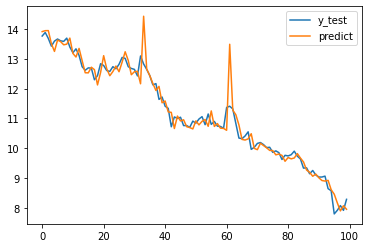

In [41]:
y_test_test = pd.DataFrame(y_test)
y_test_test.rename(columns={0: "y_test"}, inplace = True)
y_test_test['predict'] = lgbm_preds
y_test_test.plot()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_test,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_test,lgbm_preds))
print("r2_score is : ", r2_score(y_test,lgbm_preds))

mean_squared_error is :  0.1278540031185232
mean_absolute_error is :  0.2158974369049072
r2_score is :  0.950757025644725


### Rolling with window 30

In [43]:
train_rolling_30 = train_save.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,8.847667
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,8.915667
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,9.015000
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,9.094333
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,9.158000
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.584667
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.501333
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.418667
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.350333


In [44]:
train_rolling_30 = setup_cv(train_rolling_30)

In [45]:
lgbm_models = train_1dcnn(train_rolling_30, 5)

Device used : cpu
epoch 0  | loss: 233.82932| val_0_mse: 153497588.80061|  0:00:00s
epoch 1  | loss: 210.08675| val_0_mse: 2571045.21562|  0:00:00s
epoch 2  | loss: 191.01219| val_0_mse: 150204627.28449|  0:00:00s
epoch 3  | loss: 173.33855| val_0_mse: 2275.70783|  0:00:00s
epoch 4  | loss: 154.00583| val_0_mse: 3043.49212|  0:00:00s
epoch 5  | loss: 136.60577| val_0_mse: 3620.34681|  0:00:00s
epoch 6  | loss: 118.68977| val_0_mse: 4182.02685|  0:00:00s
epoch 7  | loss: 105.85149| val_0_mse: 4522.48635|  0:00:00s
epoch 8  | loss: 93.20379| val_0_mse: 25343456.11747|  0:00:00s
epoch 9  | loss: 77.4361 | val_0_mse: 124970573.00247|  0:00:00s
epoch 10 | loss: 65.48393| val_0_mse: 49784970.65688|  0:00:00s
epoch 11 | loss: 53.69377| val_0_mse: 23995209.01812|  0:00:00s
epoch 12 | loss: 40.81313| val_0_mse: 8097.07561|  0:00:00s
epoch 13 | loss: 29.98143| val_0_mse: 8729.60585|  0:00:00s
epoch 14 | loss: 22.01637| val_0_mse: 8755.96223|  0:00:00s
epoch 15 | loss: 16.88385| val_0_mse: 7947.1

epoch 137| loss: 0.11536 | val_0_mse: 1652.41351|  0:00:03s
epoch 138| loss: 0.13784 | val_0_mse: 1725.65238|  0:00:03s
epoch 139| loss: 0.15849 | val_0_mse: 1616.80717|  0:00:03s
epoch 140| loss: 0.12138 | val_0_mse: 1761.44486|  0:00:03s
epoch 141| loss: 0.12774 | val_0_mse: 2224.72442|  0:00:03s
epoch 142| loss: 0.11062 | val_0_mse: 3075.20301|  0:00:03s
epoch 143| loss: 0.12558 | val_0_mse: 3694.74358|  0:00:03s
epoch 144| loss: 0.21501 | val_0_mse: 3751.38973|  0:00:03s
epoch 145| loss: 0.1705  | val_0_mse: 3455.858|  0:00:03s
epoch 146| loss: 0.09481 | val_0_mse: 3225.88539|  0:00:03s
epoch 147| loss: 0.10336 | val_0_mse: 3001.60881|  0:00:03s
epoch 148| loss: 0.1986  | val_0_mse: 2695.5441|  0:00:03s
epoch 149| loss: 0.07609 | val_0_mse: 2622.4202|  0:00:03s
epoch 150| loss: 0.1097  | val_0_mse: 2500.05799|  0:00:03s
epoch 151| loss: 0.21449 | val_0_mse: 2200.00634|  0:00:03s
epoch 152| loss: 0.1862  | val_0_mse: 1772.80092|  0:00:03s
epoch 153| loss: 0.09207 | val_0_mse: 1489.6

epoch 276| loss: 0.04724 | val_0_mse: 10.65767|  0:00:06s
epoch 277| loss: 0.04292 | val_0_mse: 10.08698|  0:00:06s
epoch 278| loss: 0.05077 | val_0_mse: 9.38688 |  0:00:06s
epoch 279| loss: 0.03091 | val_0_mse: 8.31254 |  0:00:06s
epoch 280| loss: 0.03615 | val_0_mse: 7.55789 |  0:00:06s
epoch 281| loss: 0.04691 | val_0_mse: 8.28865 |  0:00:06s
epoch 282| loss: 0.08626 | val_0_mse: 8.6423  |  0:00:06s
epoch 283| loss: 0.08552 | val_0_mse: 7.94184 |  0:00:06s
epoch 284| loss: 0.05801 | val_0_mse: 8.59921 |  0:00:06s
epoch 285| loss: 0.05005 | val_0_mse: 9.15632 |  0:00:06s
epoch 286| loss: 0.05258 | val_0_mse: 12.51557|  0:00:06s
epoch 287| loss: 0.06578 | val_0_mse: 12.11038|  0:00:06s
epoch 288| loss: 0.07889 | val_0_mse: 18.32934|  0:00:06s
epoch 289| loss: 0.02934 | val_0_mse: 158.70701|  0:00:06s
epoch 290| loss: 0.05543 | val_0_mse: 234.51946|  0:00:06s
epoch 291| loss: 0.06961 | val_0_mse: 207.27129|  0:00:06s
epoch 292| loss: 0.03486 | val_0_mse: 259.63333|  0:00:06s
epoch 293|

epoch 416| loss: 0.02319 | val_0_mse: 806.37295|  0:00:08s
epoch 417| loss: 0.02313 | val_0_mse: 897.29582|  0:00:08s
epoch 418| loss: 0.03121 | val_0_mse: 946.14134|  0:00:08s
epoch 419| loss: 0.02819 | val_0_mse: 1083.4481|  0:00:08s
epoch 420| loss: 0.028   | val_0_mse: 1143.43338|  0:00:08s
epoch 421| loss: 0.05512 | val_0_mse: 1040.9329|  0:00:08s
epoch 422| loss: 0.03427 | val_0_mse: 911.13433|  0:00:08s
epoch 423| loss: 0.02649 | val_0_mse: 869.65288|  0:00:08s
epoch 424| loss: 0.01989 | val_0_mse: 771.8754|  0:00:08s
epoch 425| loss: 0.03551 | val_0_mse: 635.92525|  0:00:08s
epoch 426| loss: 0.02229 | val_0_mse: 591.26838|  0:00:09s
epoch 427| loss: 0.02607 | val_0_mse: 672.91709|  0:00:09s
epoch 428| loss: 0.02605 | val_0_mse: 642.92095|  0:00:09s
epoch 429| loss: 0.01736 | val_0_mse: 489.42144|  0:00:09s
epoch 430| loss: 0.02679 | val_0_mse: 417.96334|  0:00:09s
epoch 431| loss: 0.02981 | val_0_mse: 423.32475|  0:00:09s
epoch 432| loss: 0.03089 | val_0_mse: 375.0879|  0:00:09

epoch 560| loss: 0.02514 | val_0_mse: 35.26897|  0:00:11s
epoch 561| loss: 0.02725 | val_0_mse: 34.84229|  0:00:11s
epoch 562| loss: 0.02271 | val_0_mse: 35.18711|  0:00:11s
epoch 563| loss: 0.02491 | val_0_mse: 34.16913|  0:00:11s
epoch 564| loss: 0.02777 | val_0_mse: 31.9761 |  0:00:11s
epoch 565| loss: 0.02618 | val_0_mse: 31.0563 |  0:00:11s
epoch 566| loss: 0.02523 | val_0_mse: 31.15747|  0:00:11s
epoch 567| loss: 0.03451 | val_0_mse: 29.91884|  0:00:11s
epoch 568| loss: 0.02595 | val_0_mse: 28.32502|  0:00:11s
epoch 569| loss: 0.01619 | val_0_mse: 28.0865 |  0:00:11s
epoch 570| loss: 0.02694 | val_0_mse: 26.98222|  0:00:11s
epoch 571| loss: 0.02371 | val_0_mse: 25.13407|  0:00:11s
epoch 572| loss: 0.03395 | val_0_mse: 23.97589|  0:00:11s
epoch 573| loss: 0.03093 | val_0_mse: 23.6501 |  0:00:11s
epoch 574| loss: 0.03658 | val_0_mse: 22.72343|  0:00:11s
epoch 575| loss: 0.01561 | val_0_mse: 21.3698 |  0:00:11s
epoch 576| loss: 0.02891 | val_0_mse: 21.00226|  0:00:11s
epoch 577| los

epoch 707| loss: 0.05138 | val_0_mse: 0.13601 |  0:00:14s
epoch 708| loss: 0.05968 | val_0_mse: 0.12217 |  0:00:14s
epoch 709| loss: 0.01247 | val_0_mse: 0.21197 |  0:00:14s
epoch 710| loss: 0.04676 | val_0_mse: 0.22544 |  0:00:14s
epoch 711| loss: 0.04388 | val_0_mse: 0.15081 |  0:00:14s
epoch 712| loss: 0.02379 | val_0_mse: 0.08867 |  0:00:14s
epoch 713| loss: 0.03636 | val_0_mse: 0.08623 |  0:00:14s
epoch 714| loss: 0.02791 | val_0_mse: 0.13551 |  0:00:15s
epoch 715| loss: 0.0278  | val_0_mse: 0.14741 |  0:00:15s
epoch 716| loss: 0.02192 | val_0_mse: 0.12246 |  0:00:15s
epoch 717| loss: 0.02047 | val_0_mse: 0.09959 |  0:00:15s
epoch 718| loss: 0.02292 | val_0_mse: 0.07915 |  0:00:15s
epoch 719| loss: 0.03178 | val_0_mse: 0.10557 |  0:00:15s
epoch 720| loss: 0.01159 | val_0_mse: 0.22169 |  0:00:15s
epoch 721| loss: 0.04412 | val_0_mse: 0.26085 |  0:00:15s
epoch 722| loss: 0.05667 | val_0_mse: 0.18614 |  0:00:15s
epoch 723| loss: 0.01435 | val_0_mse: 0.10448 |  0:00:15s
epoch 724| los

epoch 852| loss: 0.01968 | val_0_mse: 0.02684 |  0:00:17s
epoch 853| loss: 0.02336 | val_0_mse: 0.03678 |  0:00:17s
epoch 854| loss: 0.0182  | val_0_mse: 0.03351 |  0:00:17s
epoch 855| loss: 0.03101 | val_0_mse: 0.02075 |  0:00:17s
epoch 856| loss: 0.01905 | val_0_mse: 0.0245  |  0:00:17s
epoch 857| loss: 0.01906 | val_0_mse: 0.03086 |  0:00:17s
epoch 858| loss: 0.02113 | val_0_mse: 0.0333  |  0:00:17s
epoch 859| loss: 0.03758 | val_0_mse: 0.02358 |  0:00:17s
epoch 860| loss: 0.02304 | val_0_mse: 0.02221 |  0:00:17s
epoch 861| loss: 0.02099 | val_0_mse: 0.0149  |  0:00:17s
epoch 862| loss: 0.01894 | val_0_mse: 0.03294 |  0:00:18s
epoch 863| loss: 0.04357 | val_0_mse: 0.04481 |  0:00:18s
epoch 864| loss: 0.04958 | val_0_mse: 0.02352 |  0:00:18s
epoch 865| loss: 0.01727 | val_0_mse: 0.03801 |  0:00:18s
epoch 866| loss: 0.06097 | val_0_mse: 0.06343 |  0:00:18s
epoch 867| loss: 0.09668 | val_0_mse: 0.03935 |  0:00:18s
epoch 868| loss: 0.04277 | val_0_mse: 0.02904 |  0:00:18s
epoch 869| los

epoch 995| loss: 0.01158 | val_0_mse: 0.02333 |  0:00:20s
epoch 996| loss: 0.01701 | val_0_mse: 0.02163 |  0:00:20s
epoch 997| loss: 0.00719 | val_0_mse: 0.01934 |  0:00:20s
epoch 998| loss: 0.01953 | val_0_mse: 0.02828 |  0:00:20s
epoch 999| loss: 0.00988 | val_0_mse: 0.0237  |  0:00:20s
epoch 1000| loss: 0.0135  | val_0_mse: 0.01832 |  0:00:20s
epoch 1001| loss: 0.00954 | val_0_mse: 0.01825 |  0:00:20s
epoch 1002| loss: 0.0138  | val_0_mse: 0.02115 |  0:00:20s
epoch 1003| loss: 0.02453 | val_0_mse: 0.02366 |  0:00:20s
epoch 1004| loss: 0.03453 | val_0_mse: 0.02405 |  0:00:20s
epoch 1005| loss: 0.0312  | val_0_mse: 0.02417 |  0:00:20s
epoch 1006| loss: 0.01083 | val_0_mse: 0.02468 |  0:00:20s
epoch 1007| loss: 0.01811 | val_0_mse: 0.01972 |  0:00:20s
epoch 1008| loss: 0.00801 | val_0_mse: 0.02468 |  0:00:20s
epoch 1009| loss: 0.00978 | val_0_mse: 0.02374 |  0:00:20s
epoch 1010| loss: 0.01625 | val_0_mse: 0.02474 |  0:00:20s
epoch 1011| loss: 0.01023 | val_0_mse: 0.02477 |  0:00:20s
ep

epoch 1138| loss: 0.01202 | val_0_mse: 0.04387 |  0:00:23s
epoch 1139| loss: 0.01967 | val_0_mse: 0.03233 |  0:00:23s
epoch 1140| loss: 0.00775 | val_0_mse: 0.02116 |  0:00:23s
epoch 1141| loss: 0.01151 | val_0_mse: 0.01565 |  0:00:23s
epoch 1142| loss: 0.00838 | val_0_mse: 0.02167 |  0:00:23s
epoch 1143| loss: 0.01355 | val_0_mse: 0.01795 |  0:00:23s
epoch 1144| loss: 0.00988 | val_0_mse: 0.01702 |  0:00:23s
epoch 1145| loss: 0.01425 | val_0_mse: 0.01651 |  0:00:23s
epoch 1146| loss: 0.00466 | val_0_mse: 0.02769 |  0:00:23s
epoch 1147| loss: 0.01202 | val_0_mse: 0.02462 |  0:00:23s
epoch 1148| loss: 0.01199 | val_0_mse: 0.03138 |  0:00:23s
epoch 1149| loss: 0.01707 | val_0_mse: 0.01733 |  0:00:23s
epoch 1150| loss: 0.01502 | val_0_mse: 0.01543 |  0:00:23s
epoch 1151| loss: 0.01342 | val_0_mse: 0.01802 |  0:00:23s
epoch 1152| loss: 0.01021 | val_0_mse: 0.01096 |  0:00:23s
epoch 1153| loss: 0.0182  | val_0_mse: 0.01602 |  0:00:23s
epoch 1154| loss: 0.00983 | val_0_mse: 0.02243 |  0:00:2

epoch 1283| loss: 0.02747 | val_0_mse: 0.06618 |  0:00:26s
epoch 1284| loss: 0.01797 | val_0_mse: 0.06639 |  0:00:26s
epoch 1285| loss: 0.02568 | val_0_mse: 0.03964 |  0:00:26s
epoch 1286| loss: 0.01383 | val_0_mse: 0.04517 |  0:00:26s
epoch 1287| loss: 0.0148  | val_0_mse: 0.03948 |  0:00:26s
epoch 1288| loss: 0.01747 | val_0_mse: 0.03711 |  0:00:26s
epoch 1289| loss: 0.0142  | val_0_mse: 0.03907 |  0:00:26s
epoch 1290| loss: 0.0148  | val_0_mse: 0.05525 |  0:00:26s
epoch 1291| loss: 0.01016 | val_0_mse: 0.06201 |  0:00:26s
epoch 1292| loss: 0.01876 | val_0_mse: 0.07123 |  0:00:26s
epoch 1293| loss: 0.00963 | val_0_mse: 0.08178 |  0:00:26s
epoch 1294| loss: 0.01353 | val_0_mse: 0.06919 |  0:00:26s
epoch 1295| loss: 0.01435 | val_0_mse: 0.08284 |  0:00:26s
epoch 1296| loss: 0.01446 | val_0_mse: 0.079   |  0:00:26s
epoch 1297| loss: 0.01786 | val_0_mse: 0.07894 |  0:00:26s
epoch 1298| loss: 0.0195  | val_0_mse: 0.08639 |  0:00:26s
epoch 1299| loss: 0.01408 | val_0_mse: 0.09241 |  0:00:2

epoch 1426| loss: 0.03299 | val_0_mse: 0.07885 |  0:00:28s
epoch 1427| loss: 0.03635 | val_0_mse: 0.05685 |  0:00:29s
epoch 1428| loss: 0.01852 | val_0_mse: 0.03855 |  0:00:29s
epoch 1429| loss: 0.04465 | val_0_mse: 0.0386  |  0:00:29s
epoch 1430| loss: 0.05632 | val_0_mse: 0.04713 |  0:00:29s
epoch 1431| loss: 0.01886 | val_0_mse: 0.11174 |  0:00:29s
epoch 1432| loss: 0.05699 | val_0_mse: 0.14519 |  0:00:29s
epoch 1433| loss: 0.10383 | val_0_mse: 0.11477 |  0:00:29s
epoch 1434| loss: 0.06626 | val_0_mse: 0.07191 |  0:00:29s
epoch 1435| loss: 0.01741 | val_0_mse: 0.06104 |  0:00:29s
epoch 1436| loss: 0.03218 | val_0_mse: 0.05491 |  0:00:29s
epoch 1437| loss: 0.02506 | val_0_mse: 0.08358 |  0:00:29s
epoch 1438| loss: 0.03375 | val_0_mse: 0.09289 |  0:00:29s
epoch 1439| loss: 0.04145 | val_0_mse: 0.07343 |  0:00:29s
epoch 1440| loss: 0.01382 | val_0_mse: 0.06731 |  0:00:29s
epoch 1441| loss: 0.01348 | val_0_mse: 0.07309 |  0:00:29s
epoch 1442| loss: 0.0083  | val_0_mse: 0.06909 |  0:00:2

epoch 1569| loss: 0.01337 | val_0_mse: 0.02117 |  0:00:31s
epoch 1570| loss: 0.02374 | val_0_mse: 0.02539 |  0:00:31s
epoch 1571| loss: 0.0178  | val_0_mse: 0.03653 |  0:00:31s
epoch 1572| loss: 0.01007 | val_0_mse: 0.0279  |  0:00:31s
epoch 1573| loss: 0.01193 | val_0_mse: 0.02074 |  0:00:31s
epoch 1574| loss: 0.02929 | val_0_mse: 0.02296 |  0:00:31s
epoch 1575| loss: 0.00633 | val_0_mse: 0.04019 |  0:00:31s
epoch 1576| loss: 0.01994 | val_0_mse: 0.03059 |  0:00:31s
epoch 1577| loss: 0.00774 | val_0_mse: 0.02724 |  0:00:31s
epoch 1578| loss: 0.01309 | val_0_mse: 0.02888 |  0:00:31s
epoch 1579| loss: 0.01193 | val_0_mse: 0.04255 |  0:00:31s
epoch 1580| loss: 0.01523 | val_0_mse: 0.04099 |  0:00:31s
epoch 1581| loss: 0.0143  | val_0_mse: 0.02641 |  0:00:32s
epoch 1582| loss: 0.00871 | val_0_mse: 0.02062 |  0:00:32s
epoch 1583| loss: 0.02013 | val_0_mse: 0.03213 |  0:00:32s
epoch 1584| loss: 0.00942 | val_0_mse: 0.03531 |  0:00:32s
epoch 1585| loss: 0.01144 | val_0_mse: 0.03338 |  0:00:3

epoch 55 | loss: 0.39097 | val_0_mse: 14786610.63487|  0:00:01s
epoch 56 | loss: 0.40133 | val_0_mse: 27354034.62193|  0:00:01s
epoch 57 | loss: 0.29427 | val_0_mse: 37130146.36174|  0:00:01s
epoch 58 | loss: 0.32638 | val_0_mse: 26941604.50541|  0:00:01s
epoch 59 | loss: 0.19771 | val_0_mse: 22806846.57986|  0:00:01s
epoch 60 | loss: 0.26333 | val_0_mse: 14404949.93593|  0:00:01s
epoch 61 | loss: 0.22403 | val_0_mse: 10595663.03278|  0:00:01s
epoch 62 | loss: 0.17041 | val_0_mse: 10377537.01551|  0:00:01s
epoch 63 | loss: 0.39169 | val_0_mse: 10869592.27357|  0:00:01s
epoch 64 | loss: 0.24135 | val_0_mse: 8840643.85496|  0:00:01s
epoch 65 | loss: 0.19795 | val_0_mse: 3871331.71393|  0:00:01s
epoch 66 | loss: 0.31223 | val_0_mse: 180931.35851|  0:00:01s
epoch 67 | loss: 0.30632 | val_0_mse: 182045.53526|  0:00:01s
epoch 68 | loss: 0.36093 | val_0_mse: 3291867.04463|  0:00:01s
epoch 69 | loss: 0.26756 | val_0_mse: 2075293.26726|  0:00:01s
epoch 70 | loss: 0.46395 | val_0_mse: 258349.909

epoch 197| loss: 0.12849 | val_0_mse: 13241.90512|  0:00:03s
epoch 198| loss: 0.09775 | val_0_mse: 13322.86816|  0:00:03s
epoch 199| loss: 0.05921 | val_0_mse: 13146.68241|  0:00:03s
epoch 200| loss: 0.1285  | val_0_mse: 13090.67961|  0:00:03s
epoch 201| loss: 0.19468 | val_0_mse: 12775.09135|  0:00:04s
epoch 202| loss: 0.11755 | val_0_mse: 12266.23915|  0:00:04s
epoch 203| loss: 0.10297 | val_0_mse: 11707.02403|  0:00:04s
epoch 204| loss: 0.15028 | val_0_mse: 11029.55261|  0:00:04s
epoch 205| loss: 0.12124 | val_0_mse: 10241.23212|  0:00:04s
epoch 206| loss: 0.08508 | val_0_mse: 10057.63909|  0:00:04s
epoch 207| loss: 0.1519  | val_0_mse: 10218.07144|  0:00:04s
epoch 208| loss: 0.25226 | val_0_mse: 10401.76636|  0:00:04s
epoch 209| loss: 0.09927 | val_0_mse: 10269.25793|  0:00:04s
epoch 210| loss: 0.14149 | val_0_mse: 9807.95407|  0:00:04s
epoch 211| loss: 0.16493 | val_0_mse: 9207.07215|  0:00:04s
epoch 212| loss: 0.10624 | val_0_mse: 8558.9778|  0:00:04s
epoch 213| loss: 0.11172 | v

epoch 340| loss: 0.04145 | val_0_mse: 1377.40462|  0:00:06s
epoch 341| loss: 0.0327  | val_0_mse: 1402.84661|  0:00:06s
epoch 342| loss: 0.02648 | val_0_mse: 1367.43765|  0:00:06s
epoch 343| loss: 0.02297 | val_0_mse: 1410.15721|  0:00:06s
epoch 344| loss: 0.02524 | val_0_mse: 1458.10772|  0:00:06s
epoch 345| loss: 0.03178 | val_0_mse: 1437.92308|  0:00:06s
epoch 346| loss: 0.02983 | val_0_mse: 1425.71834|  0:00:06s
epoch 347| loss: 0.03115 | val_0_mse: 1345.61288|  0:00:06s
epoch 348| loss: 0.03522 | val_0_mse: 1327.23299|  0:00:06s
epoch 349| loss: 0.02446 | val_0_mse: 1340.53124|  0:00:06s
epoch 350| loss: 0.05173 | val_0_mse: 1295.05273|  0:00:06s
epoch 351| loss: 0.04734 | val_0_mse: 1187.06405|  0:00:06s
epoch 352| loss: 0.05551 | val_0_mse: 1127.95688|  0:00:06s
epoch 353| loss: 0.0852  | val_0_mse: 1120.35595|  0:00:06s
epoch 354| loss: 0.04004 | val_0_mse: 1161.71198|  0:00:06s
epoch 355| loss: 0.08875 | val_0_mse: 1168.98755|  0:00:06s
epoch 356| loss: 0.1294  | val_0_mse: 11

epoch 481| loss: 0.03826 | val_0_mse: 45.45965|  0:00:09s
epoch 482| loss: 0.05731 | val_0_mse: 45.7135 |  0:00:09s
epoch 483| loss: 0.02488 | val_0_mse: 44.0812 |  0:00:09s
epoch 484| loss: 0.03731 | val_0_mse: 43.72045|  0:00:09s
epoch 485| loss: 0.0941  | val_0_mse: 47.51995|  0:00:09s
epoch 486| loss: 0.03665 | val_0_mse: 50.91008|  0:00:10s
epoch 487| loss: 0.04187 | val_0_mse: 52.27578|  0:00:10s
epoch 488| loss: 0.06833 | val_0_mse: 56.03579|  0:00:10s
epoch 489| loss: 0.03328 | val_0_mse: 63.25884|  0:00:10s
epoch 490| loss: 0.0556  | val_0_mse: 62.31733|  0:00:10s
epoch 491| loss: 0.08674 | val_0_mse: 57.55561|  0:00:10s
epoch 492| loss: 0.05104 | val_0_mse: 54.03936|  0:00:10s
epoch 493| loss: 0.0428  | val_0_mse: 50.19897|  0:00:10s
epoch 494| loss: 0.07757 | val_0_mse: 47.71847|  0:00:10s
epoch 495| loss: 0.02634 | val_0_mse: 45.16948|  0:00:10s
epoch 496| loss: 0.06613 | val_0_mse: 43.784  |  0:00:10s
epoch 497| loss: 0.09153 | val_0_mse: 42.47728|  0:00:10s
epoch 498| los

epoch 626| loss: 0.01635 | val_0_mse: 7.59195 |  0:00:13s
epoch 627| loss: 0.02164 | val_0_mse: 7.57523 |  0:00:13s
epoch 628| loss: 0.02409 | val_0_mse: 7.40015 |  0:00:13s
epoch 629| loss: 0.01593 | val_0_mse: 7.26222 |  0:00:13s
epoch 630| loss: 0.02504 | val_0_mse: 7.25619 |  0:00:13s
epoch 631| loss: 0.02336 | val_0_mse: 7.2992  |  0:00:13s
epoch 632| loss: 0.01723 | val_0_mse: 7.13737 |  0:00:13s
epoch 633| loss: 0.03124 | val_0_mse: 7.09161 |  0:00:13s
epoch 634| loss: 0.02203 | val_0_mse: 7.18613 |  0:00:13s
epoch 635| loss: 0.02776 | val_0_mse: 7.31889 |  0:00:13s
epoch 636| loss: 0.0163  | val_0_mse: 7.48365 |  0:00:13s
epoch 637| loss: 0.04944 | val_0_mse: 7.66324 |  0:00:13s
epoch 638| loss: 0.05075 | val_0_mse: 7.73343 |  0:00:13s
epoch 639| loss: 0.02662 | val_0_mse: 7.43319 |  0:00:13s
epoch 640| loss: 0.03958 | val_0_mse: 7.09701 |  0:00:13s
epoch 641| loss: 0.03324 | val_0_mse: 7.0129  |  0:00:13s
epoch 642| loss: 0.01157 | val_0_mse: 7.0595  |  0:00:13s
epoch 643| los

epoch 778| loss: 0.02829 | val_0_mse: 0.66    |  0:00:16s
epoch 779| loss: 0.01263 | val_0_mse: 0.57609 |  0:00:16s
epoch 780| loss: 0.02215 | val_0_mse: 0.69104 |  0:00:16s
epoch 781| loss: 0.01594 | val_0_mse: 0.71991 |  0:00:16s
epoch 782| loss: 0.01424 | val_0_mse: 0.5708  |  0:00:16s
epoch 783| loss: 0.02814 | val_0_mse: 0.58828 |  0:00:16s
epoch 784| loss: 0.01234 | val_0_mse: 0.69896 |  0:00:16s
epoch 785| loss: 0.03016 | val_0_mse: 0.6381  |  0:00:16s
epoch 786| loss: 0.01589 | val_0_mse: 0.50943 |  0:00:16s
epoch 787| loss: 0.01711 | val_0_mse: 0.5155  |  0:00:16s
epoch 788| loss: 0.02348 | val_0_mse: 0.74526 |  0:00:16s
epoch 789| loss: 0.04336 | val_0_mse: 0.81345 |  0:00:16s
epoch 790| loss: 0.08128 | val_0_mse: 0.66083 |  0:00:16s
epoch 791| loss: 0.02232 | val_0_mse: 0.38109 |  0:00:16s
epoch 792| loss: 0.07628 | val_0_mse: 0.30014 |  0:00:16s
epoch 793| loss: 0.14112 | val_0_mse: 0.29766 |  0:00:16s
epoch 794| loss: 0.08931 | val_0_mse: 0.45777 |  0:00:16s
epoch 795| los

epoch 924| loss: 0.01279 | val_0_mse: 0.05424 |  0:00:19s
epoch 925| loss: 0.01872 | val_0_mse: 0.08584 |  0:00:19s
epoch 926| loss: 0.02018 | val_0_mse: 0.04976 |  0:00:19s
epoch 927| loss: 0.00931 | val_0_mse: 0.04499 |  0:00:19s
epoch 928| loss: 0.0112  | val_0_mse: 0.05817 |  0:00:19s
epoch 929| loss: 0.01501 | val_0_mse: 0.04026 |  0:00:19s
epoch 930| loss: 0.01353 | val_0_mse: 0.05086 |  0:00:19s
epoch 931| loss: 0.013   | val_0_mse: 0.05478 |  0:00:19s
epoch 932| loss: 0.02286 | val_0_mse: 0.02679 |  0:00:19s
epoch 933| loss: 0.01138 | val_0_mse: 0.03613 |  0:00:19s
epoch 934| loss: 0.01982 | val_0_mse: 0.0788  |  0:00:19s
epoch 935| loss: 0.02423 | val_0_mse: 0.05247 |  0:00:19s
epoch 936| loss: 0.01838 | val_0_mse: 0.0168  |  0:00:19s
epoch 937| loss: 0.023   | val_0_mse: 0.01667 |  0:00:19s
epoch 938| loss: 0.01352 | val_0_mse: 0.06473 |  0:00:19s
epoch 939| loss: 0.02573 | val_0_mse: 0.07472 |  0:00:19s
epoch 940| loss: 0.02384 | val_0_mse: 0.03089 |  0:00:19s
epoch 941| los

epoch 1071| loss: 0.07293 | val_0_mse: 0.02925 |  0:00:22s
epoch 1072| loss: 0.04168 | val_0_mse: 0.1031  |  0:00:22s
epoch 1073| loss: 0.0722  | val_0_mse: 0.1687  |  0:00:22s
epoch 1074| loss: 0.15438 | val_0_mse: 0.12394 |  0:00:22s
epoch 1075| loss: 0.10457 | val_0_mse: 0.0253  |  0:00:22s
epoch 1076| loss: 0.03587 | val_0_mse: 0.02262 |  0:00:22s
epoch 1077| loss: 0.07267 | val_0_mse: 0.05215 |  0:00:22s
epoch 1078| loss: 0.12511 | val_0_mse: 0.05098 |  0:00:22s
epoch 1079| loss: 0.09792 | val_0_mse: 0.06424 |  0:00:22s
epoch 1080| loss: 0.04584 | val_0_mse: 0.09147 |  0:00:22s
epoch 1081| loss: 0.08955 | val_0_mse: 0.07678 |  0:00:22s
epoch 1082| loss: 0.11621 | val_0_mse: 0.03724 |  0:00:22s
epoch 1083| loss: 0.08209 | val_0_mse: 0.03171 |  0:00:22s
epoch 1084| loss: 0.07778 | val_0_mse: 0.02558 |  0:00:22s
epoch 1085| loss: 0.05068 | val_0_mse: 0.05852 |  0:00:22s
epoch 1086| loss: 0.04779 | val_0_mse: 0.08196 |  0:00:22s
epoch 1087| loss: 0.06396 | val_0_mse: 0.05254 |  0:00:2

epoch 1211| loss: 0.02129 | val_0_mse: 0.01147 |  0:00:25s
epoch 1212| loss: 0.02109 | val_0_mse: 0.01405 |  0:00:25s
epoch 1213| loss: 0.03093 | val_0_mse: 0.02246 |  0:00:25s
epoch 1214| loss: 0.02585 | val_0_mse: 0.055   |  0:00:25s
epoch 1215| loss: 0.03091 | val_0_mse: 0.02602 |  0:00:25s
epoch 1216| loss: 0.03185 | val_0_mse: 0.01298 |  0:00:25s
epoch 1217| loss: 0.04592 | val_0_mse: 0.01365 |  0:00:25s
epoch 1218| loss: 0.03393 | val_0_mse: 0.02154 |  0:00:25s
epoch 1219| loss: 0.01894 | val_0_mse: 0.03419 |  0:00:25s
epoch 1220| loss: 0.02203 | val_0_mse: 0.0393  |  0:00:25s
epoch 1221| loss: 0.02502 | val_0_mse: 0.01488 |  0:00:25s
epoch 1222| loss: 0.02209 | val_0_mse: 0.01224 |  0:00:25s
epoch 1223| loss: 0.0237  | val_0_mse: 0.01247 |  0:00:25s
epoch 1224| loss: 0.01636 | val_0_mse: 0.04535 |  0:00:25s
epoch 1225| loss: 0.02325 | val_0_mse: 0.03527 |  0:00:25s
epoch 1226| loss: 0.01981 | val_0_mse: 0.016   |  0:00:25s
epoch 1227| loss: 0.02499 | val_0_mse: 0.01883 |  0:00:2

epoch 1353| loss: 0.02574 | val_0_mse: 0.01668 |  0:00:28s
epoch 1354| loss: 0.01316 | val_0_mse: 0.02112 |  0:00:28s
epoch 1355| loss: 0.02587 | val_0_mse: 0.02111 |  0:00:28s
epoch 1356| loss: 0.01131 | val_0_mse: 0.03886 |  0:00:28s
epoch 1357| loss: 0.02232 | val_0_mse: 0.02669 |  0:00:28s
epoch 1358| loss: 0.01085 | val_0_mse: 0.01824 |  0:00:28s
epoch 1359| loss: 0.02947 | val_0_mse: 0.01686 |  0:00:28s
epoch 1360| loss: 0.01379 | val_0_mse: 0.02763 |  0:00:28s
epoch 1361| loss: 0.01857 | val_0_mse: 0.03187 |  0:00:28s
epoch 1362| loss: 0.0154  | val_0_mse: 0.01831 |  0:00:28s
epoch 1363| loss: 0.01682 | val_0_mse: 0.02189 |  0:00:28s
epoch 1364| loss: 0.02944 | val_0_mse: 0.02511 |  0:00:28s
epoch 1365| loss: 0.01714 | val_0_mse: 0.03189 |  0:00:28s
epoch 1366| loss: 0.01605 | val_0_mse: 0.02125 |  0:00:28s
epoch 1367| loss: 0.02261 | val_0_mse: 0.01985 |  0:00:28s
epoch 1368| loss: 0.01895 | val_0_mse: 0.0252  |  0:00:28s
epoch 1369| loss: 0.01876 | val_0_mse: 0.02846 |  0:00:2

epoch 1495| loss: 0.05554 | val_0_mse: 0.11262 |  0:00:30s
epoch 1496| loss: 0.07174 | val_0_mse: 0.05592 |  0:00:30s
epoch 1497| loss: 0.02416 | val_0_mse: 0.02371 |  0:00:30s
epoch 1498| loss: 0.06071 | val_0_mse: 0.07291 |  0:00:30s
epoch 1499| loss: 0.14339 | val_0_mse: 0.05416 |  0:00:30s
epoch 1500| loss: 0.09752 | val_0_mse: 0.01352 |  0:00:30s
epoch 1501| loss: 0.02886 | val_0_mse: 0.11035 |  0:00:31s
epoch 1502| loss: 0.06343 | val_0_mse: 0.19074 |  0:00:31s
epoch 1503| loss: 0.11482 | val_0_mse: 0.09523 |  0:00:31s
epoch 1504| loss: 0.07658 | val_0_mse: 0.01562 |  0:00:31s
epoch 1505| loss: 0.04164 | val_0_mse: 0.06971 |  0:00:31s
epoch 1506| loss: 0.09797 | val_0_mse: 0.05744 |  0:00:31s
epoch 1507| loss: 0.10337 | val_0_mse: 0.04177 |  0:00:31s
epoch 1508| loss: 0.04408 | val_0_mse: 0.0586  |  0:00:31s
epoch 1509| loss: 0.02919 | val_0_mse: 0.0409  |  0:00:31s
epoch 1510| loss: 0.05664 | val_0_mse: 0.02975 |  0:00:31s
epoch 1511| loss: 0.03741 | val_0_mse: 0.02927 |  0:00:3

epoch 1638| loss: 0.00781 | val_0_mse: 0.01987 |  0:00:33s
epoch 1639| loss: 0.00719 | val_0_mse: 0.02345 |  0:00:33s
epoch 1640| loss: 0.01118 | val_0_mse: 0.0192  |  0:00:33s
epoch 1641| loss: 0.01357 | val_0_mse: 0.01632 |  0:00:33s
epoch 1642| loss: 0.00907 | val_0_mse: 0.02772 |  0:00:33s
epoch 1643| loss: 0.01778 | val_0_mse: 0.01742 |  0:00:33s
epoch 1644| loss: 0.0137  | val_0_mse: 0.02163 |  0:00:33s
epoch 1645| loss: 0.04518 | val_0_mse: 0.02515 |  0:00:33s
epoch 1646| loss: 0.03754 | val_0_mse: 0.02063 |  0:00:33s
epoch 1647| loss: 0.00696 | val_0_mse: 0.04594 |  0:00:33s
epoch 1648| loss: 0.03491 | val_0_mse: 0.03891 |  0:00:33s
epoch 1649| loss: 0.02599 | val_0_mse: 0.01294 |  0:00:33s
epoch 1650| loss: 0.02762 | val_0_mse: 0.01333 |  0:00:33s
epoch 1651| loss: 0.01764 | val_0_mse: 0.02964 |  0:00:33s
epoch 1652| loss: 0.00931 | val_0_mse: 0.04536 |  0:00:33s
epoch 1653| loss: 0.01583 | val_0_mse: 0.02077 |  0:00:34s
epoch 1654| loss: 0.01343 | val_0_mse: 0.0118  |  0:00:3

epoch 1781| loss: 0.02663 | val_0_mse: 0.01659 |  0:00:36s
epoch 1782| loss: 0.02438 | val_0_mse: 0.03901 |  0:00:36s
epoch 1783| loss: 0.02242 | val_0_mse: 0.03096 |  0:00:36s
epoch 1784| loss: 0.01578 | val_0_mse: 0.01424 |  0:00:36s
epoch 1785| loss: 0.01552 | val_0_mse: 0.01373 |  0:00:36s
epoch 1786| loss: 0.01292 | val_0_mse: 0.02583 |  0:00:36s
epoch 1787| loss: 0.0165  | val_0_mse: 0.02249 |  0:00:36s
epoch 1788| loss: 0.00835 | val_0_mse: 0.02001 |  0:00:36s
epoch 1789| loss: 0.01012 | val_0_mse: 0.0231  |  0:00:36s
epoch 1790| loss: 0.00993 | val_0_mse: 0.01782 |  0:00:36s
epoch 1791| loss: 0.0138  | val_0_mse: 0.01955 |  0:00:36s
epoch 1792| loss: 0.0088  | val_0_mse: 0.02514 |  0:00:36s
epoch 1793| loss: 0.00791 | val_0_mse: 0.03387 |  0:00:36s
epoch 1794| loss: 0.01229 | val_0_mse: 0.01511 |  0:00:36s
epoch 1795| loss: 0.00523 | val_0_mse: 0.01554 |  0:00:36s
epoch 1796| loss: 0.01619 | val_0_mse: 0.01659 |  0:00:36s
epoch 1797| loss: 0.01183 | val_0_mse: 0.02211 |  0:00:3

epoch 1923| loss: 0.03284 | val_0_mse: 0.02666 |  0:00:39s
epoch 1924| loss: 0.02197 | val_0_mse: 0.04621 |  0:00:39s
epoch 1925| loss: 0.02654 | val_0_mse: 0.0294  |  0:00:39s
epoch 1926| loss: 0.01466 | val_0_mse: 0.01825 |  0:00:39s
epoch 1927| loss: 0.00843 | val_0_mse: 0.02819 |  0:00:39s
epoch 1928| loss: 0.01955 | val_0_mse: 0.02646 |  0:00:39s
epoch 1929| loss: 0.01142 | val_0_mse: 0.01816 |  0:00:39s
epoch 1930| loss: 0.01049 | val_0_mse: 0.0233  |  0:00:39s
epoch 1931| loss: 0.00933 | val_0_mse: 0.02642 |  0:00:39s
epoch 1932| loss: 0.01645 | val_0_mse: 0.01711 |  0:00:39s
epoch 1933| loss: 0.01046 | val_0_mse: 0.02444 |  0:00:39s
epoch 1934| loss: 0.01962 | val_0_mse: 0.02674 |  0:00:39s
epoch 1935| loss: 0.01005 | val_0_mse: 0.03536 |  0:00:39s
epoch 1936| loss: 0.00683 | val_0_mse: 0.03125 |  0:00:39s
epoch 1937| loss: 0.01054 | val_0_mse: 0.03275 |  0:00:39s
epoch 1938| loss: 0.01086 | val_0_mse: 0.025   |  0:00:39s
epoch 1939| loss: 0.00636 | val_0_mse: 0.02392 |  0:00:3

epoch 63 | loss: 0.25937 | val_0_mse: 65.07058|  0:00:01s
epoch 64 | loss: 0.24302 | val_0_mse: 117.46272|  0:00:01s
epoch 65 | loss: 0.20828 | val_0_mse: 248.51706|  0:00:01s
epoch 66 | loss: 0.19985 | val_0_mse: 127.55539|  0:00:01s
epoch 67 | loss: 0.28946 | val_0_mse: 42.90013|  0:00:01s
epoch 68 | loss: 0.2183  | val_0_mse: 45.8482 |  0:00:01s
epoch 69 | loss: 0.14009 | val_0_mse: 43.92441|  0:00:01s
epoch 70 | loss: 0.18936 | val_0_mse: 43.24932|  0:00:01s
epoch 71 | loss: 0.29817 | val_0_mse: 44.52856|  0:00:01s
epoch 72 | loss: 0.19596 | val_0_mse: 42.99982|  0:00:01s
epoch 73 | loss: 0.12306 | val_0_mse: 39.51448|  0:00:01s
epoch 74 | loss: 0.22045 | val_0_mse: 39.86356|  0:00:01s
epoch 75 | loss: 0.30866 | val_0_mse: 63.38848|  0:00:01s
epoch 76 | loss: 0.08778 | val_0_mse: 276.62541|  0:00:01s
epoch 77 | loss: 0.13382 | val_0_mse: 1658.84551|  0:00:01s
epoch 78 | loss: 0.2536  | val_0_mse: 4521.21705|  0:00:01s
epoch 79 | loss: 0.12011 | val_0_mse: 12027.68031|  0:00:01s
epo

epoch 206| loss: 0.1062  | val_0_mse: 1955.90463|  0:00:04s
epoch 207| loss: 0.10758 | val_0_mse: 1964.39724|  0:00:04s
epoch 208| loss: 0.06827 | val_0_mse: 1955.5317|  0:00:04s
epoch 209| loss: 0.0694  | val_0_mse: 2050.18563|  0:00:04s
epoch 210| loss: 0.07666 | val_0_mse: 2129.64393|  0:00:04s
epoch 211| loss: 0.04106 | val_0_mse: 2131.14423|  0:00:04s
epoch 212| loss: 0.09521 | val_0_mse: 2071.23043|  0:00:04s
epoch 213| loss: 0.1725  | val_0_mse: 2101.43692|  0:00:04s
epoch 214| loss: 0.07046 | val_0_mse: 2123.09444|  0:00:04s
epoch 215| loss: 0.1008  | val_0_mse: 2105.24292|  0:00:04s
epoch 216| loss: 0.08902 | val_0_mse: 2041.48983|  0:00:04s
epoch 217| loss: 0.05494 | val_0_mse: 1992.136|  0:00:04s
epoch 218| loss: 0.14501 | val_0_mse: 2004.74845|  0:00:04s
epoch 219| loss: 0.11365 | val_0_mse: 2005.7439|  0:00:04s
epoch 220| loss: 0.05343 | val_0_mse: 1999.97423|  0:00:04s
epoch 221| loss: 0.1016  | val_0_mse: 1968.02525|  0:00:04s
epoch 222| loss: 0.13512 | val_0_mse: 1931.6

epoch 352| loss: 0.04553 | val_0_mse: 24.89486|  0:00:07s
epoch 353| loss: 0.03339 | val_0_mse: 24.82318|  0:00:07s
epoch 354| loss: 0.03355 | val_0_mse: 25.7169 |  0:00:07s
epoch 355| loss: 0.02199 | val_0_mse: 14.92081|  0:00:07s
epoch 356| loss: 0.02296 | val_0_mse: 13.71823|  0:00:07s
epoch 357| loss: 0.01594 | val_0_mse: 13.23843|  0:00:07s
epoch 358| loss: 0.03384 | val_0_mse: 13.55152|  0:00:07s
epoch 359| loss: 0.02001 | val_0_mse: 14.11498|  0:00:07s
epoch 360| loss: 0.01712 | val_0_mse: 14.38802|  0:00:07s
epoch 361| loss: 0.02572 | val_0_mse: 13.28349|  0:00:07s
epoch 362| loss: 0.02817 | val_0_mse: 11.80106|  0:00:07s
epoch 363| loss: 0.02501 | val_0_mse: 11.3603 |  0:00:07s
epoch 364| loss: 0.035   | val_0_mse: 11.01761|  0:00:07s
epoch 365| loss: 0.02317 | val_0_mse: 9.88971 |  0:00:07s
epoch 366| loss: 0.02441 | val_0_mse: 9.30777 |  0:00:07s
epoch 367| loss: 0.02968 | val_0_mse: 8.60046 |  0:00:08s
epoch 368| loss: 0.03373 | val_0_mse: 7.78802 |  0:00:08s
epoch 369| los

epoch 497| loss: 0.09879 | val_0_mse: 2.22399 |  0:00:10s
epoch 498| loss: 0.08604 | val_0_mse: 2.03576 |  0:00:10s
epoch 499| loss: 0.03176 | val_0_mse: 1.93297 |  0:00:10s
epoch 500| loss: 0.06575 | val_0_mse: 1.9902  |  0:00:10s
epoch 501| loss: 0.09023 | val_0_mse: 2.03833 |  0:00:10s
epoch 502| loss: 0.04268 | val_0_mse: 1.89254 |  0:00:10s
epoch 503| loss: 0.06567 | val_0_mse: 1.70555 |  0:00:10s
epoch 504| loss: 0.10494 | val_0_mse: 1.85598 |  0:00:11s
epoch 505| loss: 0.06655 | val_0_mse: 1.61565 |  0:00:11s
epoch 506| loss: 0.02816 | val_0_mse: 1.79529 |  0:00:11s
epoch 507| loss: 0.09507 | val_0_mse: 1.78418 |  0:00:11s
epoch 508| loss: 0.12734 | val_0_mse: 1.67606 |  0:00:11s
epoch 509| loss: 0.09818 | val_0_mse: 1.45926 |  0:00:11s
epoch 510| loss: 0.03365 | val_0_mse: 1.48529 |  0:00:11s
epoch 511| loss: 0.04961 | val_0_mse: 1.73505 |  0:00:11s
epoch 512| loss: 0.07672 | val_0_mse: 1.64088 |  0:00:11s
epoch 513| loss: 0.02934 | val_0_mse: 1.45569 |  0:00:11s
epoch 514| los

epoch 639| loss: 0.01734 | val_0_mse: 0.18668 |  0:00:13s
epoch 640| loss: 0.04442 | val_0_mse: 0.20734 |  0:00:13s
epoch 641| loss: 0.02024 | val_0_mse: 0.19072 |  0:00:13s
epoch 642| loss: 0.02034 | val_0_mse: 0.18449 |  0:00:13s
epoch 643| loss: 0.02214 | val_0_mse: 0.20774 |  0:00:13s
epoch 644| loss: 0.02404 | val_0_mse: 0.2127  |  0:00:13s
epoch 645| loss: 0.02101 | val_0_mse: 0.19699 |  0:00:14s
epoch 646| loss: 0.01337 | val_0_mse: 0.21098 |  0:00:14s
epoch 647| loss: 0.05045 | val_0_mse: 0.22575 |  0:00:14s
epoch 648| loss: 0.01678 | val_0_mse: 0.20306 |  0:00:14s
epoch 649| loss: 0.02551 | val_0_mse: 0.22612 |  0:00:14s
epoch 650| loss: 0.03129 | val_0_mse: 0.20674 |  0:00:14s
epoch 651| loss: 0.02184 | val_0_mse: 0.23742 |  0:00:14s
epoch 652| loss: 0.03932 | val_0_mse: 0.21022 |  0:00:14s
epoch 653| loss: 0.01631 | val_0_mse: 0.18901 |  0:00:14s
epoch 654| loss: 0.04803 | val_0_mse: 0.22151 |  0:00:14s
epoch 655| loss: 0.02183 | val_0_mse: 0.2679  |  0:00:14s
epoch 656| los

epoch 782| loss: 0.02771 | val_0_mse: 0.08914 |  0:00:16s
epoch 783| loss: 0.0266  | val_0_mse: 0.07991 |  0:00:16s
epoch 784| loss: 0.02127 | val_0_mse: 0.09505 |  0:00:16s
epoch 785| loss: 0.0199  | val_0_mse: 0.10942 |  0:00:16s
epoch 786| loss: 0.01828 | val_0_mse: 0.08803 |  0:00:16s
epoch 787| loss: 0.01205 | val_0_mse: 0.09091 |  0:00:16s
epoch 788| loss: 0.01695 | val_0_mse: 0.10005 |  0:00:17s
epoch 789| loss: 0.01157 | val_0_mse: 0.09211 |  0:00:17s
epoch 790| loss: 0.01509 | val_0_mse: 0.10061 |  0:00:17s
epoch 791| loss: 0.01507 | val_0_mse: 0.09528 |  0:00:17s
epoch 792| loss: 0.0256  | val_0_mse: 0.08185 |  0:00:17s
epoch 793| loss: 0.0301  | val_0_mse: 0.0893  |  0:00:17s
epoch 794| loss: 0.01468 | val_0_mse: 0.11327 |  0:00:17s
epoch 795| loss: 0.02156 | val_0_mse: 0.08405 |  0:00:17s
epoch 796| loss: 0.01704 | val_0_mse: 0.08096 |  0:00:17s
epoch 797| loss: 0.01291 | val_0_mse: 0.10027 |  0:00:17s
epoch 798| loss: 0.01639 | val_0_mse: 0.08378 |  0:00:17s
epoch 799| los

epoch 931| loss: 0.02242 | val_0_mse: 0.02619 |  0:00:20s
epoch 932| loss: 0.02047 | val_0_mse: 0.04852 |  0:00:20s
epoch 933| loss: 0.04476 | val_0_mse: 0.05061 |  0:00:20s
epoch 934| loss: 0.04029 | val_0_mse: 0.03614 |  0:00:20s
epoch 935| loss: 0.03401 | val_0_mse: 0.02181 |  0:00:20s
epoch 936| loss: 0.01616 | val_0_mse: 0.04929 |  0:00:20s
epoch 937| loss: 0.03489 | val_0_mse: 0.03223 |  0:00:20s
epoch 938| loss: 0.01569 | val_0_mse: 0.02112 |  0:00:20s
epoch 939| loss: 0.03329 | val_0_mse: 0.02073 |  0:00:20s
epoch 940| loss: 0.02093 | val_0_mse: 0.05394 |  0:00:20s
epoch 941| loss: 0.03707 | val_0_mse: 0.07697 |  0:00:20s
epoch 942| loss: 0.05645 | val_0_mse: 0.03725 |  0:00:20s
epoch 943| loss: 0.02312 | val_0_mse: 0.01611 |  0:00:20s
epoch 944| loss: 0.03725 | val_0_mse: 0.0276  |  0:00:20s
epoch 945| loss: 0.03516 | val_0_mse: 0.04554 |  0:00:20s
epoch 946| loss: 0.03155 | val_0_mse: 0.05539 |  0:00:20s
epoch 947| loss: 0.02972 | val_0_mse: 0.02387 |  0:00:20s
epoch 948| los

epoch 1075| loss: 0.02062 | val_0_mse: 0.01543 |  0:00:23s
epoch 1076| loss: 0.01126 | val_0_mse: 0.01387 |  0:00:23s
epoch 1077| loss: 0.03294 | val_0_mse: 0.0175  |  0:00:23s
epoch 1078| loss: 0.03842 | val_0_mse: 0.0188  |  0:00:23s
epoch 1079| loss: 0.01654 | val_0_mse: 0.02488 |  0:00:23s
epoch 1080| loss: 0.02212 | val_0_mse: 0.01705 |  0:00:23s
epoch 1081| loss: 0.02362 | val_0_mse: 0.0106  |  0:00:23s
epoch 1082| loss: 0.02107 | val_0_mse: 0.02478 |  0:00:23s
epoch 1083| loss: 0.01658 | val_0_mse: 0.02201 |  0:00:23s
epoch 1084| loss: 0.01264 | val_0_mse: 0.01157 |  0:00:23s
epoch 1085| loss: 0.02186 | val_0_mse: 0.0148  |  0:00:23s
epoch 1086| loss: 0.0174  | val_0_mse: 0.03396 |  0:00:23s
epoch 1087| loss: 0.02205 | val_0_mse: 0.03076 |  0:00:23s
epoch 1088| loss: 0.0218  | val_0_mse: 0.01117 |  0:00:23s
epoch 1089| loss: 0.02152 | val_0_mse: 0.01244 |  0:00:23s
epoch 1090| loss: 0.01355 | val_0_mse: 0.02998 |  0:00:23s
epoch 1091| loss: 0.02464 | val_0_mse: 0.02951 |  0:00:2

epoch 1223| loss: 0.05502 | val_0_mse: 0.09121 |  0:00:26s
epoch 1224| loss: 0.06157 | val_0_mse: 0.0735  |  0:00:26s
epoch 1225| loss: 0.03167 | val_0_mse: 0.02093 |  0:00:26s
epoch 1226| loss: 0.03637 | val_0_mse: 0.01807 |  0:00:26s
epoch 1227| loss: 0.07202 | val_0_mse: 0.01947 |  0:00:26s
epoch 1228| loss: 0.02775 | val_0_mse: 0.06587 |  0:00:26s
epoch 1229| loss: 0.03711 | val_0_mse: 0.08842 |  0:00:26s
epoch 1230| loss: 0.0503  | val_0_mse: 0.06088 |  0:00:26s
epoch 1231| loss: 0.0192  | val_0_mse: 0.02784 |  0:00:26s
epoch 1232| loss: 0.03517 | val_0_mse: 0.04019 |  0:00:26s
epoch 1233| loss: 0.04665 | val_0_mse: 0.08202 |  0:00:26s
epoch 1234| loss: 0.03876 | val_0_mse: 0.08683 |  0:00:26s
epoch 1235| loss: 0.03694 | val_0_mse: 0.06292 |  0:00:26s
epoch 1236| loss: 0.04075 | val_0_mse: 0.03262 |  0:00:26s
epoch 1237| loss: 0.03092 | val_0_mse: 0.04822 |  0:00:26s
epoch 1238| loss: 0.02167 | val_0_mse: 0.04751 |  0:00:26s
epoch 1239| loss: 0.03168 | val_0_mse: 0.02683 |  0:00:2

epoch 1368| loss: 0.03726 | val_0_mse: 0.05255 |  0:00:29s
epoch 1369| loss: 0.06648 | val_0_mse: 0.02279 |  0:00:29s
epoch 1370| loss: 0.03195 | val_0_mse: 0.00663 |  0:00:29s
epoch 1371| loss: 0.029   | val_0_mse: 0.01257 |  0:00:29s
epoch 1372| loss: 0.05763 | val_0_mse: 0.00578 |  0:00:29s
epoch 1373| loss: 0.05564 | val_0_mse: 0.04851 |  0:00:29s
epoch 1374| loss: 0.04699 | val_0_mse: 0.07552 |  0:00:29s
epoch 1375| loss: 0.08258 | val_0_mse: 0.04106 |  0:00:29s
epoch 1376| loss: 0.03548 | val_0_mse: 0.00795 |  0:00:29s
epoch 1377| loss: 0.03109 | val_0_mse: 0.01612 |  0:00:29s
epoch 1378| loss: 0.06983 | val_0_mse: 0.00698 |  0:00:29s
epoch 1379| loss: 0.02339 | val_0_mse: 0.02754 |  0:00:29s
epoch 1380| loss: 0.03636 | val_0_mse: 0.05581 |  0:00:29s
epoch 1381| loss: 0.08402 | val_0_mse: 0.04002 |  0:00:29s
epoch 1382| loss: 0.03419 | val_0_mse: 0.01124 |  0:00:29s
epoch 1383| loss: 0.03106 | val_0_mse: 0.01646 |  0:00:29s
epoch 1384| loss: 0.06079 | val_0_mse: 0.00928 |  0:00:2

epoch 1515| loss: 0.01833 | val_0_mse: 0.01401 |  0:00:32s
epoch 1516| loss: 0.0145  | val_0_mse: 0.00894 |  0:00:32s
epoch 1517| loss: 0.01048 | val_0_mse: 0.01308 |  0:00:32s
epoch 1518| loss: 0.02501 | val_0_mse: 0.01298 |  0:00:32s
epoch 1519| loss: 0.013   | val_0_mse: 0.02156 |  0:00:32s
epoch 1520| loss: 0.01232 | val_0_mse: 0.02712 |  0:00:32s
epoch 1521| loss: 0.01893 | val_0_mse: 0.01035 |  0:00:32s
epoch 1522| loss: 0.01388 | val_0_mse: 0.01121 |  0:00:32s
epoch 1523| loss: 0.01543 | val_0_mse: 0.01    |  0:00:32s
epoch 1524| loss: 0.01616 | val_0_mse: 0.01282 |  0:00:32s
epoch 1525| loss: 0.01231 | val_0_mse: 0.01393 |  0:00:32s
epoch 1526| loss: 0.01369 | val_0_mse: 0.00966 |  0:00:32s
epoch 1527| loss: 0.01168 | val_0_mse: 0.00689 |  0:00:32s
epoch 1528| loss: 0.01326 | val_0_mse: 0.00954 |  0:00:32s
epoch 1529| loss: 0.008   | val_0_mse: 0.01935 |  0:00:32s
epoch 1530| loss: 0.0096  | val_0_mse: 0.01773 |  0:00:32s
epoch 1531| loss: 0.01652 | val_0_mse: 0.01385 |  0:00:3

epoch 1660| loss: 0.071   | val_0_mse: 0.02174 |  0:00:35s
epoch 1661| loss: 0.06898 | val_0_mse: 0.03959 |  0:00:35s
epoch 1662| loss: 0.08236 | val_0_mse: 0.04066 |  0:00:35s
epoch 1663| loss: 0.05917 | val_0_mse: 0.03444 |  0:00:35s
epoch 1664| loss: 0.05181 | val_0_mse: 0.04797 |  0:00:35s
epoch 1665| loss: 0.07019 | val_0_mse: 0.03804 |  0:00:35s
epoch 1666| loss: 0.06543 | val_0_mse: 0.02723 |  0:00:35s
epoch 1667| loss: 0.05178 | val_0_mse: 0.03415 |  0:00:35s
epoch 1668| loss: 0.04764 | val_0_mse: 0.03111 |  0:00:35s
epoch 1669| loss: 0.02903 | val_0_mse: 0.0277  |  0:00:35s
epoch 1670| loss: 0.04739 | val_0_mse: 0.03221 |  0:00:35s
epoch 1671| loss: 0.06723 | val_0_mse: 0.01545 |  0:00:35s
epoch 1672| loss: 0.02624 | val_0_mse: 0.04402 |  0:00:35s
epoch 1673| loss: 0.04749 | val_0_mse: 0.08667 |  0:00:35s
epoch 1674| loss: 0.08125 | val_0_mse: 0.07612 |  0:00:35s
epoch 1675| loss: 0.04318 | val_0_mse: 0.03152 |  0:00:35s
epoch 1676| loss: 0.02993 | val_0_mse: 0.01837 |  0:00:3

epoch 1803| loss: 0.01603 | val_0_mse: 0.01508 |  0:00:38s
epoch 1804| loss: 0.01371 | val_0_mse: 0.01575 |  0:00:38s
epoch 1805| loss: 0.01316 | val_0_mse: 0.00992 |  0:00:38s
epoch 1806| loss: 0.00812 | val_0_mse: 0.0192  |  0:00:38s
epoch 1807| loss: 0.0219  | val_0_mse: 0.01404 |  0:00:38s
epoch 1808| loss: 0.00958 | val_0_mse: 0.0095  |  0:00:38s
epoch 1809| loss: 0.017   | val_0_mse: 0.00801 |  0:00:38s
epoch 1810| loss: 0.01518 | val_0_mse: 0.02106 |  0:00:38s
epoch 1811| loss: 0.01743 | val_0_mse: 0.01449 |  0:00:38s
epoch 1812| loss: 0.0179  | val_0_mse: 0.00571 |  0:00:38s
epoch 1813| loss: 0.01911 | val_0_mse: 0.00999 |  0:00:38s
epoch 1814| loss: 0.01528 | val_0_mse: 0.01325 |  0:00:38s
epoch 1815| loss: 0.0089  | val_0_mse: 0.02914 |  0:00:38s
epoch 1816| loss: 0.01409 | val_0_mse: 0.02608 |  0:00:38s
epoch 1817| loss: 0.02795 | val_0_mse: 0.01145 |  0:00:38s
epoch 1818| loss: 0.01777 | val_0_mse: 0.01639 |  0:00:38s
epoch 1819| loss: 0.01781 | val_0_mse: 0.02775 |  0:00:3

epoch 9  | loss: 65.58219| val_0_mse: 1254906123.32947|  0:00:00s
epoch 10 | loss: 53.5723 | val_0_mse: 1232553388.94446|  0:00:00s
epoch 11 | loss: 44.32324| val_0_mse: 1254581054.83636|  0:00:00s
epoch 12 | loss: 32.83311| val_0_mse: 1302811070.36035|  0:00:00s
epoch 13 | loss: 24.51569| val_0_mse: 1374170736.02044|  0:00:00s
epoch 14 | loss: 17.20645| val_0_mse: 1447880089.54068|  0:00:00s
epoch 15 | loss: 12.47462| val_0_mse: 1468036737.54623|  0:00:00s
epoch 16 | loss: 9.04209 | val_0_mse: 359312309.08054|  0:00:00s
epoch 17 | loss: 6.17189 | val_0_mse: 192643714.70588|  0:00:00s
epoch 18 | loss: 4.56651 | val_0_mse: 192608061.64852|  0:00:00s
epoch 19 | loss: 4.97997 | val_0_mse: 208375146.73957|  0:00:00s
epoch 20 | loss: 4.64352 | val_0_mse: 273525147.88759|  0:00:00s
epoch 21 | loss: 5.01701 | val_0_mse: 191117690.0619|  0:00:00s
epoch 22 | loss: 3.98298 | val_0_mse: 112044630.2552|  0:00:00s
epoch 23 | loss: 4.31963 | val_0_mse: 75753873.40536|  0:00:00s
epoch 24 | loss: 3.15

epoch 139| loss: 0.21331 | val_0_mse: 12.42177|  0:00:03s
epoch 140| loss: 0.19113 | val_0_mse: 13.83785|  0:00:03s
epoch 141| loss: 0.10204 | val_0_mse: 13.52533|  0:00:03s
epoch 142| loss: 0.09495 | val_0_mse: 11.26309|  0:00:03s
epoch 143| loss: 0.14461 | val_0_mse: 9.85683 |  0:00:03s
epoch 144| loss: 0.13205 | val_0_mse: 9.88984 |  0:00:03s
epoch 145| loss: 0.11739 | val_0_mse: 10.31785|  0:00:03s
epoch 146| loss: 0.13153 | val_0_mse: 9.88323 |  0:00:03s
epoch 147| loss: 0.13201 | val_0_mse: 9.7641  |  0:00:03s
epoch 148| loss: 0.12504 | val_0_mse: 10.07085|  0:00:03s
epoch 149| loss: 0.1972  | val_0_mse: 9.23257 |  0:00:03s
epoch 150| loss: 0.14163 | val_0_mse: 8.46639 |  0:00:03s
epoch 151| loss: 0.14073 | val_0_mse: 7.98728 |  0:00:03s
epoch 152| loss: 0.14606 | val_0_mse: 8.05007 |  0:00:03s
epoch 153| loss: 0.12018 | val_0_mse: 671.39632|  0:00:03s
epoch 154| loss: 0.15154 | val_0_mse: 8588.5336|  0:00:03s
epoch 155| loss: 0.0798  | val_0_mse: 26583.53982|  0:00:03s
epoch 156

epoch 286| loss: 0.10566 | val_0_mse: 1.44684 |  0:00:06s
epoch 287| loss: 0.08382 | val_0_mse: 1.13432 |  0:00:06s
epoch 288| loss: 0.0461  | val_0_mse: 1.05969 |  0:00:06s
epoch 289| loss: 0.09239 | val_0_mse: 1.15095 |  0:00:06s
epoch 290| loss: 0.06969 | val_0_mse: 1.31677 |  0:00:06s
epoch 291| loss: 0.07695 | val_0_mse: 1.28075 |  0:00:06s
epoch 292| loss: 0.05442 | val_0_mse: 1.08953 |  0:00:06s
epoch 293| loss: 0.03878 | val_0_mse: 1.09465 |  0:00:06s
epoch 294| loss: 0.0815  | val_0_mse: 1.25415 |  0:00:06s
epoch 295| loss: 0.05823 | val_0_mse: 1.36581 |  0:00:06s
epoch 296| loss: 0.0502  | val_0_mse: 1.23576 |  0:00:06s
epoch 297| loss: 0.08453 | val_0_mse: 1.16157 |  0:00:06s
epoch 298| loss: 0.04905 | val_0_mse: 1.17708 |  0:00:06s
epoch 299| loss: 0.04302 | val_0_mse: 1.1669  |  0:00:06s
epoch 300| loss: 0.1     | val_0_mse: 1.26447 |  0:00:06s
epoch 301| loss: 0.06742 | val_0_mse: 1.22418 |  0:00:06s
epoch 302| loss: 0.03741 | val_0_mse: 1.20134 |  0:00:06s
epoch 303| los

epoch 437| loss: 0.03644 | val_0_mse: 0.71758 |  0:00:09s
epoch 438| loss: 0.04334 | val_0_mse: 0.7271  |  0:00:09s
epoch 439| loss: 0.03001 | val_0_mse: 0.82425 |  0:00:09s
epoch 440| loss: 0.07973 | val_0_mse: 0.84323 |  0:00:09s
epoch 441| loss: 0.11666 | val_0_mse: 0.78707 |  0:00:09s
epoch 442| loss: 0.03742 | val_0_mse: 0.71421 |  0:00:09s
epoch 443| loss: 0.06308 | val_0_mse: 0.68711 |  0:00:09s
epoch 444| loss: 0.1151  | val_0_mse: 0.68424 |  0:00:09s
epoch 445| loss: 0.05543 | val_0_mse: 0.77797 |  0:00:09s
epoch 446| loss: 0.04132 | val_0_mse: 0.82158 |  0:00:09s
epoch 447| loss: 0.0702  | val_0_mse: 0.78423 |  0:00:09s
epoch 448| loss: 0.02715 | val_0_mse: 0.71221 |  0:00:09s
epoch 449| loss: 0.06453 | val_0_mse: 0.68477 |  0:00:09s
epoch 450| loss: 0.09199 | val_0_mse: 0.67384 |  0:00:09s
epoch 451| loss: 0.03958 | val_0_mse: 0.77009 |  0:00:09s
epoch 452| loss: 0.06494 | val_0_mse: 0.83088 |  0:00:09s
epoch 453| loss: 0.1062  | val_0_mse: 0.79727 |  0:00:09s
epoch 454| los

epoch 584| loss: 0.02485 | val_0_mse: 69.72337|  0:00:12s
epoch 585| loss: 0.05879 | val_0_mse: 68.34731|  0:00:12s
epoch 586| loss: 0.07893 | val_0_mse: 65.6925 |  0:00:12s
epoch 587| loss: 0.02185 | val_0_mse: 59.98545|  0:00:12s
epoch 588| loss: 0.10984 | val_0_mse: 54.85147|  0:00:12s
epoch 589| loss: 0.17723 | val_0_mse: 50.46864|  0:00:12s
epoch 590| loss: 0.12869 | val_0_mse: 47.92484|  0:00:12s
epoch 591| loss: 0.03201 | val_0_mse: 47.70445|  0:00:12s
epoch 592| loss: 0.12811 | val_0_mse: 45.41663|  0:00:12s
epoch 593| loss: 0.21302 | val_0_mse: 41.14999|  0:00:12s
epoch 594| loss: 0.14822 | val_0_mse: 36.81335|  0:00:12s
epoch 595| loss: 0.06907 | val_0_mse: 31.8893 |  0:00:12s
epoch 596| loss: 0.05553 | val_0_mse: 29.93046|  0:00:12s
epoch 597| loss: 0.07824 | val_0_mse: 30.53241|  0:00:12s
epoch 598| loss: 0.06327 | val_0_mse: 32.19345|  0:00:12s
epoch 599| loss: 0.05432 | val_0_mse: 33.12957|  0:00:12s
epoch 600| loss: 0.03944 | val_0_mse: 31.44821|  0:00:12s
epoch 601| los

epoch 732| loss: 0.03769 | val_0_mse: 2.85535 |  0:00:15s
epoch 733| loss: 0.03623 | val_0_mse: 2.85656 |  0:00:15s
epoch 734| loss: 0.02793 | val_0_mse: 2.76641 |  0:00:15s
epoch 735| loss: 0.02696 | val_0_mse: 2.56199 |  0:00:15s
epoch 736| loss: 0.02959 | val_0_mse: 2.52023 |  0:00:15s
epoch 737| loss: 0.02155 | val_0_mse: 2.60033 |  0:00:15s
epoch 738| loss: 0.01571 | val_0_mse: 2.56745 |  0:00:15s
epoch 739| loss: 0.0314  | val_0_mse: 2.36509 |  0:00:15s
epoch 740| loss: 0.03557 | val_0_mse: 2.27323 |  0:00:15s
epoch 741| loss: 0.02715 | val_0_mse: 2.28503 |  0:00:15s
epoch 742| loss: 0.02867 | val_0_mse: 2.22633 |  0:00:15s
epoch 743| loss: 0.0281  | val_0_mse: 2.09895 |  0:00:15s
epoch 744| loss: 0.01942 | val_0_mse: 2.01964 |  0:00:15s
epoch 745| loss: 0.02393 | val_0_mse: 1.91808 |  0:00:15s
epoch 746| loss: 0.01719 | val_0_mse: 1.81537 |  0:00:15s
epoch 747| loss: 0.01729 | val_0_mse: 1.66664 |  0:00:15s
epoch 748| loss: 0.02289 | val_0_mse: 1.58187 |  0:00:15s
epoch 749| los

epoch 876| loss: 0.01573 | val_0_mse: 0.08776 |  0:00:18s
epoch 877| loss: 0.02182 | val_0_mse: 0.06983 |  0:00:18s
epoch 878| loss: 0.02295 | val_0_mse: 0.04503 |  0:00:18s
epoch 879| loss: 0.02304 | val_0_mse: 0.04654 |  0:00:18s
epoch 880| loss: 0.0168  | val_0_mse: 0.06306 |  0:00:18s
epoch 881| loss: 0.01474 | val_0_mse: 0.05706 |  0:00:18s
epoch 882| loss: 0.03763 | val_0_mse: 0.02829 |  0:00:18s
epoch 883| loss: 0.02872 | val_0_mse: 0.01158 |  0:00:18s
epoch 884| loss: 0.01978 | val_0_mse: 0.00975 |  0:00:18s
epoch 885| loss: 0.01888 | val_0_mse: 0.02816 |  0:00:18s
epoch 886| loss: 0.02168 | val_0_mse: 0.02472 |  0:00:18s
epoch 887| loss: 0.02331 | val_0_mse: 0.01606 |  0:00:18s
epoch 888| loss: 0.02313 | val_0_mse: 0.01476 |  0:00:18s
epoch 889| loss: 0.01953 | val_0_mse: 0.0285  |  0:00:18s
epoch 890| loss: 0.04156 | val_0_mse: 0.04731 |  0:00:18s
epoch 891| loss: 0.0347  | val_0_mse: 0.01505 |  0:00:19s
epoch 892| loss: 0.02265 | val_0_mse: 0.03191 |  0:00:19s
epoch 893| los

epoch 1026| loss: 0.01412 | val_0_mse: 0.0223  |  0:00:21s
epoch 1027| loss: 0.00737 | val_0_mse: 0.01798 |  0:00:21s
epoch 1028| loss: 0.01565 | val_0_mse: 0.02495 |  0:00:21s
epoch 1029| loss: 0.01209 | val_0_mse: 0.03716 |  0:00:21s
epoch 1030| loss: 0.02144 | val_0_mse: 0.03799 |  0:00:21s
epoch 1031| loss: 0.01981 | val_0_mse: 0.02554 |  0:00:21s
epoch 1032| loss: 0.0132  | val_0_mse: 0.01844 |  0:00:21s
epoch 1033| loss: 0.02609 | val_0_mse: 0.01138 |  0:00:22s
epoch 1034| loss: 0.01282 | val_0_mse: 0.00904 |  0:00:22s
epoch 1035| loss: 0.01698 | val_0_mse: 0.01582 |  0:00:22s
epoch 1036| loss: 0.00965 | val_0_mse: 0.02136 |  0:00:22s
epoch 1037| loss: 0.01732 | val_0_mse: 0.02243 |  0:00:22s
epoch 1038| loss: 0.01947 | val_0_mse: 0.01328 |  0:00:22s
epoch 1039| loss: 0.01929 | val_0_mse: 0.00981 |  0:00:22s
epoch 1040| loss: 0.03469 | val_0_mse: 0.00741 |  0:00:22s
epoch 1041| loss: 0.03569 | val_0_mse: 0.00872 |  0:00:22s
epoch 1042| loss: 0.01723 | val_0_mse: 0.01158 |  0:00:2

epoch 1173| loss: 0.02513 | val_0_mse: 0.04591 |  0:00:24s
epoch 1174| loss: 0.02721 | val_0_mse: 0.00668 |  0:00:24s
epoch 1175| loss: 0.01667 | val_0_mse: 0.01198 |  0:00:24s
epoch 1176| loss: 0.01477 | val_0_mse: 0.02856 |  0:00:24s
epoch 1177| loss: 0.022   | val_0_mse: 0.0286  |  0:00:24s
epoch 1178| loss: 0.00866 | val_0_mse: 0.0078  |  0:00:24s
epoch 1179| loss: 0.02328 | val_0_mse: 0.00797 |  0:00:25s
epoch 1180| loss: 0.02068 | val_0_mse: 0.02648 |  0:00:25s
epoch 1181| loss: 0.0136  | val_0_mse: 0.01942 |  0:00:25s
epoch 1182| loss: 0.01237 | val_0_mse: 0.00565 |  0:00:25s
epoch 1183| loss: 0.02383 | val_0_mse: 0.00745 |  0:00:25s
epoch 1184| loss: 0.00945 | val_0_mse: 0.03115 |  0:00:25s
epoch 1185| loss: 0.01566 | val_0_mse: 0.02427 |  0:00:25s
epoch 1186| loss: 0.01316 | val_0_mse: 0.00582 |  0:00:25s
epoch 1187| loss: 0.02483 | val_0_mse: 0.0104  |  0:00:25s
epoch 1188| loss: 0.03771 | val_0_mse: 0.01902 |  0:00:25s
epoch 1189| loss: 0.01082 | val_0_mse: 0.03877 |  0:00:2

epoch 1322| loss: 0.01859 | val_0_mse: 0.00938 |  0:00:27s
epoch 1323| loss: 0.02044 | val_0_mse: 0.02219 |  0:00:27s
epoch 1324| loss: 0.01852 | val_0_mse: 0.02224 |  0:00:27s
epoch 1325| loss: 0.02672 | val_0_mse: 0.00931 |  0:00:27s
epoch 1326| loss: 0.02003 | val_0_mse: 0.01653 |  0:00:27s
epoch 1327| loss: 0.02586 | val_0_mse: 0.02472 |  0:00:27s
epoch 1328| loss: 0.01578 | val_0_mse: 0.01933 |  0:00:28s
epoch 1329| loss: 0.01551 | val_0_mse: 0.00395 |  0:00:28s
epoch 1330| loss: 0.02362 | val_0_mse: 0.00511 |  0:00:28s
epoch 1331| loss: 0.02562 | val_0_mse: 0.01617 |  0:00:28s
epoch 1332| loss: 0.02376 | val_0_mse: 0.02261 |  0:00:28s
epoch 1333| loss: 0.01935 | val_0_mse: 0.0196  |  0:00:28s
epoch 1334| loss: 0.02426 | val_0_mse: 0.01108 |  0:00:28s
epoch 1335| loss: 0.01878 | val_0_mse: 0.02527 |  0:00:28s
epoch 1336| loss: 0.01692 | val_0_mse: 0.02164 |  0:00:28s
epoch 1337| loss: 0.02842 | val_0_mse: 0.00897 |  0:00:28s
epoch 1338| loss: 0.02333 | val_0_mse: 0.01012 |  0:00:2

epoch 1464| loss: 0.01077 | val_0_mse: 0.00336 |  0:00:30s
epoch 1465| loss: 0.00578 | val_0_mse: 0.00626 |  0:00:30s
epoch 1466| loss: 0.01145 | val_0_mse: 0.00928 |  0:00:30s
epoch 1467| loss: 0.00714 | val_0_mse: 0.00257 |  0:00:30s
epoch 1468| loss: 0.01227 | val_0_mse: 0.00292 |  0:00:30s
epoch 1469| loss: 0.00849 | val_0_mse: 0.00162 |  0:00:30s
epoch 1470| loss: 0.00605 | val_0_mse: 0.00273 |  0:00:30s
epoch 1471| loss: 0.00941 | val_0_mse: 0.00598 |  0:00:30s
epoch 1472| loss: 0.00703 | val_0_mse: 0.00435 |  0:00:30s
epoch 1473| loss: 0.00862 | val_0_mse: 0.00232 |  0:00:30s
epoch 1474| loss: 0.00889 | val_0_mse: 0.00197 |  0:00:30s
epoch 1475| loss: 0.00907 | val_0_mse: 0.00655 |  0:00:30s
epoch 1476| loss: 0.0103  | val_0_mse: 0.00411 |  0:00:30s
epoch 1477| loss: 0.00953 | val_0_mse: 0.0027  |  0:00:31s
epoch 1478| loss: 0.00799 | val_0_mse: 0.00317 |  0:00:31s
epoch 1479| loss: 0.01029 | val_0_mse: 0.00232 |  0:00:31s
epoch 1480| loss: 0.00689 | val_0_mse: 0.0018  |  0:00:3

epoch 1605| loss: 0.01647 | val_0_mse: 0.01503 |  0:00:33s
epoch 1606| loss: 0.0216  | val_0_mse: 0.01703 |  0:00:33s
epoch 1607| loss: 0.02    | val_0_mse: 0.0075  |  0:00:33s
epoch 1608| loss: 0.02127 | val_0_mse: 0.00105 |  0:00:33s
epoch 1609| loss: 0.01828 | val_0_mse: 0.01792 |  0:00:33s
epoch 1610| loss: 0.02517 | val_0_mse: 0.01644 |  0:00:33s
epoch 1611| loss: 0.01563 | val_0_mse: 0.01615 |  0:00:33s
epoch 1612| loss: 0.02696 | val_0_mse: 0.01351 |  0:00:33s
epoch 1613| loss: 0.01523 | val_0_mse: 0.01413 |  0:00:33s
epoch 1614| loss: 0.01246 | val_0_mse: 0.01067 |  0:00:33s
epoch 1615| loss: 0.01567 | val_0_mse: 0.00631 |  0:00:33s
epoch 1616| loss: 0.02329 | val_0_mse: 0.01244 |  0:00:33s
epoch 1617| loss: 0.0237  | val_0_mse: 0.01657 |  0:00:33s
epoch 1618| loss: 0.02032 | val_0_mse: 0.01742 |  0:00:33s
epoch 1619| loss: 0.01028 | val_0_mse: 0.00768 |  0:00:33s
epoch 1620| loss: 0.01537 | val_0_mse: 0.00725 |  0:00:33s
epoch 1621| loss: 0.01098 | val_0_mse: 0.01859 |  0:00:3

epoch 1745| loss: 0.02149 | val_0_mse: 0.01187 |  0:00:36s
epoch 1746| loss: 0.0188  | val_0_mse: 0.02388 |  0:00:36s
epoch 1747| loss: 0.02119 | val_0_mse: 0.02293 |  0:00:36s
epoch 1748| loss: 0.01758 | val_0_mse: 0.0123  |  0:00:36s
epoch 1749| loss: 0.02228 | val_0_mse: 0.00849 |  0:00:36s
epoch 1750| loss: 0.01884 | val_0_mse: 0.02955 |  0:00:36s
epoch 1751| loss: 0.01769 | val_0_mse: 0.02645 |  0:00:36s
epoch 1752| loss: 0.0146  | val_0_mse: 0.01271 |  0:00:36s
epoch 1753| loss: 0.02152 | val_0_mse: 0.00636 |  0:00:36s
epoch 1754| loss: 0.02519 | val_0_mse: 0.01289 |  0:00:36s
epoch 1755| loss: 0.01812 | val_0_mse: 0.03019 |  0:00:36s
epoch 1756| loss: 0.02839 | val_0_mse: 0.02557 |  0:00:36s
epoch 1757| loss: 0.02793 | val_0_mse: 0.00473 |  0:00:36s
epoch 1758| loss: 0.00758 | val_0_mse: 0.00475 |  0:00:36s
epoch 1759| loss: 0.02521 | val_0_mse: 0.00434 |  0:00:36s
epoch 1760| loss: 0.02175 | val_0_mse: 0.02803 |  0:00:36s
epoch 1761| loss: 0.02687 | val_0_mse: 0.03472 |  0:00:3

epoch 1892| loss: 0.01799 | val_0_mse: 0.02832 |  0:00:39s
epoch 1893| loss: 0.0297  | val_0_mse: 0.00988 |  0:00:39s
epoch 1894| loss: 0.02049 | val_0_mse: 0.01203 |  0:00:39s
epoch 1895| loss: 0.01997 | val_0_mse: 0.04134 |  0:00:39s
epoch 1896| loss: 0.02866 | val_0_mse: 0.0245  |  0:00:39s
epoch 1897| loss: 0.01486 | val_0_mse: 0.01738 |  0:00:39s
epoch 1898| loss: 0.02818 | val_0_mse: 0.01246 |  0:00:39s
epoch 1899| loss: 0.02571 | val_0_mse: 0.0226  |  0:00:39s
epoch 1900| loss: 0.0246  | val_0_mse: 0.04648 |  0:00:39s
epoch 1901| loss: 0.04036 | val_0_mse: 0.01227 |  0:00:39s
epoch 1902| loss: 0.02192 | val_0_mse: 0.00936 |  0:00:39s
epoch 1903| loss: 0.01982 | val_0_mse: 0.03902 |  0:00:39s
epoch 1904| loss: 0.0265  | val_0_mse: 0.02241 |  0:00:39s
epoch 1905| loss: 0.01356 | val_0_mse: 0.01402 |  0:00:39s
epoch 1906| loss: 0.01924 | val_0_mse: 0.01952 |  0:00:39s
epoch 1907| loss: 0.01937 | val_0_mse: 0.02707 |  0:00:39s
epoch 1908| loss: 0.02147 | val_0_mse: 0.02484 |  0:00:3

epoch 33 | loss: 0.89521 | val_0_mse: 575866.37391|  0:00:00s
epoch 34 | loss: 0.75249 | val_0_mse: 374026.40825|  0:00:00s
epoch 35 | loss: 0.72688 | val_0_mse: 542132.50327|  0:00:00s
epoch 36 | loss: 0.87127 | val_0_mse: 592033.99111|  0:00:00s
epoch 37 | loss: 0.70391 | val_0_mse: 513278.03893|  0:00:00s
epoch 38 | loss: 0.59827 | val_0_mse: 531424.34126|  0:00:00s
epoch 39 | loss: 0.56157 | val_0_mse: 101491701.93357|  0:00:00s
epoch 40 | loss: 0.46913 | val_0_mse: 102364649.30639|  0:00:00s
epoch 41 | loss: 0.7275  | val_0_mse: 96558162.60655|  0:00:00s
epoch 42 | loss: 0.55522 | val_0_mse: 89023310.89239|  0:00:00s
epoch 43 | loss: 0.89405 | val_0_mse: 39456041.83541|  0:00:00s
epoch 44 | loss: 0.62421 | val_0_mse: 37738842.30723|  0:00:00s
epoch 45 | loss: 0.7591  | val_0_mse: 35522197.21089|  0:00:01s
epoch 46 | loss: 0.2422  | val_0_mse: 31397842.34492|  0:00:01s
epoch 47 | loss: 0.22952 | val_0_mse: 27476865.36687|  0:00:01s
epoch 48 | loss: 0.34563 | val_0_mse: 24802600.697

epoch 166| loss: 0.16594 | val_0_mse: 251992.26807|  0:00:03s
epoch 167| loss: 0.13563 | val_0_mse: 241947.71548|  0:00:03s
epoch 168| loss: 0.13661 | val_0_mse: 237368.9413|  0:00:03s
epoch 169| loss: 0.09068 | val_0_mse: 236637.18285|  0:00:03s
epoch 170| loss: 0.08011 | val_0_mse: 235539.61778|  0:00:03s
epoch 171| loss: 0.11205 | val_0_mse: 235938.78471|  0:00:03s
epoch 172| loss: 0.10385 | val_0_mse: 234442.44382|  0:00:03s
epoch 173| loss: 0.07322 | val_0_mse: 227499.66359|  0:00:03s
epoch 174| loss: 0.12855 | val_0_mse: 220898.20516|  0:00:03s
epoch 175| loss: 0.14483 | val_0_mse: 214380.96249|  0:00:03s
epoch 176| loss: 0.12783 | val_0_mse: 210496.55536|  0:00:03s
epoch 177| loss: 0.13898 | val_0_mse: 209968.00288|  0:00:03s
epoch 178| loss: 0.16165 | val_0_mse: 211891.06253|  0:00:03s
epoch 179| loss: 0.15228 | val_0_mse: 235212.31295|  0:00:03s
epoch 180| loss: 0.09397 | val_0_mse: 238269.31022|  0:00:03s
epoch 181| loss: 0.12022 | val_0_mse: 238933.78974|  0:00:03s
epoch 182

epoch 301| loss: 0.07449 | val_0_mse: 7948.7603|  0:00:06s
epoch 302| loss: 0.05078 | val_0_mse: 7579.93594|  0:00:06s
epoch 303| loss: 0.06016 | val_0_mse: 7221.07412|  0:00:06s
epoch 304| loss: 0.03388 | val_0_mse: 7262.25768|  0:00:06s
epoch 305| loss: 0.05659 | val_0_mse: 7365.6421|  0:00:06s
epoch 306| loss: 0.03266 | val_0_mse: 7958.14995|  0:00:06s
epoch 307| loss: 0.049   | val_0_mse: 8512.19966|  0:00:06s
epoch 308| loss: 0.04665 | val_0_mse: 9408.08841|  0:00:06s
epoch 309| loss: 0.04236 | val_0_mse: 9024.27977|  0:00:06s
epoch 310| loss: 0.04769 | val_0_mse: 5540.8569|  0:00:06s
epoch 311| loss: 0.04815 | val_0_mse: 3619.80476|  0:00:06s
epoch 312| loss: 0.07692 | val_0_mse: 2739.54856|  0:00:06s
epoch 313| loss: 0.08028 | val_0_mse: 2241.25969|  0:00:06s
epoch 314| loss: 0.07607 | val_0_mse: 1958.15507|  0:00:06s
epoch 315| loss: 0.05579 | val_0_mse: 1812.28018|  0:00:06s
epoch 316| loss: 0.06094 | val_0_mse: 1887.67831|  0:00:06s
epoch 317| loss: 0.06476 | val_0_mse: 1947.

epoch 440| loss: 0.05219 | val_0_mse: 7.24652 |  0:00:09s
epoch 441| loss: 0.04657 | val_0_mse: 6.15885 |  0:00:09s
epoch 442| loss: 0.05184 | val_0_mse: 7.79462 |  0:00:09s
epoch 443| loss: 0.03333 | val_0_mse: 8.94894 |  0:00:09s
epoch 444| loss: 0.05327 | val_0_mse: 8.91463 |  0:00:09s
epoch 445| loss: 0.04263 | val_0_mse: 10.42422|  0:00:09s
epoch 446| loss: 0.04978 | val_0_mse: 13.41896|  0:00:09s
epoch 447| loss: 0.04596 | val_0_mse: 16.72135|  0:00:09s
epoch 448| loss: 0.03574 | val_0_mse: 18.78066|  0:00:09s
epoch 449| loss: 0.05205 | val_0_mse: 19.05177|  0:00:09s
epoch 450| loss: 0.08187 | val_0_mse: 18.41489|  0:00:09s
epoch 451| loss: 0.05539 | val_0_mse: 17.8233 |  0:00:09s
epoch 452| loss: 0.07455 | val_0_mse: 14.49346|  0:00:09s
epoch 453| loss: 0.06521 | val_0_mse: 12.78647|  0:00:09s
epoch 454| loss: 0.05216 | val_0_mse: 13.13686|  0:00:09s
epoch 455| loss: 0.05152 | val_0_mse: 15.19484|  0:00:09s
epoch 456| loss: 0.05756 | val_0_mse: 17.45434|  0:00:09s
epoch 457| los

epoch 582| loss: 0.05469 | val_0_mse: 0.18336 |  0:00:12s
epoch 583| loss: 0.08715 | val_0_mse: 0.16278 |  0:00:12s
epoch 584| loss: 0.05763 | val_0_mse: 0.17934 |  0:00:12s
epoch 585| loss: 0.05004 | val_0_mse: 0.18657 |  0:00:12s
epoch 586| loss: 0.0831  | val_0_mse: 0.17651 |  0:00:12s
epoch 587| loss: 0.13826 | val_0_mse: 0.1767  |  0:00:12s
epoch 588| loss: 0.19382 | val_0_mse: 0.18156 |  0:00:12s
epoch 589| loss: 0.16189 | val_0_mse: 0.18722 |  0:00:12s
epoch 590| loss: 0.07187 | val_0_mse: 0.20952 |  0:00:12s
epoch 591| loss: 0.08456 | val_0_mse: 0.217   |  0:00:12s
epoch 592| loss: 0.10243 | val_0_mse: 0.14585 |  0:00:12s
epoch 593| loss: 0.08506 | val_0_mse: 0.17388 |  0:00:12s
epoch 594| loss: 0.05274 | val_0_mse: 0.21224 |  0:00:12s
epoch 595| loss: 0.0775  | val_0_mse: 0.19346 |  0:00:12s
epoch 596| loss: 0.07966 | val_0_mse: 0.18311 |  0:00:12s
epoch 597| loss: 0.04998 | val_0_mse: 0.21153 |  0:00:12s
epoch 598| loss: 0.06545 | val_0_mse: 0.16965 |  0:00:12s
epoch 599| los

epoch 727| loss: 0.07221 | val_0_mse: 0.23243 |  0:00:15s
epoch 728| loss: 0.19246 | val_0_mse: 0.26431 |  0:00:15s
epoch 729| loss: 0.1563  | val_0_mse: 0.20286 |  0:00:15s
epoch 730| loss: 0.0894  | val_0_mse: 0.14659 |  0:00:15s
epoch 731| loss: 0.07761 | val_0_mse: 0.2008  |  0:00:15s
epoch 732| loss: 0.14758 | val_0_mse: 0.21873 |  0:00:15s
epoch 733| loss: 0.18039 | val_0_mse: 0.17291 |  0:00:15s
epoch 734| loss: 0.1115  | val_0_mse: 0.17156 |  0:00:15s
epoch 735| loss: 0.09088 | val_0_mse: 0.22657 |  0:00:15s
epoch 736| loss: 0.06987 | val_0_mse: 0.23278 |  0:00:15s
epoch 737| loss: 0.08944 | val_0_mse: 0.15394 |  0:00:15s
epoch 738| loss: 0.10023 | val_0_mse: 0.1317  |  0:00:15s
epoch 739| loss: 0.07488 | val_0_mse: 0.13883 |  0:00:15s
epoch 740| loss: 0.06166 | val_0_mse: 0.1613  |  0:00:15s
epoch 741| loss: 0.06397 | val_0_mse: 0.17759 |  0:00:15s
epoch 742| loss: 0.09619 | val_0_mse: 0.17268 |  0:00:15s
epoch 743| loss: 0.05508 | val_0_mse: 0.1585  |  0:00:15s
epoch 744| los

epoch 879| loss: 0.04374 | val_0_mse: 0.19285 |  0:00:18s
epoch 880| loss: 0.07167 | val_0_mse: 0.18254 |  0:00:18s
epoch 881| loss: 0.0671  | val_0_mse: 0.13125 |  0:00:18s
epoch 882| loss: 0.04864 | val_0_mse: 0.11326 |  0:00:18s
epoch 883| loss: 0.03057 | val_0_mse: 0.13033 |  0:00:18s
epoch 884| loss: 0.05978 | val_0_mse: 0.11066 |  0:00:18s
epoch 885| loss: 0.02898 | val_0_mse: 0.09455 |  0:00:18s
epoch 886| loss: 0.04317 | val_0_mse: 0.12765 |  0:00:18s
epoch 887| loss: 0.05172 | val_0_mse: 0.14827 |  0:00:18s
epoch 888| loss: 0.03386 | val_0_mse: 0.11623 |  0:00:18s
epoch 889| loss: 0.04854 | val_0_mse: 0.10854 |  0:00:18s
epoch 890| loss: 0.04684 | val_0_mse: 0.10158 |  0:00:18s
epoch 891| loss: 0.04859 | val_0_mse: 0.08726 |  0:00:18s
epoch 892| loss: 0.02341 | val_0_mse: 0.13639 |  0:00:18s
epoch 893| loss: 0.05983 | val_0_mse: 0.12595 |  0:00:18s
epoch 894| loss: 0.03712 | val_0_mse: 0.09551 |  0:00:18s
epoch 895| loss: 0.02874 | val_0_mse: 0.07838 |  0:00:18s
epoch 896| los

epoch 1027| loss: 0.00971 | val_0_mse: 0.05631 |  0:00:21s
epoch 1028| loss: 0.01615 | val_0_mse: 0.05068 |  0:00:21s
epoch 1029| loss: 0.02578 | val_0_mse: 0.05454 |  0:00:21s
epoch 1030| loss: 0.01422 | val_0_mse: 0.0586  |  0:00:21s
epoch 1031| loss: 0.01364 | val_0_mse: 0.05122 |  0:00:21s
epoch 1032| loss: 0.01439 | val_0_mse: 0.05022 |  0:00:21s
epoch 1033| loss: 0.01614 | val_0_mse: 0.04891 |  0:00:21s
epoch 1034| loss: 0.00959 | val_0_mse: 0.05123 |  0:00:21s
epoch 1035| loss: 0.01379 | val_0_mse: 0.04789 |  0:00:21s
epoch 1036| loss: 0.01584 | val_0_mse: 0.05432 |  0:00:21s
epoch 1037| loss: 0.01682 | val_0_mse: 0.04867 |  0:00:21s
epoch 1038| loss: 0.0114  | val_0_mse: 0.04927 |  0:00:21s
epoch 1039| loss: 0.01382 | val_0_mse: 0.03716 |  0:00:21s
epoch 1040| loss: 0.01745 | val_0_mse: 0.03754 |  0:00:21s
epoch 1041| loss: 0.00879 | val_0_mse: 0.03965 |  0:00:21s
epoch 1042| loss: 0.01091 | val_0_mse: 0.04008 |  0:00:21s
epoch 1043| loss: 0.02614 | val_0_mse: 0.04926 |  0:00:2

epoch 1166| loss: 0.02472 | val_0_mse: 0.08602 |  0:00:24s
epoch 1167| loss: 0.02476 | val_0_mse: 0.12596 |  0:00:24s
epoch 1168| loss: 0.03277 | val_0_mse: 0.11411 |  0:00:24s
epoch 1169| loss: 0.02015 | val_0_mse: 0.06162 |  0:00:24s
epoch 1170| loss: 0.01784 | val_0_mse: 0.05726 |  0:00:24s
epoch 1171| loss: 0.02844 | val_0_mse: 0.05789 |  0:00:24s
epoch 1172| loss: 0.02551 | val_0_mse: 0.05709 |  0:00:24s
epoch 1173| loss: 0.01519 | val_0_mse: 0.09258 |  0:00:24s
epoch 1174| loss: 0.01869 | val_0_mse: 0.09774 |  0:00:24s
epoch 1175| loss: 0.02475 | val_0_mse: 0.06379 |  0:00:24s
epoch 1176| loss: 0.01521 | val_0_mse: 0.05462 |  0:00:24s
epoch 1177| loss: 0.031   | val_0_mse: 0.05528 |  0:00:24s
epoch 1178| loss: 0.03019 | val_0_mse: 0.0572  |  0:00:24s
epoch 1179| loss: 0.0105  | val_0_mse: 0.09164 |  0:00:24s
epoch 1180| loss: 0.03393 | val_0_mse: 0.0992  |  0:00:24s
epoch 1181| loss: 0.02193 | val_0_mse: 0.06111 |  0:00:24s
epoch 1182| loss: 0.0334  | val_0_mse: 0.05446 |  0:00:2

epoch 1306| loss: 0.02026 | val_0_mse: 0.04352 |  0:00:27s
epoch 1307| loss: 0.01149 | val_0_mse: 0.04455 |  0:00:27s
epoch 1308| loss: 0.01611 | val_0_mse: 0.04052 |  0:00:27s
epoch 1309| loss: 0.01285 | val_0_mse: 0.04019 |  0:00:27s
epoch 1310| loss: 0.02048 | val_0_mse: 0.03716 |  0:00:27s
epoch 1311| loss: 0.01552 | val_0_mse: 0.04863 |  0:00:27s
epoch 1312| loss: 0.02182 | val_0_mse: 0.05356 |  0:00:27s
epoch 1313| loss: 0.02596 | val_0_mse: 0.03722 |  0:00:27s
epoch 1314| loss: 0.00899 | val_0_mse: 0.03438 |  0:00:27s
epoch 1315| loss: 0.01434 | val_0_mse: 0.0361  |  0:00:27s
epoch 1316| loss: 0.01077 | val_0_mse: 0.03724 |  0:00:27s
epoch 1317| loss: 0.0164  | val_0_mse: 0.03473 |  0:00:27s
epoch 1318| loss: 0.0255  | val_0_mse: 0.03461 |  0:00:27s
epoch 1319| loss: 0.00914 | val_0_mse: 0.03577 |  0:00:27s
epoch 1320| loss: 0.00916 | val_0_mse: 0.0308  |  0:00:27s
epoch 1321| loss: 0.01191 | val_0_mse: 0.03201 |  0:00:27s
epoch 1322| loss: 0.00845 | val_0_mse: 0.03117 |  0:00:2

epoch 1455| loss: 0.01453 | val_0_mse: 0.03977 |  0:00:30s
epoch 1456| loss: 0.00953 | val_0_mse: 0.03243 |  0:00:30s
epoch 1457| loss: 0.01763 | val_0_mse: 0.03488 |  0:00:30s
epoch 1458| loss: 0.01147 | val_0_mse: 0.04848 |  0:00:30s
epoch 1459| loss: 0.01203 | val_0_mse: 0.05479 |  0:00:30s
epoch 1460| loss: 0.008   | val_0_mse: 0.04988 |  0:00:30s
epoch 1461| loss: 0.00973 | val_0_mse: 0.04681 |  0:00:30s
epoch 1462| loss: 0.00628 | val_0_mse: 0.04681 |  0:00:30s
epoch 1463| loss: 0.00685 | val_0_mse: 0.04305 |  0:00:30s
epoch 1464| loss: 0.01191 | val_0_mse: 0.03814 |  0:00:30s
epoch 1465| loss: 0.01039 | val_0_mse: 0.04691 |  0:00:30s
epoch 1466| loss: 0.01997 | val_0_mse: 0.05555 |  0:00:30s
epoch 1467| loss: 0.01102 | val_0_mse: 0.04567 |  0:00:30s
epoch 1468| loss: 0.01459 | val_0_mse: 0.04442 |  0:00:30s
epoch 1469| loss: 0.01631 | val_0_mse: 0.03724 |  0:00:30s
epoch 1470| loss: 0.00971 | val_0_mse: 0.03954 |  0:00:30s
epoch 1471| loss: 0.00915 | val_0_mse: 0.03748 |  0:00:3

epoch 1597| loss: 0.02008 | val_0_mse: 0.0638  |  0:00:33s
epoch 1598| loss: 0.02586 | val_0_mse: 0.08376 |  0:00:33s
epoch 1599| loss: 0.02522 | val_0_mse: 0.04849 |  0:00:33s
epoch 1600| loss: 0.01166 | val_0_mse: 0.04741 |  0:00:33s
epoch 1601| loss: 0.02124 | val_0_mse: 0.04968 |  0:00:33s
epoch 1602| loss: 0.01968 | val_0_mse: 0.04045 |  0:00:33s
epoch 1603| loss: 0.02242 | val_0_mse: 0.06458 |  0:00:33s
epoch 1604| loss: 0.01663 | val_0_mse: 0.07281 |  0:00:33s
epoch 1605| loss: 0.03357 | val_0_mse: 0.05861 |  0:00:33s
epoch 1606| loss: 0.02009 | val_0_mse: 0.04113 |  0:00:33s
epoch 1607| loss: 0.02183 | val_0_mse: 0.03834 |  0:00:33s
epoch 1608| loss: 0.02335 | val_0_mse: 0.04996 |  0:00:33s
epoch 1609| loss: 0.01844 | val_0_mse: 0.06529 |  0:00:33s
epoch 1610| loss: 0.0183  | val_0_mse: 0.05247 |  0:00:33s
epoch 1611| loss: 0.01734 | val_0_mse: 0.04416 |  0:00:33s
epoch 1612| loss: 0.01638 | val_0_mse: 0.04855 |  0:00:33s
epoch 1613| loss: 0.01722 | val_0_mse: 0.0452  |  0:00:3

epoch 1739| loss: 0.01006 | val_0_mse: 0.04729 |  0:00:35s
epoch 1740| loss: 0.00794 | val_0_mse: 0.04483 |  0:00:35s
epoch 1741| loss: 0.01515 | val_0_mse: 0.03852 |  0:00:35s
epoch 1742| loss: 0.01708 | val_0_mse: 0.03932 |  0:00:36s
epoch 1743| loss: 0.00849 | val_0_mse: 0.04219 |  0:00:36s
epoch 1744| loss: 0.02175 | val_0_mse: 0.03833 |  0:00:36s
epoch 1745| loss: 0.01406 | val_0_mse: 0.03991 |  0:00:36s
epoch 1746| loss: 0.02317 | val_0_mse: 0.03575 |  0:00:36s
epoch 1747| loss: 0.0195  | val_0_mse: 0.04519 |  0:00:36s
epoch 1748| loss: 0.01415 | val_0_mse: 0.04378 |  0:00:36s
epoch 1749| loss: 0.01208 | val_0_mse: 0.0535  |  0:00:36s
epoch 1750| loss: 0.02332 | val_0_mse: 0.0495  |  0:00:36s
epoch 1751| loss: 0.02083 | val_0_mse: 0.04411 |  0:00:36s
epoch 1752| loss: 0.01008 | val_0_mse: 0.0466  |  0:00:36s
epoch 1753| loss: 0.02057 | val_0_mse: 0.03641 |  0:00:36s
epoch 1754| loss: 0.01857 | val_0_mse: 0.03741 |  0:00:36s
epoch 1755| loss: 0.02071 | val_0_mse: 0.04597 |  0:00:3

In [46]:
lgbm_preds = list()

for model in lgbm_models:
    lgbm_preds.append(model.predict(X_test))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [51]:
onedcnn_preds = list()
onedcnn_preds_test = list()
i = 1

for model in onedcnn_models:
    if i == 1:
        onedcnn_preds_test.append(model.predict(X_test))
        i = 0
    onedcnn_preds.append(model.predict(X_test))
# onedcnn_preds = np.mean(onedcnn_preds, axis=0)
# onedcnn_preds_test = np.mean(onedcnn_preds_test, axis=0)

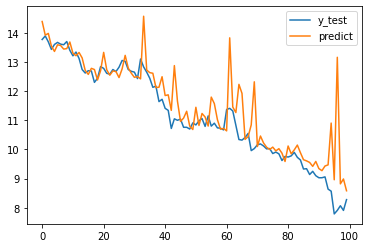

In [55]:
y_test_test = pd.DataFrame(y_test)
y_test_test.rename(columns={0: "y_test"}, inplace = True)
y_test_test['predict'] = lgbm_preds
y_test_test.plot()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_test,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_test,lgbm_preds))
print("r2_score is : ", r2_score(y_test,lgbm_preds))

mean_squared_error is :  0.7086710065252331
mean_absolute_error is :  0.46748375930786124
r2_score is :  0.7270553338224482
